# **Importing Libraries**

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import os

In [ ]:
!pip install qpsolvers
from qpsolvers import solve_qp

# Installing libsvm-official package
!pip install libsvm-official

# Importing necessary libraries
from libsvm.svmutil import *

# **Loading Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Multi Class Data**

In [3]:
# Function to generate dataset from mother folder path
def generate_dataset(path):

    Dataset = np.loadtxt(path, skiprows = 1,delimiter='\t')

    return Dataset

In [4]:
# Create Dataset

Classification_Multiclass_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 01/Data/multi_class_classification/multi_class_classification_data_group_24_train.txt'

Classification_Multiclass_Dataset = generate_dataset(Classification_Multiclass_path)

In [5]:
n_features = 25 # Given

Classification_Multiclass_X = Classification_Multiclass_Dataset[:,:n_features]
Classification_Multiclass_y = Classification_Multiclass_Dataset[:,n_features:]
N_Classes = np.unique(Classification_Multiclass_y).shape[0]

print(f'Dataset : number of samples = {Classification_Multiclass_X.shape[0]}, number of features = {Classification_Multiclass_X.shape[1]}')
print(f'Dataset : number of samples = {Classification_Multiclass_y.shape[0]}, Number of Classes = {N_Classes}')

Dataset : number of samples = 70000, number of features = 25
Dataset : number of samples = 70000, Number of Classes = 10


In [6]:
# Splitting the Dataset

split_size = 0.8
n = Classification_Multiclass_X.shape[0]
split_n = int(split_size * n)

X_train_Multiclass = Classification_Multiclass_X[:split_n,:].copy()
Y_train_Multiclass = Classification_Multiclass_y[:split_n, 0].copy().astype('int')

X_test_Multiclass = Classification_Multiclass_X[split_n:, :].copy()
Y_test_Multiclass = Classification_Multiclass_y[split_n:, 0].copy().astype('int')


# num_classes = 10  # Assuming there are 10 classes

# # Convert Y_train_Multiclass to one-hot encoded vectors
# Y_train_Multiclass = np.zeros((Y_train_Multiclass.shape[0], num_classes))

# # Convert Y_test_Multiclass to one-hot encoded vectors
# Y_test_Multiclass = np.zeros((Y_test_Multiclass.shape[0], num_classes))

X_train_Multiclass = np.expand_dims(X_train_Multiclass,axis=2)
X_test_Multiclass = np.expand_dims(X_test_Multiclass,axis=2)

## **MNIST**

In [7]:
X_train = np.load('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Data/kmnist-train-imgs.npz',allow_pickle=True)['arr_0']
X_test = np.load('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Data/kmnist-test-imgs.npz',allow_pickle=True)['arr_0']
y_train = np.load('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Data/kmnist-train-labels.npz',allow_pickle=True)['arr_0']
y_test = np.load('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Data/kmnist-test-labels.npz',allow_pickle=True)['arr_0']

In [78]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],X_test.shape[2]))

X_train = X_train / 255 - 0.5
X_test = X_test / 255 - 0.5

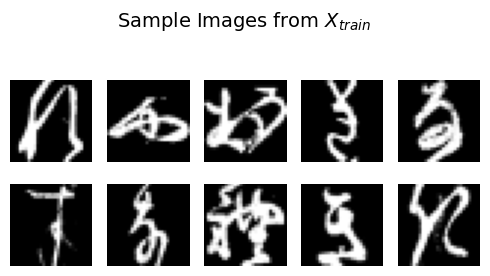

In [79]:
# Plotting Some Images
# Define the number of rows and columns for the subplot
num_rows = 2
num_cols = 5

# Create a figure and axis objects
fig, axes = plt.subplots(num_rows, num_cols, figsize=(5, 3))

# Flatten the axis array for easy iteration
axes = axes.flatten()

# Plot the images
for i in range(num_rows * num_cols):
    axes[i].imshow(X_train[i], cmap='gray')  # Assuming X_train contains the images
    axes[i].axis('off')

# Set the title
plt.suptitle('Sample Images from $X_{train}$ ', fontsize=14)

plt.tight_layout()
plt.show()

In [80]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


# **Regression and Classification MLP**

## Loading Data

In [ ]:
# Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Function to generate dataset from mother folder path
def generate_dataset(path):

    Dataset = np.loadtxt(path, skiprows = 1,delimiter='\t')

    return Dataset

## General tasks

### Fully connected multi-layer feed-forward neural network

In [ ]:
class FullyConnectedNN:
    def __init__(self, input_dim, output_dim, hidden_layers, nodes_per_layer, loss_function, regularization, lambda_, alpha):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hidden_layers = hidden_layers
        self.nodes_per_layer = nodes_per_layer
        self.loss_function = loss_function
        self.regularization = regularization
        self.reg_param = lambda_
        self.alpha = alpha

        # Initialize the weights and biases
        self.weights = [np.random.randn(nodes_per_layer[i], nodes_per_layer[i+1]) for i in range(hidden_layers + 1)] # The weights have been randomly initialized
        self.biases = [np.zeros(nodes_per_layer[i+1]) for i in range(hidden_layers + 1)] # The biases have been all zero initialized


    def forward(self, X):
        activations = [X]
        for i in range(self.hidden_layers):
            # print(f'layer = {i} | weights shape : {np.shape(self.weights[i])} | bias shape : {np.shape(self.biases[i])}')
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigmoid_forward(z))
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        activations.append(self.sigmoid_forward(z))
        return activations

    def predict_regression(self, X):
        activations = [X]
        for i in range(self.hidden_layers):
            # print(f'layer = {i} | weights shape : {np.shape(self.weights[i])} | bias shape : {np.shape(self.biases[i])}')
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigmoid_forward(z))
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        activations.append(self.sigmoid_forward(z))
        return activations

    def predict_classification(self, X):
        activations = [X]
        for i in range(self.hidden_layers):
            # print(f'layer = {i} | weights shape : {np.shape(self.weights[i])} | bias shape : {np.shape(self.biases[i])}')
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            activations.append(self.sigmoid_forward(z))
        z = np.dot(activations[-1], self.weights[-1]) + self.biases[-1]
        activations.append(self.softmax(z))
        return activations

    def backward(self, X, y, activations, learning_rate):
        # activations = self.forward(X)
        # Jacobian = self.softmax_derivative(activations[-1])
        delta = self.loss_derivative(y, activations[-1])
        # delta = np.dot(delta, Jacobian)
        # print(np.shape(delta))
        for i in range(self.hidden_layers, 0, -1):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, delta)
            self.biases[i] -= learning_rate * np.squeeze((delta.T), axis=None)
            delta = np.dot(delta, self.weights[i].T) * self.sigmoid_backward(activations[i])
        self.weights[0] -= learning_rate * np.dot(X.T, delta)
        self.biases[0] -= learning_rate * np.squeeze((delta.T), axis=None)

        # Apply regularization
        if self.regularization == 'l2':
            for i in range(1, self.hidden_layers + 1):
                self.weights[i] -= learning_rate * self.reg_param * self.weights[i]
        elif self.regularization == 'l1':
            for i in range(1, self.hidden_layers + 1):
                self.weights[i] -= learning_rate * self.reg_param * np.sign(self.weights[i])
        elif self.regularization == 'elastic':
            for i in range(1, self.hidden_layers + 1):
                l1_term = self.reg_param * self.alpha * np.sign(self.weights[i])
                l2_term = self.reg_param * (1 - self.alpha) * self.weights[i]
                self.weights[i] -= learning_rate * (l1_term + l2_term)

        return self.weights, self.biases

    def sigmoid_forward(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_backward(self, z):
        return z * (1 - z)

    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)

    def softmax_derivative(self, scores):
        # Compute softmax probabilities
        # softmax_output = self.softmax(z)
        softmax_output = scores
        num_classes = softmax_output.shape[1]

        # Initialize the Jacobian matrix
        jacobian = np.zeros((num_classes, num_classes))

        # Compute the Jacobian matrix
        for i in range(num_classes):
            for j in range(num_classes):
                if i == j:
                    jacobian[i, j] = softmax_output[:, i] * (1 - softmax_output[:, j])
                else:
                    jacobian[i, j] = -softmax_output[:, i] * softmax_output[:, j]

        return jacobian

    def loss_fn(self, y_true, y_pred):
        if self.loss_function == 'mse':
            return np.mean((y_true - y_pred)**2)
        elif self.loss_function == 'cross_entropy':
            epsilon = 1e-15
            # Softmax
            softmax = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=1, keepdims=True)
            softmax = np.clip(softmax, epsilon, 1 - epsilon)
            total_bce_loss = -np.mean(y_true * np.log(softmax))
            return total_bce_loss
        elif self.loss_function == 'bce':
            epsilon = 1e-15
            y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
            return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        elif self.loss_function == 'l1':
            return np.mean(np.abs(y_true - y_pred))


    def loss_derivative(self, y_true, y_pred):
        # print(y.shape[0])
        if self.loss_function == 'cross_entropy' or self.loss_function == 'bce':
            return (y_pred - y_true)
        elif self.loss_function == 'mse':
            return 2 * (y_pred - y_true)
        elif self.loss_function == 'l1':
            return np.abs(y_pred - y_true)

    def compute_loss(self, X, y):
        predictions = self.forward(X)[-1]
        loss = self.loss_fn(y, predictions)

        # Add regularization loss
        if self.regularization == 'l2':
            l2_loss = 0.5 * self.reg_param * sum(np.linalg.norm(w)**2 for w in self.weights[1:])
            loss += l2_loss
        elif self.regularization == 'l1':
            l1_loss = self.reg_param * sum(np.linalg.norm(w, ord=1) for w in self.weights[1:])
            loss += l1_loss
        elif self.regularization == 'elastic':
            l1_loss = self.reg_param * self.alpha * sum(np.linalg.norm(w, ord=1) for w in self.weights[1:])
            l2_loss = self.reg_param * (1 - self.alpha) * sum(np.linalg.norm(w)**2 for w in self.weights[1:])
            loss += (l1_loss + l2_loss)

        return loss

    def train(self, X_train, y_train, X_val, y_val, learning_rate, epochs):
        train_losses = []
        val_losses = []
        train_accuracies = []  # Store training accuracies
        val_accuracies = []    # Store validation accuracies
        num_samples = len(X_train)
        bar_length = 20

        for epoch in range(epochs):
            train_loss = 0
            val_loss = 0
            correct_train_predictions = 0  # Counter for correct training predictions
            correct_val_predictions = 0    # Counter for correct validation predictions
            gradient_w = [np.zeros_like(w) for w in self.weights]
            gradient_b = [np.zeros_like(b) for b in self.biases]

            # Shuffle the training data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)

            # Training phase
            for i, (X, y) in enumerate(zip(X_train, y_train)):
                X = np.array([X])  # Convert to 2D array if not already
                y = np.array([y])  # Convert to 2D array if not already
                activations = self.forward(X)
                y_pred = activations[-1]
                self.weights, self.biases = self.backward(X, y, activations, learning_rate)

                # Compute loss for this sample
                loss = self.compute_loss(X, y)
                train_loss += loss

                # Check if prediction is correct
                if np.argmax(y_pred) == np.argmax(y):
                    correct_train_predictions += 1

                # Print dynamic status bar
                progress = (i + 1) / num_samples
                filled_length = int(bar_length * progress)
                bar = '█' * filled_length + '-' * (bar_length - filled_length)
                print(f"\rEpoch {epoch+1}/{epochs} [{bar}] {progress * 100:.2f}%", end='')

            train_loss /= num_samples  # Average loss per sample
            train_losses.append(train_loss)
            train_accuracy = correct_train_predictions / num_samples
            train_accuracies.append(train_accuracy)

            # Validation phase
            y_pred_val = []
            val_loss = self.compute_loss(X_val, y_val)
            val_losses.append(val_loss)
            for X, y in zip(X_val, y_val):
                X = np.array([X])
                y_pred_val.append(self.forward(X)[-1])

            y_pred_val_new = np.array(np.reshape(y_pred_val, newshape = np.shape(y_val)))
            val_accuracy = self.accuracy(y_val, y_pred_val_new)
            val_accuracies.append(val_accuracy)

            # Displaying the data
            print(f' | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | Train Accuracy: {train_accuracy*100:.4f}% | Val Accuracy: {val_accuracy*100:.4f}%')

        return train_losses, val_losses


    def summary(self, input_size):
        total_params = 0
        print(f'{"Layer":<10}{"Output Shape":<20}{"Param #":<10}')
        print("=" * 40)

        input_shape = (input_size,)
        for i in range(self.hidden_layers):
            layer_name = f"Linear: "
            weights_shape = (self.nodes_per_layer[i], input_shape[0])
            output_shape = (self.nodes_per_layer[i+1],)
            num_params = (input_shape[0] + 1) * self.nodes_per_layer[i+1]  # +1 for bias
            total_params += num_params
            print(f"{layer_name:<10}{str(output_shape):<20}{num_params:<10}")
            input_shape = output_shape

        layer_name = f"Linear: "
        weights_shape = (self.nodes_per_layer[-1], input_shape[0])
        output_shape = (self.output_dim,)
        num_params = (input_shape[0] + 1) * self.output_dim  # +1 for bias
        total_params += num_params
        print(f"{layer_name:<10}{str(output_shape):<20}{num_params:<10}")

        print("=" * 40)
        print(f"Total params: {total_params}")

    def accuracy(self, actual_y, pred_y):
        if len(pred_y.shape)>1:
            if pred_y.shape[1]>1:
                pred_y = np.argmax(pred_y,axis=1)
                actual_y = np.argmax(actual_y, axis=1)
        return np.sum(actual_y == pred_y) / actual_y.shape[0]

    def save_model(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(filename):
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        return model

## Regression tasks

### Performance Metrics

In [ ]:
# Performance Metrics for Regression Task

def pearson(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    r = np.sum((y - y_mean)*(x-x_mean))/np.sqrt(np.sum((y - y_mean)**2) * np.sum((x-x_mean)**2))
    return r

def MSE(actual_y,pred_y):
    return np.mean((actual_y - pred_y)**2)

def MAE(actual_y,pred_y):
    return np.mean(np.abs(actual_y - pred_y))

def plot_predictions(y_actual, y_pred, title):
    coefficients = np.polyfit(y_actual, y_pred, 1)
    line = np.polyval(coefficients, y_actual)
    r = pearson(y_actual, y_pred)
    mse = MSE(y_actual, y_pred)
    mae = MAE(y_actual, y_pred)
    oracle_based_line_x = np.linspace(np.min(y_actual), np.max(y_actual), 1000)
    oracle_based_line_y = oracle_based_line_x.copy()
    plt.scatter(y_actual, y_pred)
    plt.plot(oracle_based_line_x, oracle_based_line_y, 'r--', label = 'Oracle Based Test')
    plt.plot(y_actual, line,color = 'k', linestyle='--',label = 'Line of Best Fit')
    plt.title(title)
    plt.text(oracle_based_line_x[-250], oracle_based_line_y[0], f'$r = {r:0.3f}$\n$mse = {mse:0.3f}$\n$mae = {mae:0.3f}$', fontsize=9, bbox=dict(facecolor='white', alpha=0.5))
    plt.xlabel('Actual y')
    plt.ylabel('Predicted y')
    plt.legend()

def plot_all_predictions(y1_actual, y1_pred, y2_actual, y2_pred, y3_actual, y3_pred):
    plt.figure(figsize = (15,5))
    plt.subplot(1,3,1)
    plot_predictions(y1_actual, y1_pred, '$y^1$')
    plt.subplot(1,3,2)
    plot_predictions(y2_actual, y2_pred, '$y^2$')
    plt.subplot(1,3,3)
    plot_predictions(y3_actual, y3_pred, '$y^3$')
    plt.show()

In [ ]:
def normalize(X, y):
    X_normalized = (X - np.min(X))/(np.max(X) - np.min(X))
    y_normalized = (y - np.min(y))/(np.max(y) - np.min(y))

    return X_normalized, y_normalized

def denormalize(y, y_normalized):
    # X_min, X_max = np.min(X), np.max(X)
    y_min, y_max = np.min(y), np.max(y)

    # X_denormalized = X_normalized * (X_max - X_min) + X_min
    y_denormalized = y_normalized * (y_max - y_min) + y_min

    return y_denormalized

### Multi-Linear Regression

#### Loading Data

In [ ]:
# Create Dataset

Regression_multi_Linear_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 01/Data/Regression_Linear_multi/regression_data_multilinear_group_24_train.txt'

Regression_multi_Linear_Dataset = generate_dataset(Regression_multi_Linear_path)

In [ ]:
n_features = 10 # Given

Regression_multi_Linear_X = Regression_multi_Linear_Dataset[:,:n_features]
Regression_multi_Linear_y = Regression_multi_Linear_Dataset[:,n_features:]

print(f'Dataset : number of samples = {Regression_multi_Linear_X.shape[0]}, number of features = {Regression_multi_Linear_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_multi_Linear_y.shape[0]}, Dimension of Target = {Regression_multi_Linear_y.shape[1]}')

Dataset : number of samples = 14000, number of features = 10
Dataset : number of samples = 14000, Dimension of Target = 3


In [ ]:
# Splitting the Dataset

split_size = 0.7
n = Regression_multi_Linear_X.shape[0]
split_n = int(split_size * n)

X_train_linear_regression = Regression_multi_Linear_X[:split_n,:].copy()
Y_train_linear_regression = Regression_multi_Linear_y[:split_n,:].copy()

X_test_linear_regression = Regression_multi_Linear_X[split_n:, :].copy()
Y_test_linear_regression = Regression_multi_Linear_y[split_n:, :].copy()

print('Splitting the dataset:')
print(f'Samples in training set = {X_train_linear_regression.shape[0]} | Samples in the test set = {X_test_linear_regression.shape[0]}')

Splitting the dataset:
Samples in training set = 9800 | Samples in the test set = 4200


#### Preprocessing Data

In [ ]:
X_train_linear_regression_normalized, y_train_linear_regression_normalized = normalize(X_train_linear_regression, Y_train_linear_regression)
X_test_linear_regression_normalized, y_test_linear_regression_normalized = normalize(X_test_linear_regression, Y_test_linear_regression)
X_val_linear_regression_normalized = X_test_linear_regression_normalized[:100, :]
y_val_linear_regression_normalized = y_test_linear_regression_normalized[:100, :]

In [ ]:
print(np.shape(X_train_linear_regression_normalized))
print(np.shape(y_train_linear_regression_normalized))

(9800, 10)
(9800, 3)


#### Regression using Fully connected multi-layer feed-forward neural network

In [ ]:
# Define the hyper-parameters for the neural network
input_dim = 10
output_dim = 3
hidden_layers = 4
nodes_per_layer = [input_dim, 50, 100, 500, 20, output_dim]  # Number of nodes in each hidden layer
loss_function = 'cross_entropy'
regularization = 'l2'
lambda_ = 0.00001
alpha = 0.1
batch_size = 100
learning_rate = 0.01
epochs = 100

# Create an instance of the FullyConnectedNN class
model_linear_regression = FullyConnectedNN(input_dim, output_dim, hidden_layers, nodes_per_layer, loss_function, regularization, lambda_, alpha)
model_linear_regression.summary(input_size = input_dim)

Layer     Output Shape        Param #   
Linear:   (50,)               550       
Linear:   (100,)              5100      
Linear:   (500,)              50500     
Linear:   (20,)               10020     
Linear:   (3,)                63        
Total params: 66233


In [ ]:
# Train the model
train_losses, val_losses = model_linear_regression.train(X_train_linear_regression_normalized, y_train_linear_regression_normalized, X_val_linear_regression_normalized, y_val_linear_regression_normalized, learning_rate, epochs)

# Save the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_linear_regression_ce_l2_100.pkl'
model_linear_regression.save_model(file_path)

Epoch 1/100 [████████████████████] 100.00% | Train Loss: 0.7798 | Val Loss: 0.7062
Epoch 2/100 [████████████████████] 100.00% | Train Loss: 0.7789 | Val Loss: 0.7052
Epoch 3/100 [████████████████████] 100.00% | Train Loss: 0.7780 | Val Loss: 0.7043
Epoch 4/100 [████████████████████] 100.00% | Train Loss: 0.7772 | Val Loss: 0.7034
Epoch 5/100 [████████████████████] 100.00% | Train Loss: 0.7763 | Val Loss: 0.7027
Epoch 6/100 [████████████████████] 100.00% | Train Loss: 0.7756 | Val Loss: 0.7021
Epoch 7/100 [████████████████████] 100.00% | Train Loss: 0.7750 | Val Loss: 0.7015
Epoch 8/100 [████████████████████] 100.00% | Train Loss: 0.7744 | Val Loss: 0.7009
Epoch 9/100 [████████████████████] 100.00% | Train Loss: 0.7737 | Val Loss: 0.7002
Epoch 10/100 [████████████████████] 100.00% | Train Loss: 0.7731 | Val Loss: 0.6996
Epoch 11/100 [████████████████████] 100.00% | Train Loss: 0.7725 | Val Loss: 0.6990
Epoch 12/100 [████████████████████] 100.00% | Train Loss: 0.7718 | Val Loss: 0.6983
E

In [ ]:
# Save the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_linear_regression_ce_l2_100.pkl'
model_linear_regression = FullyConnectedNN.load_model(file_path)
model_linear_regression.summary(input_dim)

# Test the model
predicted_output = model_linear_regression.forward(X_test_linear_regression_normalized)
outputs = predicted_output[:][-1]

Layer     Output Shape        Param #   
Linear:   (50,)               550       
Linear:   (100,)              5100      
Linear:   (500,)              50500     
Linear:   (20,)               10020     
Linear:   (3,)                63        
Total params: 66233


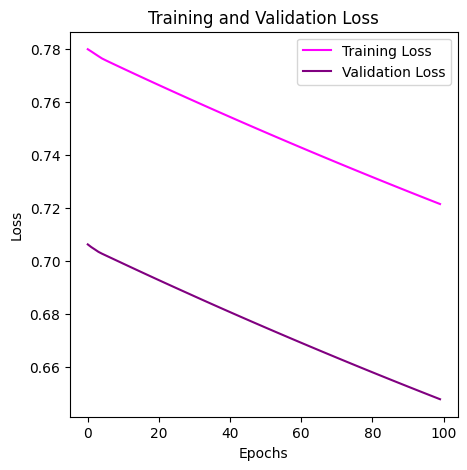

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))

plt.plot(train_losses, color='magenta', label='Training Loss')
plt.plot(val_losses, color='purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
outputs_final = np.zeros_like(outputs)
outputs_final[:, 0] = denormalize(y = Y_test_linear_regression[:, 0], y_normalized = outputs[:, 0])
outputs_final[:, 1] = denormalize(y = Y_test_linear_regression[:, 1], y_normalized = outputs[:, 1])
outputs_final[:, 2] = denormalize(y = Y_test_linear_regression[:, 2], y_normalized = outputs[:, 2])

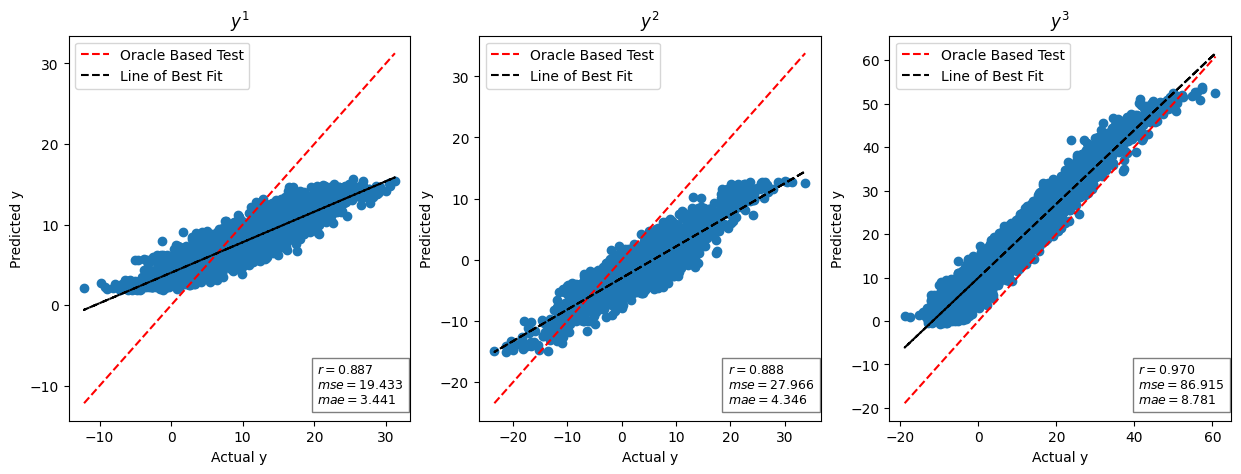

In [ ]:
plot_all_predictions(Y_test_linear_regression[:, 0], outputs_final[:, 0], Y_test_linear_regression[:, 1], outputs_final[:, 1], Y_test_linear_regression[:, 2], outputs_final[:, 2])

#### Results

<Figure size 1000x1000 with 0 Axes>

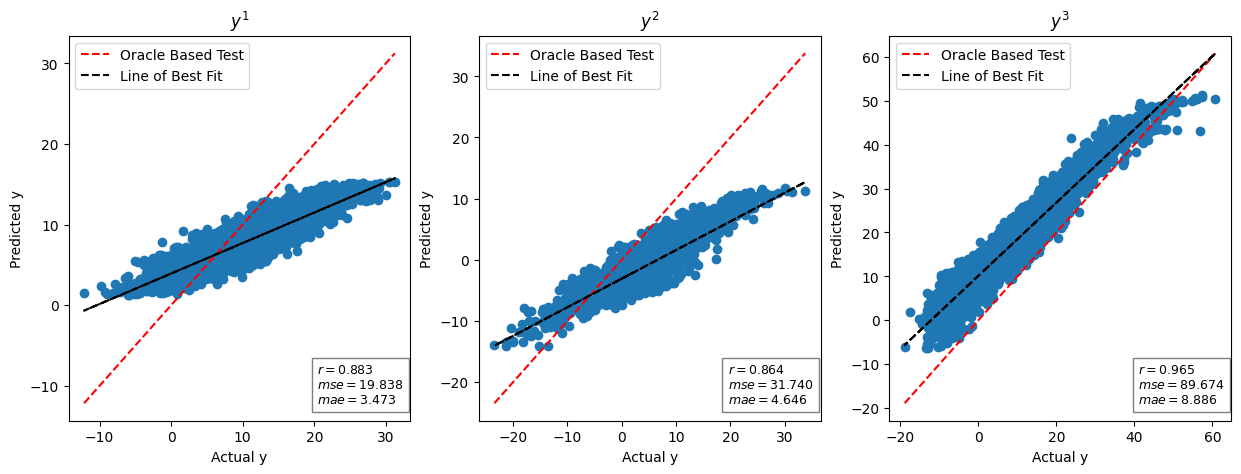

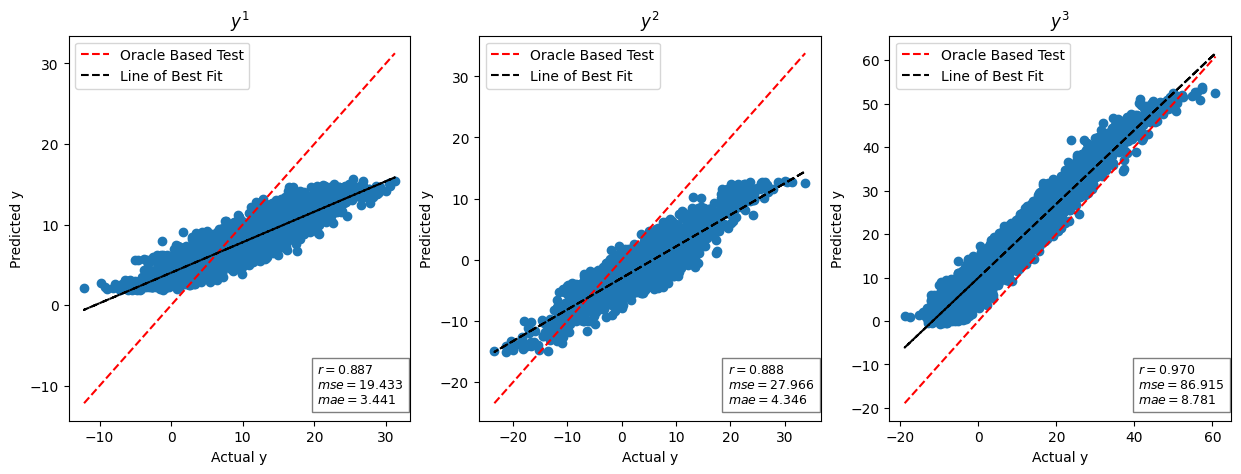

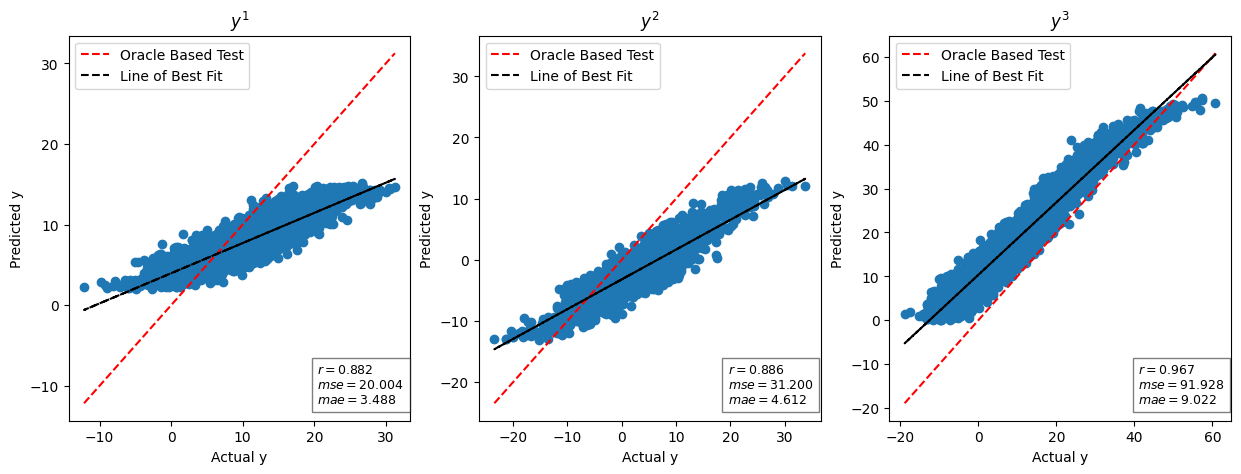

In [ ]:
# Load the model
mlp_linear_regression_ce_no_reg_path= '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_linear_regression_ce_no_reg.pkl'
mlp_linear_regression_ce_no_reg = FullyConnectedNN.load_model(mlp_linear_regression_ce_no_reg_path)
y_pred_linear_regression_ce_no_reg = mlp_linear_regression_ce_no_reg.predict_regression(X_test_linear_regression_normalized)[:][-1]

mlp_linear_regression_ce_l2_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_linear_regression_ce_l2_100.pkl'
mlp_linear_regression_ce_l2_100 = FullyConnectedNN.load_model(mlp_linear_regression_ce_l2_100_path)
y_pred_linear_regression_ce_l2_100 = mlp_linear_regression_ce_l2_100.predict_regression(X_test_linear_regression_normalized)[:][-1]

mlp_linear_regression_ce_elastic_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_linear_regression_ce_elastic_100.pkl'
mlp_linear_regression_ce_elastic_100 = FullyConnectedNN.load_model(mlp_linear_regression_ce_elastic_100_path)
y_pred_linear_regression_ce_elastic_100 = mlp_linear_regression_ce_elastic_100.predict_regression(X_test_linear_regression_normalized)[:][-1]

plt.figure(figsize = (10, 10))

# plt.subplot(3, 1, 1)
y_pred_linear_regression_ce_no_reg_final = np.zeros_like(y_pred_linear_regression_ce_no_reg)
y_pred_linear_regression_ce_no_reg_final[:, 0] = denormalize(y = Y_test_linear_regression[:, 0], y_normalized = y_pred_linear_regression_ce_no_reg[:, 0])
y_pred_linear_regression_ce_no_reg_final[:, 1] = denormalize(y = Y_test_linear_regression[:, 1], y_normalized = y_pred_linear_regression_ce_no_reg[:, 1])
y_pred_linear_regression_ce_no_reg_final[:, 2] = denormalize(y = Y_test_linear_regression[:, 2], y_normalized = y_pred_linear_regression_ce_no_reg[:, 2])
plot_all_predictions(Y_test_linear_regression[:, 0], y_pred_linear_regression_ce_no_reg_final[:, 0], Y_test_linear_regression[:, 1], y_pred_linear_regression_ce_no_reg_final[:, 1], Y_test_linear_regression[:, 2], y_pred_linear_regression_ce_no_reg_final[:, 2])

# plt.subplot(3, 1, 2)
y_pred_linear_regression_ce_l2_100_final = np.zeros_like(y_pred_linear_regression_ce_no_reg)
y_pred_linear_regression_ce_l2_100_final[:, 0] = denormalize(y = Y_test_linear_regression[:, 0], y_normalized = y_pred_linear_regression_ce_l2_100[:, 0])
y_pred_linear_regression_ce_l2_100_final[:, 1] = denormalize(y = Y_test_linear_regression[:, 1], y_normalized = y_pred_linear_regression_ce_l2_100[:, 1])
y_pred_linear_regression_ce_l2_100_final[:, 2] = denormalize(y = Y_test_linear_regression[:, 2], y_normalized = y_pred_linear_regression_ce_l2_100[:, 2])
plot_all_predictions(Y_test_linear_regression[:, 0], y_pred_linear_regression_ce_l2_100_final[:, 0], Y_test_linear_regression[:, 1], y_pred_linear_regression_ce_l2_100_final[:, 1], Y_test_linear_regression[:, 2], y_pred_linear_regression_ce_l2_100_final[:, 2])

# plt.subplot(3, 1, 3)
y_pred_linear_regression_ce_elastic_100_final = np.zeros_like(y_pred_linear_regression_ce_no_reg)
y_pred_linear_regression_ce_elastic_100_final[:, 0] = denormalize(y = Y_test_linear_regression[:, 0], y_normalized = y_pred_linear_regression_ce_elastic_100[:, 0])
y_pred_linear_regression_ce_elastic_100_final[:, 1] = denormalize(y = Y_test_linear_regression[:, 1], y_normalized = y_pred_linear_regression_ce_elastic_100[:, 1])
y_pred_linear_regression_ce_elastic_100_final[:, 2] = denormalize(y = Y_test_linear_regression[:, 2], y_normalized = y_pred_linear_regression_ce_elastic_100[:, 2])
plot_all_predictions(Y_test_linear_regression[:, 0], y_pred_linear_regression_ce_elastic_100_final[:, 0], Y_test_linear_regression[:, 1], y_pred_linear_regression_ce_elastic_100_final[:, 1], Y_test_linear_regression[:, 2], y_pred_linear_regression_ce_elastic_100_final[:, 2])

plt.show()

### Generalised Regression (Polynomial)

#### Loading the Data

In [ ]:
# Create Dataset

Regression_General_Multi_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 01/Data/Regression_General_Multi/regression_data_multiGen_group_24_train.txt'

Regression_General_Multi_Dataset = generate_dataset(Regression_General_Multi_path)

In [ ]:
n_features = 2 # Given

Regression_General_Multi_X = Regression_General_Multi_Dataset[:,:n_features]
Regression_General_Multi_y = Regression_General_Multi_Dataset[:,n_features:]

print(f'Dataset : number of samples = {Regression_General_Multi_X.shape[0]}, number of features = {Regression_General_Multi_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_General_Multi_y.shape[0]}, Dimension of Target = {Regression_General_Multi_y.shape[1]}')

Dataset : number of samples = 14000, number of features = 2
Dataset : number of samples = 14000, Dimension of Target = 3


In [ ]:
# Splitting the Dataset

split_size = 0.8
n = Regression_General_Multi_X.shape[0]
split_n = int(split_size * n)

X_train_polynomial_regression = Regression_General_Multi_X[:split_n,:].copy()
Y_train_polynomial_regression = Regression_General_Multi_y[:split_n,:].copy()

X_test_polynomial_regression = Regression_General_Multi_X[split_n:, :].copy()
Y_test_polynomial_regression = Regression_General_Multi_y[split_n:, :].copy()

#### Preprocessing the data

In [ ]:
X_train_polynomial_regression_normalized, y_train_polynomial_regression_normalized = normalize(X_train_polynomial_regression, Y_train_polynomial_regression)
X_test_polynomial_regression_normalized, y_test_polynomial_regression_normalized = normalize(X_test_polynomial_regression, Y_test_polynomial_regression)
X_val_polynomial_regression_normalized = X_test_polynomial_regression_normalized[:100, :]
y_val_polynomial_regression_normalized = y_test_polynomial_regression_normalized[:100, :]

#### Regression using Fully connected multi-layer feed-forward neural network

In [ ]:
# Define the hyper-parameters for the neural network
input_dim = 2
output_dim = 3
hidden_layers = 4
nodes_per_layer = [input_dim, 20, 100, 50, 10, output_dim]  # Number of nodes in each hidden layer
loss_function = 'mse'
regularization = 'elastic'
lambda_ = 0.001
alpha = 0.5
batch_size = 100
learning_rate = 0.01
epochs = 100

# Create an instance of the FullyConnectedNN class
model_poly_regression = FullyConnectedNN(input_dim, output_dim, hidden_layers, nodes_per_layer, loss_function, regularization, lambda_, alpha)
model_poly_regression.summary(input_size = input_dim)

Layer     Output Shape        Param #   
Linear:   (20,)               60        
Linear:   (100,)              2100      
Linear:   (50,)               5050      
Linear:   (10,)               510       
Linear:   (3,)                33        
Total params: 7753


In [ ]:
# Train the model
train_losses, val_losses = model_poly_regression.train(X_train_polynomial_regression_normalized, y_train_polynomial_regression_normalized, X_val_polynomial_regression_normalized, y_val_polynomial_regression_normalized, learning_rate, epochs)

# Save the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_poly_regression.pkl'
model_poly_regression.save_model(file_path)

Epoch 1/100 [████████████████████] 100.00% | Train Loss: 3.5506 | Val Loss: 3.2117
Epoch 2/100 [████████████████████] 100.00% | Train Loss: 2.8985 | Val Loss: 2.6150
Epoch 3/100 [████████████████████] 100.00% | Train Loss: 2.3514 | Val Loss: 2.1149
Epoch 4/100 [████████████████████] 100.00% | Train Loss: 1.8942 | Val Loss: 1.6984
Epoch 5/100 [████████████████████] 100.00% | Train Loss: 1.5148 | Val Loss: 1.3544
Epoch 6/100 [████████████████████] 100.00% | Train Loss: 1.2027 | Val Loss: 1.0725
Epoch 7/100 [████████████████████] 100.00% | Train Loss: 0.9479 | Val Loss: 0.8434
Epoch 8/100 [████████████████████] 100.00% | Train Loss: 0.7418 | Val Loss: 0.6590
Epoch 9/100 [████████████████████] 100.00% | Train Loss: 0.5767 | Val Loss: 0.5121
Epoch 10/100 [████████████████████] 100.00% | Train Loss: 0.4460 | Val Loss: 0.3965
Epoch 11/100 [████████████████████] 100.00% | Train Loss: 0.3437 | Val Loss: 0.3068
Epoch 12/100 [████████████████████] 100.00% | Train Loss: 0.2649 | Val Loss: 0.2381
E

In [ ]:
# Load the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_poly_regression_mse_l2_100.pkl'
model_poly_regression = FullyConnectedNN.load_model(file_path)

# Testing
predicted_output = model_poly_regression.forward(X_test_polynomial_regression_normalized)
outputs = predicted_output[:][-1]
outputs_final = np.zeros_like(outputs)

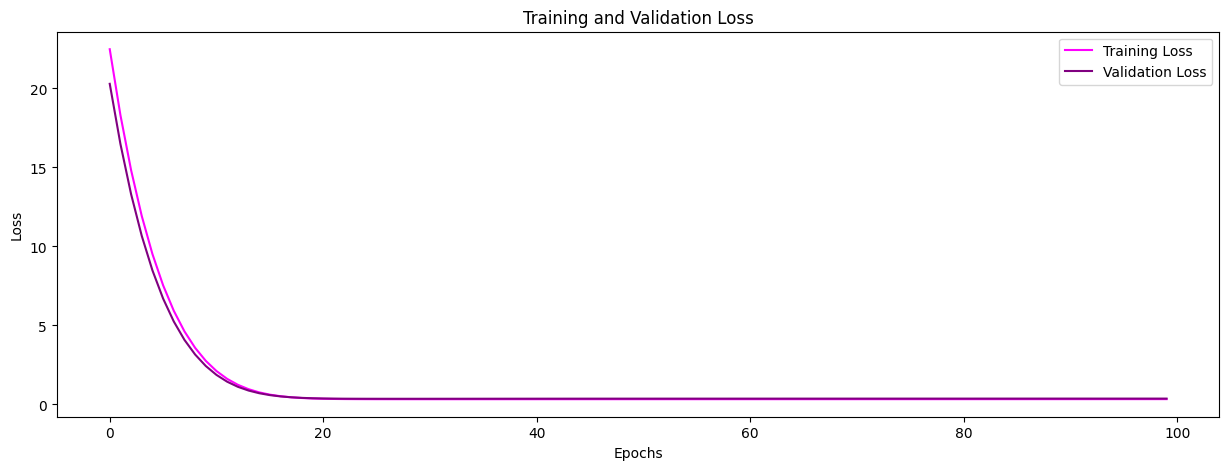

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(train_losses, color='magenta', label='Training Loss')
plt.plot(val_losses, color='purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
outputs_final[:, 0] = denormalize(y = Y_test_polynomial_regression[:, 0], y_normalized = outputs[:, 0] )
outputs_final[:, 1] = denormalize(y = Y_test_polynomial_regression[:, 1], y_normalized = outputs[:, 1])
outputs_final[:, 2] = denormalize(y = Y_test_polynomial_regression[:, 2], y_normalized = outputs[:, 2])

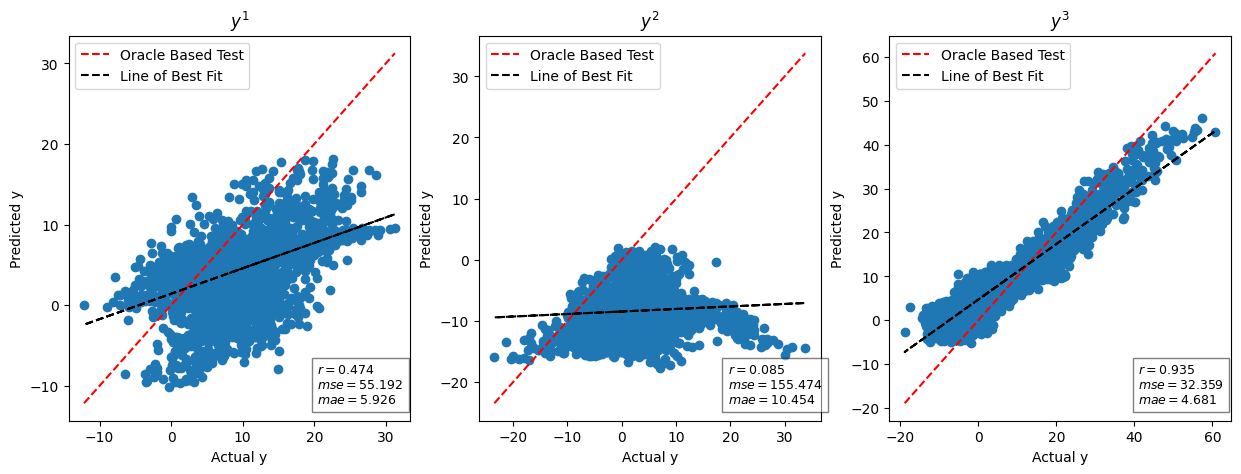

In [ ]:
plot_all_predictions(Y_test_polynomial_regression[:, 0], outputs_final[:, 0], Y_test_polynomial_regression[:, 1], outputs_final[:, 1], Y_test_polynomial_regression[:, 2], outputs_final[:, 2])

#### Results

<Figure size 1000x1000 with 0 Axes>

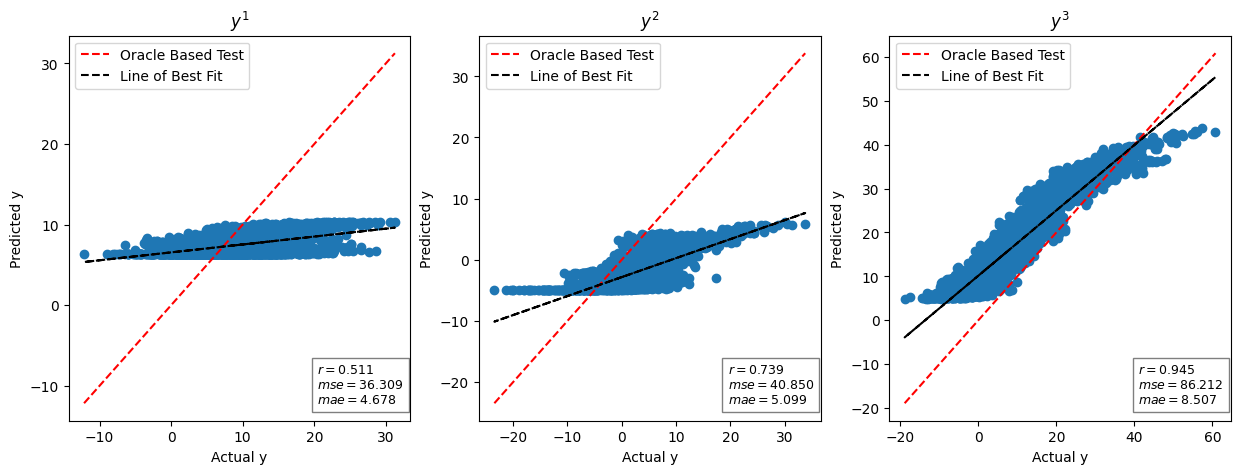

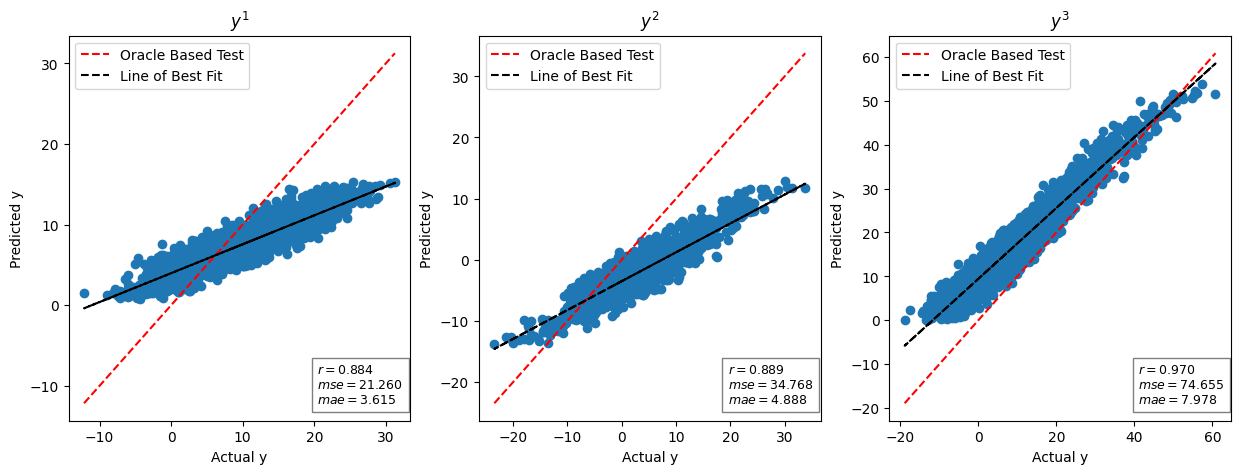

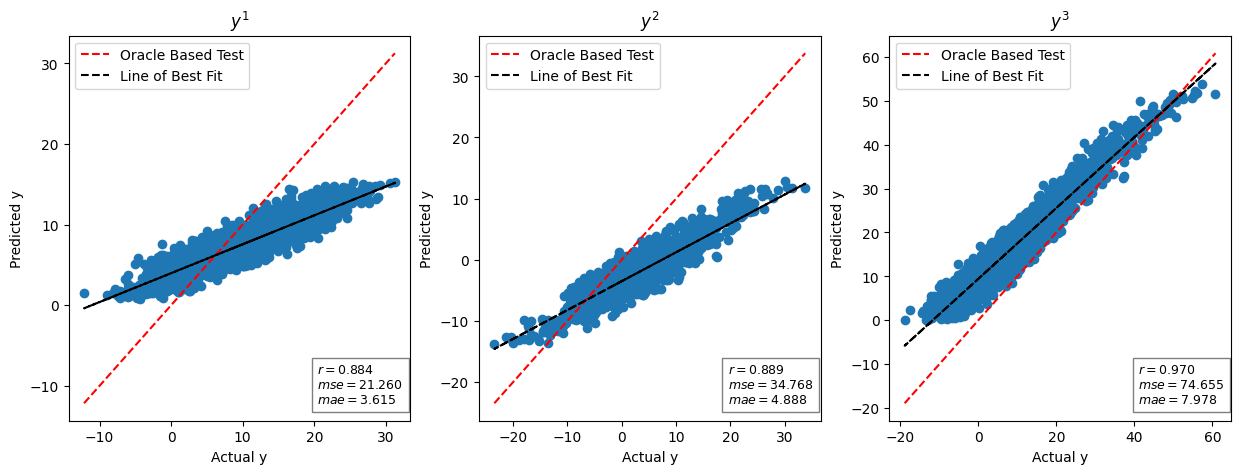

In [ ]:
# Load the model
mlp_poly_regression_mse_l1_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_poly_regression_mse_l1_100.pkl'
mlp_poly_regression_mse_l1_100 = FullyConnectedNN.load_model(mlp_poly_regression_mse_l1_100_path)
y_pred_poly_regression_mse_l1_100 = mlp_poly_regression_mse_l1_100.predict_regression(X_test_polynomial_regression_normalized)[:][-1]

mlp_poly_regression_mse_l2_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_poly_regression_mse_l2_100.pkl'
mlp_poly_regression_mse_l2_100 = FullyConnectedNN.load_model(mlp_poly_regression_mse_l2_100_path)
y_pred_poly_regression_mse_l2_100 = mlp_poly_regression_mse_l2_100.predict_regression(X_test_polynomial_regression_normalized)[:][-1]

mlp_poly_regression_mse_elastic_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_poly_regression_mse_elastic_100.pkl'
mlp_poly_regression_mse_elastic_100 = FullyConnectedNN.load_model(mlp_poly_regression_mse_elastic_100_path)
y_pred_mlp_poly_regression_mse_elastic_100 = mlp_poly_regression_mse_elastic_100.predict_regression(X_test_polynomial_regression_normalized)[:][-1]

plt.figure(figsize = (10, 10))

# plt.subplot(3, 1, 1)
y_pred_poly_regression_mse_l1_100_final = np.zeros_like(y_pred_poly_regression_mse_l1_100)
y_pred_poly_regression_mse_l1_100_final[:, 0] = denormalize(y = Y_test_polynomial_regression[:, 0], y_normalized = y_pred_poly_regression_mse_l1_100[:, 0])
y_pred_poly_regression_mse_l1_100_final[:, 1] = denormalize(y = Y_test_polynomial_regression[:, 1], y_normalized = y_pred_poly_regression_mse_l1_100[:, 1])
y_pred_poly_regression_mse_l1_100_final[:, 2] = denormalize(y = Y_test_polynomial_regression[:, 2], y_normalized = y_pred_poly_regression_mse_l1_100[:, 2])
plot_all_predictions(Y_test_polynomial_regression[:, 0], y_pred_poly_regression_mse_l1_100_final[:, 0], Y_test_polynomial_regression[:, 1], y_pred_poly_regression_mse_l1_100_final[:, 1], Y_test_polynomial_regression[:, 2], y_pred_poly_regression_mse_l1_100_final[:, 2])

# plt.subplot(3, 1, 2)
y_pred_mlp_poly_regression_mse_l2_100_final = np.zeros_like(y_pred_poly_regression_mse_l1_100)
y_pred_mlp_poly_regression_mse_l2_100_final[:, 0] = denormalize(y = Y_test_polynomial_regression[:, 0], y_normalized = y_pred_poly_regression_mse_l2_100[:, 0])
y_pred_mlp_poly_regression_mse_l2_100_final[:, 1] = denormalize(y = Y_test_polynomial_regression[:, 1], y_normalized = y_pred_poly_regression_mse_l2_100[:, 1])
y_pred_mlp_poly_regression_mse_l2_100_final[:, 2] = denormalize(y = Y_test_polynomial_regression[:, 2], y_normalized = y_pred_poly_regression_mse_l2_100[:, 2])
plot_all_predictions(Y_test_polynomial_regression[:, 0], y_pred_mlp_poly_regression_mse_l2_100_final[:, 0], Y_test_polynomial_regression[:, 1], y_pred_mlp_poly_regression_mse_l2_100_final[:, 1], Y_test_polynomial_regression[:, 2], y_pred_mlp_poly_regression_mse_l2_100_final[:, 2])

# plt.subplot(3, 1, 3)
y_pred_poly_regression_mse_l2_100_final = np.zeros_like(y_pred_poly_regression_mse_l1_100)
y_pred_poly_regression_mse_l2_100_final[:, 0] = denormalize(y = Y_test_polynomial_regression[:, 0], y_normalized = y_pred_poly_regression_mse_l2_100[:, 0])
y_pred_poly_regression_mse_l2_100_final[:, 1] = denormalize(y = Y_test_polynomial_regression[:, 1], y_normalized = y_pred_poly_regression_mse_l2_100[:, 1])
y_pred_poly_regression_mse_l2_100_final[:, 2] = denormalize(y = Y_test_polynomial_regression[:, 2], y_normalized = y_pred_poly_regression_mse_l2_100[:, 2])
plot_all_predictions(Y_test_polynomial_regression[:, 0], y_pred_poly_regression_mse_l2_100_final[:, 0], Y_test_polynomial_regression[:, 1], y_pred_poly_regression_mse_l2_100_final[:, 1], Y_test_polynomial_regression[:, 2], y_pred_poly_regression_mse_l2_100_final[:, 2])

plt.show()

### Generalised Regression (Non-Polynomial)

#### Loading the data

In [ ]:
# Create Dataset (Example Usage)

Regression_Non_linear_Uni_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 01/Data/Regression_Non_linear_Uni/regression_data_uni_group_24_train.txt'

Regression_Non_linear_Uni_Dataset = generate_dataset(Regression_Non_linear_Uni_path)

In [ ]:
num_features = 5

Regression_Non_linear_Uni_X = Regression_Non_linear_Uni_Dataset[:,:num_features]
Regression_Non_linear_Uni_y = Regression_Non_linear_Uni_Dataset[:,num_features:]

print(f'Dataset : number of samples = {Regression_Non_linear_Uni_X.shape[0]}, number of features = {Regression_Non_linear_Uni_X.shape[1]}')
print(f'Dataset : number of samples = {Regression_Non_linear_Uni_y.shape[0]}, Dimension of Target = {Regression_Non_linear_Uni_y.shape[1]}')

Dataset : number of samples = 7000, number of features = 5
Dataset : number of samples = 7000, Dimension of Target = 1


In [ ]:
# Splitting the Dataset

split_size = 0.8
n = Regression_Non_linear_Uni_X.shape[0]
split_n = int(split_size * n)

X_train_Non_linear_Uni = Regression_Non_linear_Uni_X[:split_n,:].copy()
Y_train_Non_linear_Uni = Regression_Non_linear_Uni_y[:split_n,:].copy()

X_test_Non_linear_Uni = Regression_Non_linear_Uni_X[split_n:, :].copy()
Y_test_Non_linear_Uni = Regression_Non_linear_Uni_y[split_n:, :].copy()

#### Preprocessing the data

In [ ]:
X_train_Non_linear_Uni_normalized, y_train_Non_linear_Uni_normalized = normalize(X_train_Non_linear_Uni, Y_train_Non_linear_Uni)
X_test_Non_linear_Uni_normalized, y_test_Non_linear_Uni_normalized = normalize(X_test_Non_linear_Uni, Y_test_Non_linear_Uni)
X_val_Non_linear_Uni_normalized = X_test_Non_linear_Uni_normalized[:100, :]
y_val_Non_linear_Uni_normalized = y_test_Non_linear_Uni_normalized[:100, :]

#### Regression using Fully connected multi-layer feed-forward neural network

In [ ]:
# Define the hyper-parameters for the neural network
input_dim = 5
output_dim = 1
hidden_layers = 5
nodes_per_layer = [input_dim, 10, 20, 500, 100, 5, output_dim]  # Number of nodes in each hidden layer
loss_function = 'mse'
regularization = 'l2'
lambda_ = 0.00001
alpha = 0.5
learning_rate = 0.01
epochs = 100

# Create an instance of the FullyConnectedNN class
model_non_linear_uni = FullyConnectedNN(input_dim, output_dim, hidden_layers, nodes_per_layer, loss_function, regularization, lambda_, alpha)
model_non_linear_uni.summary(input_size = input_dim)

Layer     Output Shape        Param #   
Linear:   (10,)               60        
Linear:   (20,)               220       
Linear:   (500,)              10500     
Linear:   (100,)              50100     
Linear:   (5,)                505       
Linear:   (1,)                6         
Total params: 61391


In [ ]:
# Train the model
train_losses, val_losses = model_non_linear_uni.train(X_train_Non_linear_Uni_normalized, y_train_Non_linear_Uni_normalized, X_val_Non_linear_Uni_normalized, y_val_Non_linear_Uni_normalized, learning_rate, epochs)

# Save the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_non_linear_uni_mse_12_100.pkl'
model_non_linear_uni.save_model(file_path)

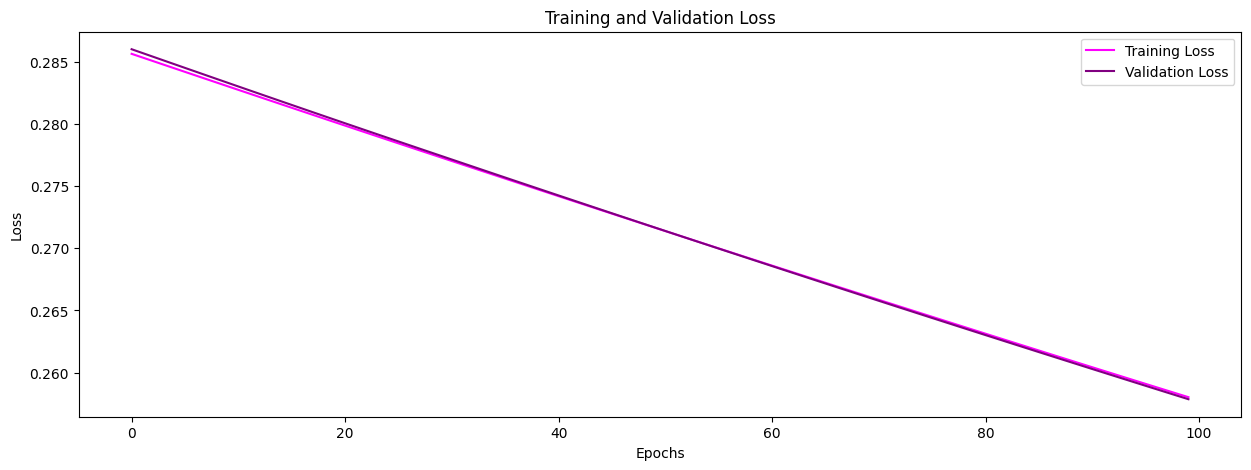

In [ ]:
num_epochs = 200

plt.figure(figsize=(15, 5))

plt.plot(train_losses, color='magenta', label='Training Loss')
plt.plot(val_losses, color='purple', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
def plot_all_predictions(y1_actual, y1_pred):
    plt.figure(figsize = (5,5))
    plot_predictions(y1_actual, y1_pred, '$y^1$')
    plt.show()

In [ ]:
# Load the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_non_linear_uni_mse_12_100.pkl'
model_non_linear_uni = FullyConnectedNN.load_model(file_path)

predicted_output = model_non_linear_uni.forward(X_test_Non_linear_Uni_normalized)
outputs = predicted_output[:][-1]

In [ ]:
outputs_final = denormalize(y = Y_test_Non_linear_Uni, y_normalized = outputs[:, 0])
plot_all_predictions(Y_test_Non_linear_Uni[:, 0], outputs_final)

#### Results

(4200,) (1400,)


<Figure size 1000x1000 with 0 Axes>

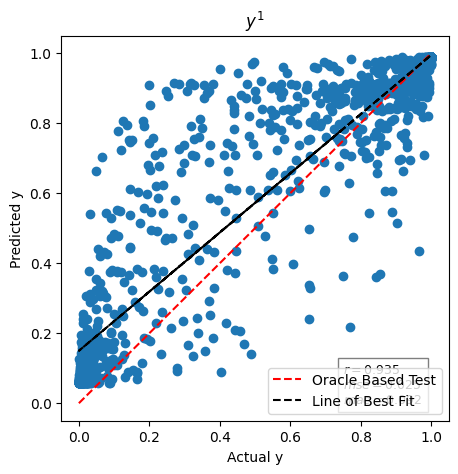

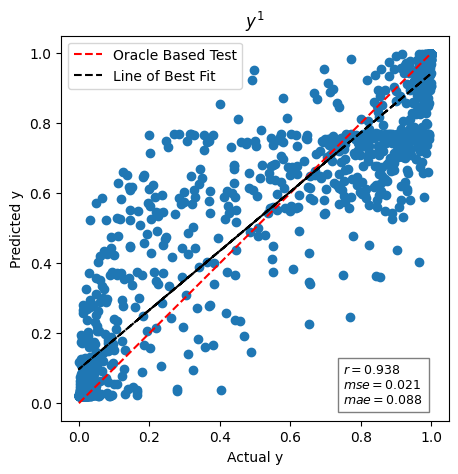

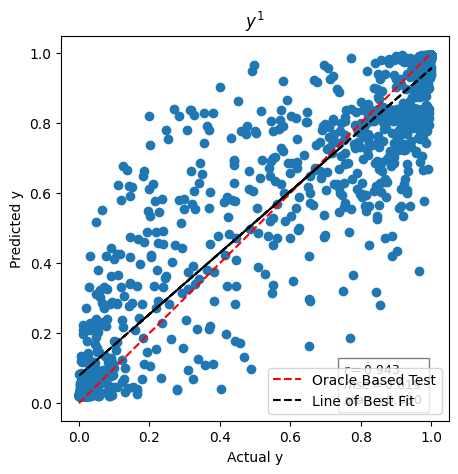

In [ ]:
# Load the model
mlp_non_linear_uni_mse_l1_500_path= '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_non_linear_uni_mse_l1_500.pkl'
mlp_non_linear_uni_mse_l1_500 = FullyConnectedNN.load_model(mlp_non_linear_uni_mse_l1_500_path)
y_pred_mlp_non_linear_uni_mse_l1_500 = mlp_non_linear_uni_mse_l1_500.predict_regression(X_test_Non_linear_Uni_normalized)[:][-1]

mlp_non_linear_uni_mse_12_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_non_linear_uni_mse_12_100.pkl'
mlp_non_linear_uni_mse_12_100 = FullyConnectedNN.load_model(mlp_non_linear_uni_mse_12_100_path)
y_pred_mlp_non_linear_uni_mse_12_100 = mlp_non_linear_uni_mse_12_100.predict_regression(X_test_Non_linear_Uni_normalized)[:][-1]

model_non_linear_uni_mse_elastic_100_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_non_linear_uni_mse_elastic_100.pkl'
mlp_non_linear_uni_mse_elastic_100 = FullyConnectedNN.load_model(model_non_linear_uni_mse_elastic_100_path)
y_pred_mlp_non_linear_uni_mse_elastic_100 = mlp_non_linear_uni_mse_elastic_100.predict_regression(X_test_Non_linear_Uni_normalized)[:][-1]

plt.figure(figsize = (10, 10))

# plt.subplot(3, 1, 1)
y_pred_mlp_non_linear_uni_mse_l1_500_final = np.zeros_like(y_pred_mlp_non_linear_uni_mse_l1_500)
y_pred_mlp_non_linear_uni_mse_l1_500_final = denormalize(y = Y_test_Non_linear_Uni, y_normalized = y_pred_mlp_non_linear_uni_mse_l1_500[:, 0])
print(np.shape(Y_test_linear_regression[:, 0]), np.shape(y_pred_mlp_non_linear_uni_mse_l1_500_final))
plot_all_predictions(Y_test_Non_linear_Uni[:, 0], y_pred_mlp_non_linear_uni_mse_l1_500_final)

# plt.subplot(3, 1, 2)
y_pred_mlp_non_linear_uni_mse_12_100_final = np.zeros_like(y_pred_mlp_non_linear_uni_mse_l1_500)
y_pred_mlp_non_linear_uni_mse_12_100_final = denormalize(y = Y_test_Non_linear_Uni, y_normalized = y_pred_mlp_non_linear_uni_mse_12_100[:, 0])
plot_all_predictions(Y_test_Non_linear_Uni[:, 0], y_pred_mlp_non_linear_uni_mse_12_100_final)

# plt.subplot(3, 1, 3)
y_pred_mlp_non_linear_uni_mse_elastic_100_final = np.zeros_like(y_pred_mlp_non_linear_uni_mse_l1_500)
y_pred_mlp_non_linear_uni_mse_elastic_100_final = denormalize(y = Y_test_Non_linear_Uni, y_normalized = y_pred_mlp_non_linear_uni_mse_elastic_100[:, 0])
plot_all_predictions(Y_test_Non_linear_Uni[:, 0], y_pred_mlp_non_linear_uni_mse_elastic_100_final)

plt.show()

## Classification Tasks

### Performance Metrics

In [ ]:
# Performance Metrics

# Classification Accuracy
def accuracy(actual_y, pred_y):
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)
    return np.sum(actual_y == pred_y) / actual_y.shape[0]

# Confusion Matrix
def confusion_matrix(actual_y, pred_y):
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Get the unique labels
    unique_labels = np.unique(np.concatenate((actual_y, pred_y)))

    # Initialize the confusion matrix with zeros
    confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

    # Fill the confusion matrix
    for i in range(len(actual_y)):
        actual_label = actual_y[i]
        pred_label = pred_y[i]
        confusion_matrix[unique_labels == actual_label, unique_labels == pred_label] += 1

    return confusion_matrix

# Plotting Confusion Matrix
def confusion_matrix_heatmap(cm, title="Confusion Matrix"):

  # Get the number of classes
  num_classes = np.shape(cm)[0]

  # Make the cm into probability_cm
  row_sums = cm.sum(axis=1, keepdims=True)  # Calculate the row sums

  # Normalize by row sums to get probabilities
  probability_cm = cm / row_sums

  # Create the heatmap
  plt.imshow(probability_cm, cmap="Blues")  # Choose a colormap
  plt.colorbar()

  for i in range(num_classes):
    for j in range(num_classes):
        # Format the text to display two decimal places
        text = f"{probability_cm[i, j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", fontsize=10, color="black", alpha = 0.6)  # Adjust fontsize and color as needed

  # Add labels and title
  plt.xticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.yticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.title(title)

  # Show the plot
  plt.show()

def f1_score(actual_y, pred_y):

    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Check if labels are multi-class or binary classification
    if len(np.unique(actual_y)) > 2:
        # Multi-class classification: calculate F1 score for each class and average
        f1_scores = []
        for class_label in np.unique(actual_y):
            TP = np.sum((actual_y == class_label) & (pred_y == class_label))
            FP = np.sum((actual_y != class_label) & (pred_y == class_label))
            FN = np.sum((actual_y == class_label) & (pred_y != class_label))
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            f1_scores.append(f1_score)
        return np.mean(f1_scores)
    else:
        # Binary classification: calculate F1 score directly
        TP = np.sum((actual_y == 1) & (pred_y == 1))
        FP = np.sum((actual_y != 1) & (pred_y == 1))
        FN = np.sum((actual_y == 1) & (pred_y != 1))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return f1_score

def roc_curve_pair(actual_y, pred_y, class_0, class_1):
    """
    Calculates the ROC curve for a specific pair of classes in a multi-class problem.

    Args:
        actual_y: A numpy array of the actual labels.
        pred_y: A numpy array of the predicted probabilities for each class.
        class_0: The label of the first class in the pair.
        class_1: The label of the second class in the pair.

    Returns:
        A tuple of (fpr, tpr, thresholds):
            fpr: False positive rate
            tpr: True positive rate
            thresholds: Decision thresholds used to compute fpr and tpr
    """

    # Filter data for the chosen classes
    y_true = actual_y[((actual_y == class_0) | (actual_y == class_1))]
    y_score = pred_y[((actual_y == class_0) | (actual_y == class_1)), class_1]  # Probabilities for class_1

    # Get unique thresholds for ROC curve calculation
    thresholds = np.unique(np.sort(y_score))

    # Initialize fpr and tpr with 0s
    fpr = np.zeros_like(thresholds)
    tpr = np.zeros_like(thresholds)

    # Calculate TPR and FPR for each threshold
    for i, thresh in enumerate(thresholds):
        y_pred = (y_score >= thresh).astype(int)
        tp = np.sum(y_pred[y_true == class_1])
        fp = np.sum(y_pred[y_true == class_0])
        fn = np.sum((1 - y_pred)[y_true == class_1])
        tn = np.sum((1 - y_pred)[y_true == class_0])
        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)

    return fpr, tpr, thresholds

def plot_ROC(actual_y,pred_y,class_0,class_1):

    # Get ROC curve for classes 0 and 1
    fpr, tpr, thresholds = roc_curve_pair(actual_y, pred_y, class_0=class_0, class_1=class_1)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve')

    # Plot the line of no discrimination (random guessing)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Discrimination')

    # Set axis labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC between Class:{class_0} and Class:{class_1}')

    # Add legend
    plt.legend()

    # Display plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def categorical_crossentropy_loss(y_true, y_pred):
    num_samples = len(y_true)
    loss = -np.sum(np.log(y_pred[np.arange(num_samples), y_true])) / num_samples
    return loss

### Binary Classification

#### Loading Data

In [ ]:
Binary_classification_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 01/Data/binary_classification/multi_class_classification_data_group_24_train.txt'

Binary_classification_Dataset = generate_dataset(Binary_classification_path)

# Shuffle the dataset
np.random.shuffle(Binary_classification_Dataset)

In [ ]:
Binary_classification_X = Binary_classification_Dataset[:,:10]
Binary_classification_y = Binary_classification_Dataset[:,-1].astype(int)

print(f'Dataset : number of samples = {Binary_classification_X.shape[0]}, number of features = {Binary_classification_X.shape[1]}')
print(f'Dataset : number of labels = {len(Binary_classification_y)}')

Dataset : number of samples = 14000, number of features = 10
Dataset : number of labels = 14000


In [ ]:
# Spliting into training and testing data :

split_size = 0.8
n = Binary_classification_X.shape[0]
split_n = int(split_size * n)

# Features:
X_train_Binary = Binary_classification_X[:split_n,:].copy()
X_test_Binary = Binary_classification_X[split_n:, :].copy()
X_val_Binary = X_test_Binary[:100, :]

# Labels:
Y_train_Binary = Binary_classification_y[:split_n].copy()
Y_test_Binary = Binary_classification_y[split_n:].copy()

# Convert labels to one-hot encoding
num_classes = 2
y_train_Binary = np.eye(num_classes)[Y_train_Binary]
y_test_Binary = np.eye(num_classes)[Y_test_Binary]
y_val_Binary = y_test_Binary[:100, :]

In [ ]:
print(np.shape(X_train_Binary))
print(np.shape(y_train_Binary))

(11200, 10)
(11200, 2)


#### Classification using Fully connected multi-layer feed-forward neural network

In [ ]:
input_dim = 10
output_dim = 2 # Classification Task
hidden_layers = 5
nodes_per_layer = [input_dim, 100, 150, 200, 15, 10, output_dim]
loss_function = 'cross_entropy'
regularization = 'elastic'
lambda_ = 0.001
alpha = 0.5
learning_rate = 0.01
epochs = 100

model_binary_classification = FullyConnectedNN(input_dim, output_dim, hidden_layers, nodes_per_layer, loss_function, regularization, lambda_, alpha)
model_binary_classification.summary(input_size = input_dim)

Layer     Output Shape        Param #   
Linear:   (100,)              1100      
Linear:   (150,)              15150     
Linear:   (200,)              30200     
Linear:   (15,)               3015      
Linear:   (10,)               160       
Linear:   (2,)                22        
Total params: 49647


In [ ]:
# Train the neural network
train_losses, val_losses = model_binary_classification.train(X_train_Binary, y_train_Binary, X_val_Binary, y_val_Binary, learning_rate, epochs)

# Save the model
file_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_binary_classification_ce_elastic.pkl'
model_binary_classification.save_model(file_path)

Epoch 1/100 [████████████████████] 100.00% | Train Loss: 22.4799 | Val Loss: 20.2911 | Train Accuracy: 68.5000% | Val Accuracy: 72.0000%
Epoch 2/100 [████████████████████] 100.00% | Train Loss: 18.3130 | Val Loss: 16.4859 | Train Accuracy: 73.9643% | Val Accuracy: 76.0000%
Epoch 3/100 [████████████████████] 100.00% | Train Loss: 14.8280 | Val Loss: 13.3067 | Train Accuracy: 74.7054% | Val Accuracy: 73.0000%
Epoch 4/100 [████████████████████] 100.00% | Train Loss: 11.9227 | Val Loss: 10.6637 | Train Accuracy: 75.0893% | Val Accuracy: 71.0000%
Epoch 5/100 [████████████████████] 100.00% | Train Loss: 9.5165 | Val Loss: 8.4831 | Train Accuracy: 75.3393% | Val Accuracy: 73.0000%
Epoch 6/100 [████████████████████] 100.00% | Train Loss: 7.5385 | Val Loss: 6.6979 | Train Accuracy: 75.2500% | Val Accuracy: 73.0000%
Epoch 7/100 [████████████████████] 100.00% | Train Loss: 5.9254 | Val Loss: 5.2485 | Train Accuracy: 75.0179% | Val Accuracy: 74.0000%
Epoch 8/100 [████████████████████] 100.00% | Tr

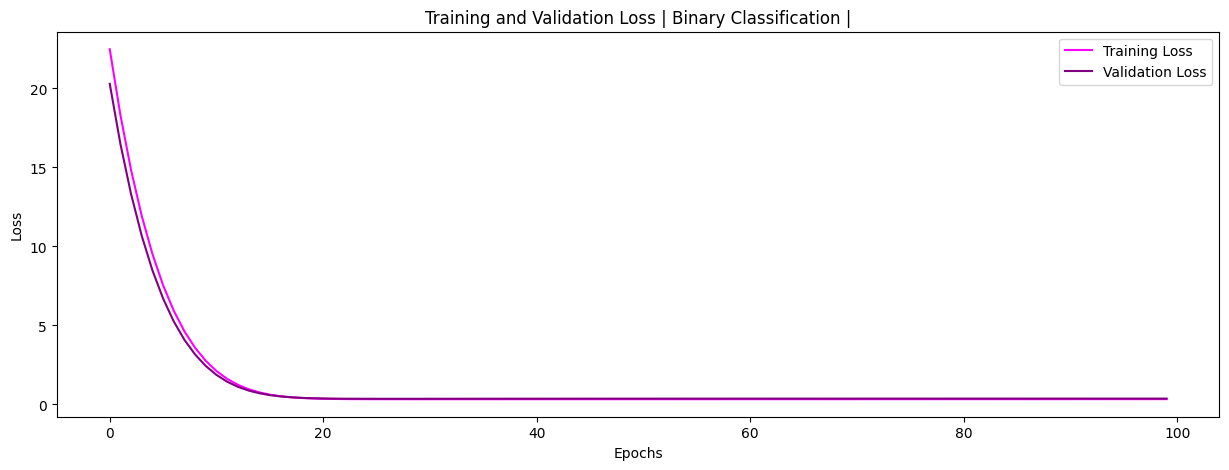

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.plot(train_losses, color='magenta', label='Training Loss')
plt.plot(val_losses, color='purple', label='Validation Loss')
plt.title('Training and Validation Loss | Binary Classification |')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:


predicted_output_train = model_binary_classification.forward(X_train_Binary)
y_predicted_train = predicted_output_train[:][-1]

y_true_Binary = np.argmax(y_train_Binary, axis = 1)

print('Performance on the training data')
print(f'Classfication Accuracy : {accuracy(y_true_Binary, y_predicted_train):.4f}')
print(f'F1 Score : {f1_score(y_true_Binary, y_predicted_train):.4f}')

Performance on the training data
Classfication Accuracy : 0.7834
F1 Score : 0.7894


In [ ]:
predicted_output = model_binary_classification.forward(X_test_Binary)
y_predicted = predicted_output[:][-1]
y_true_test_Binary = np.argmax(y_test_Binary, axis = 1)

print('Performance on the testing data')
print(f'Classfication Accuracy : {accuracy(y_true_test_Binary, y_predicted):.4f}')
print(f'F1 Score : {f1_score(y_true_test_Binary, y_predicted):.4f}')

Performance on the testing data
Classfication Accuracy : 0.7657
F1 Score : 0.7722


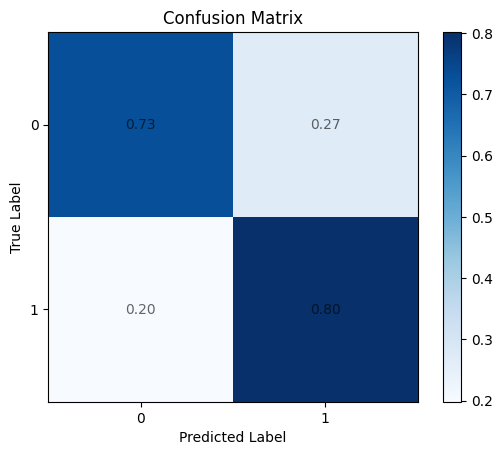

In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_true_test_Binary, y_predicted))

#### Results - Binary Classification

In [ ]:
# Load the model
mlp_binary_mse_l2_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_binary_classification_mse_l2_100_actual.pkl'
mlp_binary_mse_l2 = FullyConnectedNN.load_model(mlp_binary_mse_l2_path)
y_pred_mlp_binary_mse_l2 = mlp_binary_mse_l2.forward(X_test_Binary)[:][-1]
y_pred_mlp_binary_mse_l2_train = mlp_binary_mse_l2.predict_classification(X_train_Binary)[:][-1]

mlp_binary_ce_l2_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_binary_classification_ce_l2.pkl'
mlp_binary_ce_l2 = FullyConnectedNN.load_model(mlp_binary_ce_l2_path)
y_pred_mlp_binary_ce_l2 = mlp_binary_ce_l2.forward(X_test_Binary)[:][-1]
y_pred_mlp_binary_ce_l2_train = mlp_binary_ce_l2.predict_classification(X_train_Binary)[:][-1]

mlp_binary_ce_elastic_path = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks/Assignment - 02/model_binary_classification_ce_elastic.pkl'
mlp_binary_ce_elastic = FullyConnectedNN.load_model(mlp_binary_ce_elastic_path)
y_pred_mlp_binary_ce_elastic = mlp_binary_ce_elastic.forward(X_test_Binary)[:][-1]
y_pred_mlp_binary_ce_elastic_train = mlp_binary_ce_elastic.predict_classification(X_train_Binary)[:][-1]

y_true_Binary = np.argmax(y_train_Binary, axis = 1)
y_true_test_Binary = np.argmax(y_test_Binary, axis = 1)

print('Performance on the training and testing data')
print('mlp_binary_mse_l2')
print(f'Classfication Accuracy : {accuracy(y_true_Binary, y_pred_mlp_binary_mse_l2_train):.4f}')
print(f'F1 Score : {f1_score(y_true_Binary, y_pred_mlp_binary_mse_l2_train):.4f}')
print(f'Classfication Accuracy : {accuracy(y_true_test_Binary, y_pred_mlp_binary_mse_l2):.4f}')
print(f'F1 Score : {f1_score(y_true_test_Binary, y_pred_mlp_binary_mse_l2):.4f}')

print('mlp_binary_ce_l2')
print(f'Classfication Accuracy : {accuracy(y_true_Binary, y_pred_mlp_binary_ce_l2_train):.4f}')
print(f'F1 Score : {f1_score(y_true_Binary, y_pred_mlp_binary_ce_l2_train):.4f}')
print(f'Classfication Accuracy : {accuracy(y_true_test_Binary, y_pred_mlp_binary_ce_l2):.4f}')
print(f'F1 Score : {f1_score(y_true_test_Binary, y_pred_mlp_binary_ce_l2):.4f}')

print('mlp_binary_ce_elastic')
print(f'Classfication Accuracy : {accuracy(y_true_Binary, y_pred_mlp_binary_ce_elastic_train):.4f}')
print(f'F1 Score : {f1_score(y_true_Binary, y_pred_mlp_binary_ce_elastic_train):.4f}')
print(f'Classfication Accuracy : {accuracy(y_true_test_Binary, y_pred_mlp_binary_ce_elastic):.4f}')
print(f'F1 Score : {f1_score(y_true_test_Binary, y_pred_mlp_binary_ce_elastic):.4f}')

**Comparison of the different types of loss and regularization on Binary Classification**

| Model                 | Training Accuracy | Training F1 Score | Testing Accuracy | Testing F1 Score |
|-----------------------|-------------------|-------------------|------------------|------------------|
| mlp_binary_mse_l2     | 0.8428            | 0.8340            | 0.8557           | 0.8462           |
| mlp_binary_ce_l2      | 0.7834            | 0.7894            | 0.7657           | 0.7722           |
| mlp_binary_ce_elastic | 0.7834            | 0.7894            | 0.7657           | 0.7722           |



# **MLP and CNN**

### **Performance Metrics**

In [11]:
# Performance Metrics

# Classification Accuracy
def accuracy(actual_y, pred_y):

    if len(pred_y.shape)==3:
        pred_y = pred_y[:,:,0]
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)
    return np.sum(actual_y == pred_y) / actual_y.shape[0]

# Confusion Matrix
def confusion_matrix(actual_y, pred_y):
    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Get the unique labels
    unique_labels = np.unique(np.concatenate((actual_y, pred_y)))

    # Initialize the confusion matrix with zeros
    confusion_matrix = np.zeros((len(unique_labels), len(unique_labels)))

    # Fill the confusion matrix
    for i in range(len(actual_y)):
        actual_label = actual_y[i]
        pred_label = pred_y[i]
        confusion_matrix[unique_labels == actual_label, unique_labels == pred_label] += 1

    return confusion_matrix

# Plotting Confusion Matrix
def confusion_matrix_heatmap(cm, title="Confusion Matrix"):

  # Get the number of classes
  num_classes = np.shape(cm)[0]

  # Make the cm into probability_cm
  row_sums = cm.sum(axis=1, keepdims=True)  # Calculate the row sums

  # Normalize by row sums to get probabilities
  probability_cm = cm / row_sums

  # Create the heatmap
  plt.imshow(probability_cm, cmap="Blues")  # Choose a colormap
  plt.colorbar()

  for i in range(num_classes):
    for j in range(num_classes):
        # Format the text to display two decimal places
        text = f"{probability_cm[i, j]:.2f}"
        plt.text(j, i, text, ha="center", va="center", fontsize=10, color="black", alpha = 0.6)  # Adjust fontsize and color as needed

  # Add labels and title
  plt.xticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.yticks(ticks = np.arange(num_classes), labels = np.arange(0, num_classes))
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.title(title)

  # Show the plot
  plt.show()

def f1_score(actual_y, pred_y):

    if len(pred_y.shape)>1:
        if pred_y.shape[1]>1:
            pred_y = np.argmax(pred_y,axis=1)

    # Check if labels are multi-class or binary classification
    if len(np.unique(actual_y)) > 2:
        # Multi-class classification: calculate F1 score for each class and average
        f1_scores = []
        for class_label in np.unique(actual_y):
            TP = np.sum((actual_y == class_label) & (pred_y == class_label))
            FP = np.sum((actual_y != class_label) & (pred_y == class_label))
            FN = np.sum((actual_y == class_label) & (pred_y != class_label))
            precision = TP / (TP + FP) if (TP + FP) > 0 else 0
            recall = TP / (TP + FN) if (TP + FN) > 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            f1_scores.append(f1_score)
        return np.mean(f1_scores)
    else:
        # Binary classification: calculate F1 score directly
        TP = np.sum((actual_y == 1) & (pred_y == 1))
        FP = np.sum((actual_y != 1) & (pred_y == 1))
        FN = np.sum((actual_y == 1) & (pred_y != 1))
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        return f1_score

def roc_curve_pair(actual_y, pred_y, class_0, class_1):
    """
    Calculates the ROC curve for a specific pair of classes in a multi-class problem.

    Args:
        actual_y: A numpy array of the actual labels.
        pred_y: A numpy array of the predicted probabilities for each class.
        class_0: The label of the first class in the pair.
        class_1: The label of the second class in the pair.

    Returns:
        A tuple of (fpr, tpr, thresholds):
            fpr: False positive rate
            tpr: True positive rate
            thresholds: Decision thresholds used to compute fpr and tpr
    """

    # Filter data for the chosen classes
    y_true = actual_y[((actual_y == class_0) | (actual_y == class_1))]
    y_score = pred_y[((actual_y == class_0) | (actual_y == class_1)), class_1]  # Probabilities for class_1

    # Get unique thresholds for ROC curve calculation
    thresholds = np.unique(np.sort(y_score))

    # Initialize fpr and tpr with 0s
    fpr = np.zeros_like(thresholds)
    tpr = np.zeros_like(thresholds)

    # Calculate TPR and FPR for each threshold
    for i, thresh in enumerate(thresholds):
        y_pred = (y_score >= thresh).astype(int)
        tp = np.sum(y_pred[y_true == class_1])
        fp = np.sum(y_pred[y_true == class_0])
        fn = np.sum((1 - y_pred)[y_true == class_1])
        tn = np.sum((1 - y_pred)[y_true == class_0])
        tpr[i] = tp / (tp + fn)
        fpr[i] = fp / (fp + tn)

    return fpr, tpr, thresholds

def plot_ROC(actual_y,pred_y,class_0,class_1):

    # Get ROC curve for classes 0 and 1
    fpr, tpr, thresholds = roc_curve_pair(actual_y, pred_y, class_0=class_0, class_1=class_1)

    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr, label='ROC curve')

    # Plot the line of no discrimination (random guessing)
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='No Discrimination')

    # Set axis labels and title
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC between Class:{class_0} and Class:{class_1}')

    # Add legend
    plt.legend()

    # Display plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def categorical_crossentropy_loss(y_true, y_pred):
    num_samples = len(y_true)
    loss = -np.sum(np.log(y_pred[np.arange(num_samples), y_true])) / num_samples
    return loss

## **General Tasks**

### **Layers**

In [12]:
# Conv2D Layer

class Conv:

    def __init__(self, input_shape, num_filters, kernel_size, padding='valid', stride=1):

        self.name = "Conv"

        self.input_shape = input_shape

        h, w = input_shape

        self.num_filters = num_filters
        self.kernel_size = kernel_size
        self.padding = padding
        self.stride = stride

        if self.padding == 'valid':
            # No padding, output size will reduce
            self.h_out = (h - self.kernel_size) // self.stride + 1
            self.w_out = (w - self.kernel_size) // self.stride + 1
        elif self.padding == 'same':
            # Same padding, output size same as input
            self.h_out = h // self.stride
            self.w_out = w // self.stride

        if self.padding == 'valid':
            self.pad = 0
        elif self.padding == 'same':
            self.pad = (self.kernel_size - 1) // 2

        self.filters = np.random.randn(num_filters, self.kernel_size, self.kernel_size) / self.kernel_size**2

        self.output_shape = (self.h_out,self.w_out)


    def iterate_regions(self, image):

        # generates all possible kernel_size * kernel_size image regions using padding and stride

        h, w = image.shape

        if self.padding == 'valid':
            # No padding, output size will reduce
            self.h_out = (h - self.kernel_size) // self.stride + 1
            self.w_out = (w - self.kernel_size) // self.stride + 1
        elif self.padding == 'same':
            # Same padding, output size same as input
            self.h_out = h // self.stride
            self.w_out = w // self.stride

        for i in range(0, h - self.kernel_size + 1, self.stride):
            for j in range(0, w - self.kernel_size + 1, self.stride):
                if self.padding == 'valid' or (i + self.kernel_size <= h and j + self.kernel_size <= w):
                    im_region = image[i:i+self.kernel_size, j:j+self.kernel_size]
                else:
                    # Padding
                    pad_top = max(0, self.kernel_size - h + i)
                    pad_bottom = max(0, self.kernel_size - (h - i))
                    pad_left = max(0, self.kernel_size - w + j)
                    pad_right = max(0, self.kernel_size - (w - j))
                    im_region = np.pad(image[i:i+self.kernel_size, j:j+self.kernel_size],
                                       ((pad_top, pad_bottom), (pad_left, pad_right)),
                                       mode='constant', constant_values=0)
                yield im_region, i, j

    def forward(self, input):

        self.last_input = input

        h, w = input.shape

        output = np.zeros((self.h_out, self.w_out, self.num_filters))

        for im_region, i, j in self.iterate_regions(input):
            output[i, j] = np.sum(im_region * self.filters, axis=(1, 2))

        return output

    def backprop(self, d_l_d_out, learn_rate, reg_type, reg_strength):
        '''
        Performs a backward pass of the conv layer.
        - d_l_d_out is the loss gradient for this layer's outputs.
        - learn_rate is a float.
        '''
        d_l_d_filters = np.zeros(self.filters.shape)
        d_l_d_input = np.zeros(self.last_input.shape)

        for im_region, i, j in self.iterate_regions(self.last_input):
            for f in range(self.num_filters):
                d_l_d_filters[f] += d_l_d_out[i, j, f] * im_region
                if self.padding == 'valid' or (i + self.kernel_size <= d_l_d_input.shape[0] and j + self.kernel_size <= d_l_d_input.shape[1]):
                    d_l_d_input[i:i+self.kernel_size, j:j+self.kernel_size] += d_l_d_out[i, j, f] * self.filters[f]
                else:
                    pad_top = max(0, self.kernel_size - d_l_d_input.shape[0] + i)
                    pad_bottom = max(0, self.kernel_size - (d_l_d_input.shape[0] - i))
                    pad_left = max(0, self.kernel_size - d_l_d_input.shape[1] + j)
                    pad_right = max(0, self.kernel_size - (d_l_d_input.shape[1] - j))
                    d_l_d_input[i:i+self.kernel_size, j:j+self.kernel_size] += d_l_d_out[i, j, f] * self.filters[f][pad_top:self.kernel_size-pad_bottom, pad_left:self.kernel_size-pad_right]


        # Regularization
        if reg_type:
            if reg_type == 'l2':
                d_l_d_filters += reg_strength * self.filters
            elif reg_type == 'l1':
                d_l_d_filters += reg_strength * np.sign(self.filters)

        # update filters
        self.filters -= learn_rate * d_l_d_filters

        return d_l_d_input


In [13]:
# Dense Layer

class Dense:

    def __init__(self, input_len, nodes):
        self.name = "Dense"
        self.weights = np.random.randn(input_len, nodes) / input_len
        self.biases = np.zeros(nodes)
        self.input_shape = input_len
        self.output_shape = nodes

    def forward(self, input):
        self.last_input_shape = input.shape
        input = input.flatten()
        self.last_input = input
        totals = np.dot(input, self.weights) + self.biases
        return totals

    def backprop(self, d_l_d_out, learn_rate, reg_type, reg_strength):

        d_l_d_inputs = np.dot(d_l_d_out, self.weights.T)
        d_l_d_weights = np.dot(self.last_input.reshape(-1, 1), d_l_d_out.reshape(1, -1))
        d_l_d_biases = d_l_d_out

        # Regularization Gradient
        reg_grad = 0
        if reg_type:
            if reg_type == 'l1':
                reg_grad = reg_strength * np.sign(self.weights)
            elif reg_type == 'l2':
                reg_grad = reg_strength * self.weights
            elif reg_type == 'elastic_net':
                l1_ratio = 0.5
                l1_grad = reg_strength * l1_ratio * np.sign(self.weights)
                l2_grad = reg_strength * (1 - l1_ratio) * self.weights
                reg_grad = l1_grad + l2_grad

        self.weights -= learn_rate * (d_l_d_weights + reg_grad)
        #self.weights -= learn_rate * d_l_d_weights
        self.biases -= learn_rate * d_l_d_biases
        return d_l_d_inputs.reshape(self.last_input_shape)


In [14]:
# Dense with Softmax

class Dense_Softmax:

    def __init__(self, input_len, nodes):

        self.name = "Dense_Softmax"
        # We divide by input_len to reduce the variance of our initial values
        self.weights = np.random.randn(input_len, nodes)/input_len
        self.biases = np.zeros(nodes)

        self.input_shape = input_len
        self.output_shape = nodes

    def forward(self, input):

        self.last_input_shape = input.shape

        input = input.flatten()
        self.last_input = input

        input_len, nodes = self.weights.shape

        totals = np.dot(input, self.weights) + self.biases
        self.last_totals = totals

        exp = np.exp(totals)
        return(exp/np.sum(exp, axis=0))

    def backprop(self, d_l_d_out, learn_rate, reg_type, reg_strength):
        """
        Performs a backward pass of the softmax layer.
        Returns the loss gradient for this layers inputs.
        - d_L_d_out is the loss gradient for this layers outputs.
        """

        #We know only 1 element of d_l_d_out will be nonzero
        for i, gradient in enumerate(d_l_d_out):
            if(gradient == 0):
                continue

            #e^totals
            t_exp = np.exp(self.last_totals)

            #Sum of all e^totals
            S = np.sum(t_exp)

            #gradients of out[i] against totals
            d_out_d_t = -t_exp[i] * t_exp/ (S**2)
            d_out_d_t[i] = t_exp[i] * (S-t_exp[i]) /(S**2)

            # Gradients of totals against weights/biases/input
            d_t_d_w = self.last_input
            d_t_d_b = 1
            d_t_d_inputs = self.weights

            #Gradients of loss against totals
            d_l_d_t = gradient * d_out_d_t

            #Gradients of loss against weights/biases/input
            d_l_d_w = d_t_d_w[np.newaxis].T @ d_l_d_t[np.newaxis]
            d_l_d_b = d_l_d_t * d_t_d_b
            d_l_d_inputs = d_t_d_inputs @ d_l_d_t

            # Regularization
            if reg_type == 'l2':
                d_l_d_w += reg_strength * self.weights
            elif reg_type == 'l1':
                d_l_d_w += reg_strength * np.sign(self.weights)
            elif reg_type == 'elastic_net':
                   d_l_d_w += reg_strength * (self.weights + np.sign(self.weights))

            #update weights/biases
            self.weights -= learn_rate * d_l_d_w
            self.biases -= learn_rate * d_l_d_b
            return d_l_d_inputs.reshape(self.last_input_shape)

In [15]:
class Sigmoid:

    def __init__(self):
        self.name = "Sigmoid"
        self.input_shape = None
        self.output_shape = None

    def forward(self, input):
        self.last_input = input
        return 1 / (1 + np.exp(-input))

    def backprop(self, d_out, learn_rate, reg_type, reg_strength):
        sig = self.forward(self.last_input)
        return d_out * sig * (1 - sig)


class ReLU:

    def __init__(self):
        self.name = "ReLU"
        self.input_shape = None
        self.output_shape = None

    def forward(self, input):
        self.last_input = input
        return np.maximum(0, input)

    def backprop(self, d_out, learn_rate, reg_type, reg_strength):
        d_input = d_out.copy()
        d_input[self.last_input <= 0] = 0
        return d_input

class LeakyReLU:
    def __init__(self, alpha=0.1):
        self.name = "LeakyReLU"
        self.alpha = alpha
        self.input_shape = None
        self.output_shape = None

    def forward(self, input):
        self.last_input = input
        return np.where(input > 0, input, input * self.alpha)

    def backprop(self, d_out, learn_rate, reg_type, reg_strength):
        return np.where(self.last_input > 0, d_out, d_out * self.alpha)

### **Deep Model**

In [16]:
# The Main Model

class Model:

    def __init__(self, network):

        self.network = network

    def forward(self, image, label, loss_type = 'cross_entropy'):

        # out = (image / 255) - 0.5
        out = image

        for layer in self.network:
            out = layer.forward(out)

        if loss_type == 'cross_entropy':
            loss = self.cross_entropy_loss(out,label)

        elif loss_type == 'mse':
            loss = self.mse_loss(out,label)

        acc = 1 if (np.argmax(out) == label) else 0

        return out, loss, acc

    def predict(self, image):
        # out = (image / 255) - 0.5

        out = image

        for layer in self.network:
            out = layer.forward(out)

        return np.argmax(out)

    def train(self, im, label, lr, reg_type, reg_strength = 0, loss_type='cross_entropy'):

        out, loss, acc = self.forward(im, label, loss_type = loss_type)

        if loss_type == 'cross_entropy':
            gradient = np.zeros(10)
            gradient[label] = -1 / out[label]

        elif loss_type == 'mse':
            label_one_hot = np.zeros_like(out)
            label_one_hot[label] = 1
            gradient = 2 * (out - label_one_hot)

        # Regularization
        if reg_type:
            if reg_type == 'l2':
                reg_loss = 0
                for layer in self.network:
                    if hasattr(layer, 'weights'):
                        reg_loss += 0.5 * reg_strength * np.sum(layer.weights ** 2)
                loss += reg_loss

            elif reg_type == 'l1':
                reg_loss = 0
                for layer in self.network:
                    if hasattr(layer, 'weights'):
                        reg_loss += reg_strength * np.sum(np.abs(layer.weights))
                loss += reg_loss

            elif reg_type == 'elastic_net':
                l1_loss = 0
                l2_loss = 0
                l1_ratio = 0.5
                for layer in self.network:
                    if hasattr(layer, 'weights'):
                        l1_loss += reg_strength * l1_ratio * np.sum(np.abs(layer.weights))
                        l2_loss += 0.5 * reg_strength * (1 - l1_ratio) * np.sum(layer.weights ** 2)
                loss += l1_loss + l2_loss


        for layer in reversed(self.network):
            gradient = layer.backprop(gradient, lr, reg_type, reg_strength)

        return loss, acc

    def cross_entropy_loss(self, output, label):
        return -np.log(output[label])

    def mse_loss(self, output, label):
        y_true = np.zeros_like(output)
        y_true[label] = 1
        return np.mean((output - y_true) ** 2)

    def accuracy(self,actual_y, pred_y):

        if len(pred_y.shape)==3:
            pred_y = pred_y[:,:,0]
        if len(pred_y.shape)>1:
            if pred_y.shape[1]>1:
                pred_y = np.argmax(pred_y,axis=1)
        return np.sum(actual_y == pred_y) / actual_y.shape[0]

    def fit(self, X_train, y_train, validation_x, validation_y, batch_size = 32, epochs=3, learning_rate = 0.005, loss_type='cross_entropy', reg_type = None, reg_strength = 0):

        self.X_train = X_train
        self.y_train = y_train
        self.validation_x = validation_x
        self.validation_y = validation_y


        self.Training_loss_list = []
        self.Validation_loss_list = []

        for epoch in range(epochs):
            print(f'----EPOCH {epoch + 1} ---')

            permutation = np.random.permutation(len(self.X_train))
            X_train = self.X_train[permutation]
            y_train = self.y_train[permutation]

            loss = 0
            num_correct = 0
            val_loss=0

            for i, (im, label) in enumerate(zip(X_train, y_train)):

                if (i > 0 and i % batch_size == batch_size - 1):

                    # validation
                    y_pred = []
                    for image,y_label in zip(self.validation_x,self.validation_y):
                        out_im,val_loss_i,_ = self.forward(image,y_label, loss_type = loss_type)
                        val_loss += val_loss_i
                        y_pred.append(out_im)
                    y_pred = np.array(y_pred)
                    val_acc = accuracy(self.validation_y, y_pred)

                    self.Training_loss_list.append(loss/batch_size)
                    self.Validation_loss_list.append(val_loss / self.validation_y.shape[0])

                    print(f'[Step {i + 1}] Training Loss {loss / batch_size:.3f} | Training Accuracy: {num_correct * 100 / batch_size :.2f}% | Validation Accuracy : {val_acc * 100:.2f}%')

                    loss = 0
                    num_correct = 0
                    val_loss = 0

                l, acc = self.train(im, label, reg_type = reg_type, reg_strength=reg_strength, lr =  learning_rate , loss_type = loss_type)
                loss += l
                num_correct += acc


    def summary(self):
        print("Model Summary:")
        total_params = 0
        for i, layer in enumerate(self.network):
            print(f"Layer {i + 1}: {layer.name}")
            print(f"  Input Shape: {layer.input_shape}")
            print(f"  Output Shape: {layer.output_shape}")

            if hasattr(layer, 'filters'):
                print(f"  Number of Filters: {layer.num_filters}")
                print(f"  Filter Shape : {(layer.kernel_size,layer.kernel_size)}")
                params = layer.filters.size
                total_params += params
                print(f"  Trainable Parameters: {params}")

            if hasattr(layer, 'weights') and hasattr(layer, 'biases'):
                params = layer.weights.size + layer.biases.size
                total_params += params
                print(f"  Trainable Parameters: {params}")
        print(f"Total Trainable Parameters: {total_params}")

    def save_model(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self, f)

    @staticmethod
    def load_model(filename):
        with open(filename, 'rb') as f:
            model = pickle.load(f)
        return model

## **Classification Tasks**

* **Multi Class Classification of A1**
* **Japanese MNIST (K-MNIST)**

### **MLP Multi Class Data (A1)**

#### **MLP**

##### **No Regularization**

In [232]:
# validation
VALIDATION_SIZE = 1000
validation_x = X_train_Multiclass[:VALIDATION_SIZE]
validation_y = Y_train_Multiclass[:VALIDATION_SIZE]

###### **Training**

In [ ]:
network_MLP_Multi_no_reg  = [
    Dense(25,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense(64,32),
    LeakyReLU(),
    Dense(32,10)
]

# Instantiate the Model object
MLP_Multi_no_reg = Model(network_MLP_Multi_no_reg)

MLP_Multi_no_reg.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [ ]:
# Train the model
MLP_Multi_no_reg.fit(X_train_Multiclass, Y_train_Multiclass, validation_x, validation_y, epochs=50, batch_size = 20000, learning_rate = 0.001, loss_type = 'mse')

----EPOCH 1 ---
[Step 20000] Training Loss 0.090 | Training Accuracy: 10.12% | Validation Accuracy : 9.30%
[Step 40000] Training Loss 0.090 | Training Accuracy: 10.16% | Validation Accuracy : 9.10%
----EPOCH 2 ---
[Step 20000] Training Loss 0.090 | Training Accuracy: 11.16% | Validation Accuracy : 13.30%
[Step 40000] Training Loss 0.089 | Training Accuracy: 15.62% | Validation Accuracy : 16.20%
----EPOCH 3 ---
[Step 20000] Training Loss 0.087 | Training Accuracy: 21.11% | Validation Accuracy : 20.60%
[Step 40000] Training Loss 0.086 | Training Accuracy: 23.77% | Validation Accuracy : 23.30%
----EPOCH 4 ---
[Step 20000] Training Loss 0.084 | Training Accuracy: 28.54% | Validation Accuracy : 28.20%
[Step 40000] Training Loss 0.082 | Training Accuracy: 31.05% | Validation Accuracy : 30.40%
----EPOCH 5 ---
[Step 20000] Training Loss 0.079 | Training Accuracy: 35.51% | Validation Accuracy : 36.20%
[Step 40000] Training Loss 0.077 | Training Accuracy: 37.82% | Validation Accuracy : 36.90%
--

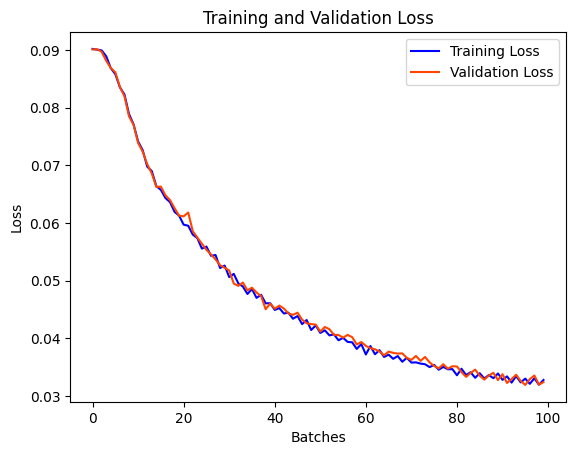

In [ ]:
# Plot the losses

plt.plot(MLP_Multi_no_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_Multi_no_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MLP_Multi_no_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_no_reg.pkl')

###### **Testing**

In [40]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_no_reg.pkl')

In [41]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [42]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in X_train_Multiclass:
    y_pred_train.append(MLP_loaded.predict(im))

In [43]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in X_test_Multiclass:
    y_pred_test.append(MLP_loaded.predict(im))

In [44]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of MLP on Multi-Class Classification : {accuracy(y_pred_train, Y_train_Multiclass)*100:.2f} %')
print(f'Training F1 Score of MLP on Multi-Class Classification : {f1_score(y_pred_train, Y_train_Multiclass):.3f}')

print(f'Testing Accuracy of MLP on Multi-Class Classification : {accuracy(y_pred_test, Y_test_Multiclass)*100:.2f} %')
print(f'Testing F1 Score of MLP on Multi-Class Classification : {f1_score(y_pred_test, Y_test_Multiclass):.3f}')

Training Accuracy of MLP on Multi-Class Classification : 81.39 %
Training F1 Score of MLP on Multi-Class Classification : 0.814
Testing Accuracy of MLP on Multi-Class Classification : 76.76 %
Testing F1 Score of MLP on Multi-Class Classification : 0.768


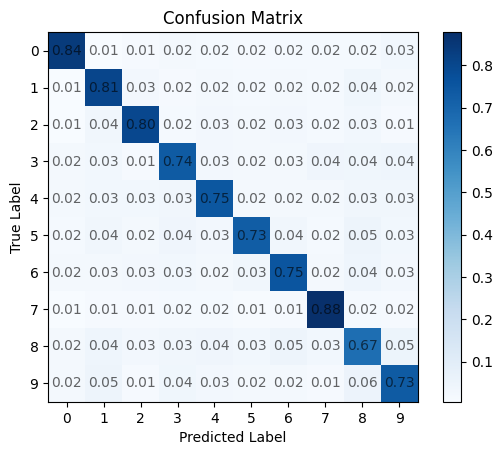

In [45]:
confusion_matrix_heatmap(confusion_matrix(y_pred_test, Y_test_Multiclass))

###### **Cross Entropy**

In [245]:
network_MLP_Multi_cross_entropy  = [
    Dense(25,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense(64,32),
    LeakyReLU(),
    Dense_Softmax(32,10)
]

# Instantiate the Model object
MLP_Multi_cross_entropy = Model(network_MLP_Multi_cross_entropy)

MLP_Multi_cross_entropy.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense_Softmax
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [246]:
# Train the model
MLP_Multi_cross_entropy.fit(X_train_Multiclass, Y_train_Multiclass, validation_x, validation_y, epochs=50, batch_size = 20000, learning_rate = 0.001, loss_type = 'cross_entropy')

----EPOCH 1 ---
[Step 20000] Training Loss 2.303 | Training Accuracy: 10.14% | Validation Accuracy : 11.30%
[Step 40000] Training Loss 2.303 | Training Accuracy: 10.26% | Validation Accuracy : 10.00%
----EPOCH 2 ---
[Step 20000] Training Loss 2.302 | Training Accuracy: 10.21% | Validation Accuracy : 9.10%
[Step 40000] Training Loss 2.303 | Training Accuracy: 10.06% | Validation Accuracy : 9.30%
----EPOCH 3 ---
[Step 20000] Training Loss 2.302 | Training Accuracy: 10.22% | Validation Accuracy : 11.30%
[Step 40000] Training Loss 2.302 | Training Accuracy: 10.31% | Validation Accuracy : 9.90%
----EPOCH 4 ---
[Step 20000] Training Loss 2.301 | Training Accuracy: 11.52% | Validation Accuracy : 9.30%
[Step 40000] Training Loss 2.298 | Training Accuracy: 14.23% | Validation Accuracy : 13.80%
----EPOCH 5 ---
[Step 20000] Training Loss 2.187 | Training Accuracy: 18.25% | Validation Accuracy : 18.30%
[Step 40000] Training Loss 2.153 | Training Accuracy: 19.98% | Validation Accuracy : 18.20%
----

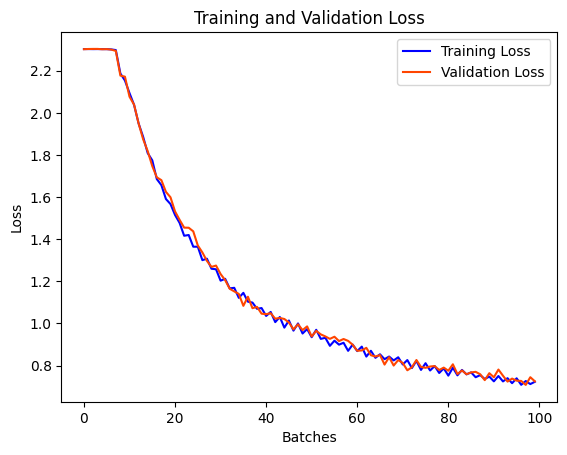

In [247]:
# Plot the losses

plt.plot(MLP_Multi_cross_entropy.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_Multi_cross_entropy.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [248]:
MLP_Multi_cross_entropy.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_cross_entropy.pkl')

In [249]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_cross_entropy.pkl')

In [250]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense_Softmax
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [251]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in X_train_Multiclass:
    y_pred_train.append(MLP_loaded.predict(im))

In [252]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in X_test_Multiclass:
    y_pred_test.append(MLP_loaded.predict(im))

In [254]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of MLP (Cross Entropy) on Multi-Class Classification : {accuracy(y_pred_train, Y_train_Multiclass)*100:.2f} %')
print(f'Training F1 Score of MLP (Cross Entropy) on Multi-Class Classification : {f1_score(y_pred_train, Y_train_Multiclass):.3f}')

print(f'Testing Accuracy of MLP (Cross Entropy) on Multi-Class Classification : {accuracy(y_pred_test, Y_test_Multiclass)*100:.2f} %')
print(f'Testing F1 Score of MLP (Cross Entropy) on Multi-Class Classification : {f1_score(y_pred_test, Y_test_Multiclass):.3f}')

Training Accuracy of MLP (Cross Entropy) on Multi-Class Classification : 77.72 %
Training F1 Score of MLP (Cross Entropy) on Multi-Class Classification : 0.777
Testing Accuracy of MLP (Cross Entropy) on Multi-Class Classification : 71.27 %
Testing F1 Score of MLP (Cross Entropy) on Multi-Class Classification : 0.712


In [ ]:
confusion_matrix_heatmap(confusion_matrix(y_pred_test, Y_test_Multiclass))

##### **$L_1$ Regularization**

###### **Training**

In [29]:
network_MLP_Multi_l1_reg  = [
    Dense(25,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense(64,32),
    LeakyReLU(),
    Dense(32,10)
]

# Instantiate the Model object
MLP_Multi_l1_reg = Model(network_MLP_Multi_l1_reg)

MLP_Multi_l1_reg.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [30]:
# Train the model
MLP_Multi_l1_reg.fit(X_train_Multiclass, Y_train_Multiclass, validation_x, validation_y, epochs=50, batch_size = 20000, learning_rate = 0.001, loss_type = 'mse', reg_type = 'l1', reg_strength = 0.00001)

----EPOCH 1 ---
[Step 20000] Training Loss 0.092 | Training Accuracy: 10.10% | Validation Accuracy : 11.50%
[Step 40000] Training Loss 0.092 | Training Accuracy: 9.79% | Validation Accuracy : 9.30%
----EPOCH 2 ---
[Step 20000] Training Loss 0.092 | Training Accuracy: 10.65% | Validation Accuracy : 9.10%
[Step 40000] Training Loss 0.091 | Training Accuracy: 13.28% | Validation Accuracy : 16.10%
----EPOCH 3 ---
[Step 20000] Training Loss 0.090 | Training Accuracy: 16.48% | Validation Accuracy : 14.60%
[Step 40000] Training Loss 0.090 | Training Accuracy: 19.70% | Validation Accuracy : 20.00%
----EPOCH 4 ---
[Step 20000] Training Loss 0.088 | Training Accuracy: 26.86% | Validation Accuracy : 26.50%
[Step 40000] Training Loss 0.087 | Training Accuracy: 28.41% | Validation Accuracy : 28.70%
----EPOCH 5 ---
[Step 20000] Training Loss 0.084 | Training Accuracy: 32.70% | Validation Accuracy : 33.00%
[Step 40000] Training Loss 0.083 | Training Accuracy: 34.36% | Validation Accuracy : 34.40%
---

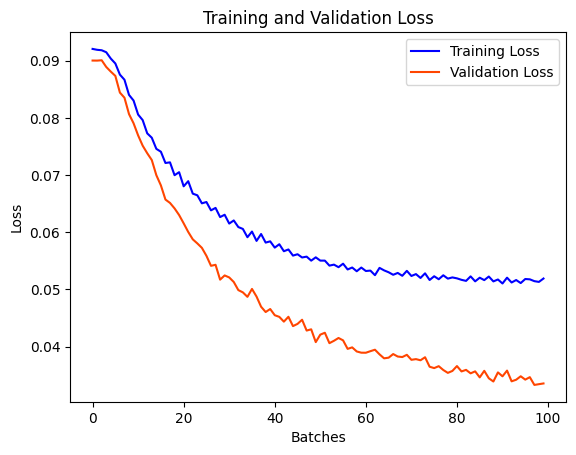

In [39]:
# Plot the losses

plt.plot(MLP_Multi_l1_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_Multi_l1_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
MLP_Multi_l1_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_l1_reg.pkl')

###### **Testing**

In [223]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_l1_reg.pkl')

In [224]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [225]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in X_train_Multiclass:
    y_pred_train.append(MLP_loaded.predict(im))

In [226]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in X_test_Multiclass:
    y_pred_test.append(MLP_loaded.predict(im))

In [227]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L1 Regularized MLP on Multi-Class Classification : {accuracy(y_pred_train, Y_train_Multiclass)*100:.2f} %')
print(f'Training F1 Score of L1 Regularized MLP on Multi-Class Classification : {f1_score(y_pred_train, Y_train_Multiclass):.3f}')

print(f'Testing Accuracy of L1 Regularized MLP on Multi-Class Classification : {accuracy(y_pred_test, Y_test_Multiclass)*100:.2f} %')
print(f'Testing F1 Score of L1 Regularized MLP on Multi-Class Classification : {f1_score(y_pred_test, Y_test_Multiclass):.3f}')

Training Accuracy of L1 Regularized MLP on Multi-Class Classification : 80.58 %
Training F1 Score of L1 Regularized MLP on Multi-Class Classification : 0.806
Testing Accuracy of L1 Regularized MLP on Multi-Class Classification : 75.79 %
Testing F1 Score of L1 Regularized MLP on Multi-Class Classification : 0.758


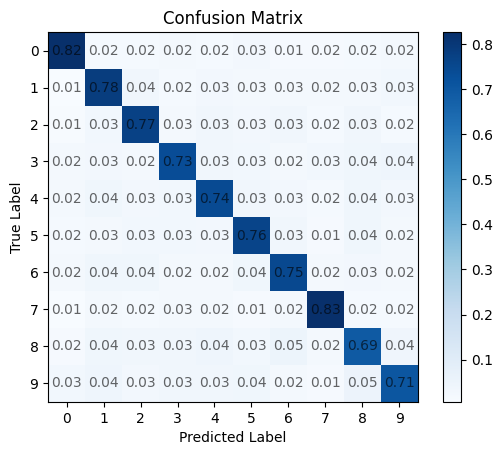

In [228]:
confusion_matrix_heatmap(confusion_matrix(y_pred_test, Y_test_Multiclass))

##### **$L_2$ Regularization**

###### **Training**

In [233]:
network_MLP_Multi_l2_reg  = [
    Dense(25,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense(64,32),
    LeakyReLU(),
    Dense(32,10)
]

# Instantiate the Model object
MLP_Multi_l2_reg = Model(network_MLP_Multi_l2_reg)

MLP_Multi_l2_reg.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [234]:
# Train the model
MLP_Multi_l2_reg.fit(X_train_Multiclass, Y_train_Multiclass, validation_x, validation_y, epochs=50, batch_size = 20000, learning_rate = 0.001, loss_type = 'mse', reg_type = 'l2', reg_strength = 0.00001)

----EPOCH 1 ---
[Step 20000] Training Loss 0.090 | Training Accuracy: 10.03% | Validation Accuracy : 11.40%
[Step 40000] Training Loss 0.090 | Training Accuracy: 9.71% | Validation Accuracy : 9.90%
----EPOCH 2 ---
[Step 20000] Training Loss 0.090 | Training Accuracy: 11.21% | Validation Accuracy : 14.20%
[Step 40000] Training Loss 0.089 | Training Accuracy: 14.15% | Validation Accuracy : 15.50%
----EPOCH 3 ---
[Step 20000] Training Loss 0.087 | Training Accuracy: 20.41% | Validation Accuracy : 19.40%
[Step 40000] Training Loss 0.086 | Training Accuracy: 23.02% | Validation Accuracy : 20.10%
----EPOCH 4 ---
[Step 20000] Training Loss 0.084 | Training Accuracy: 27.00% | Validation Accuracy : 25.90%
[Step 40000] Training Loss 0.083 | Training Accuracy: 29.61% | Validation Accuracy : 27.60%
----EPOCH 5 ---
[Step 20000] Training Loss 0.080 | Training Accuracy: 33.38% | Validation Accuracy : 32.60%
[Step 40000] Training Loss 0.078 | Training Accuracy: 35.44% | Validation Accuracy : 35.30%
--

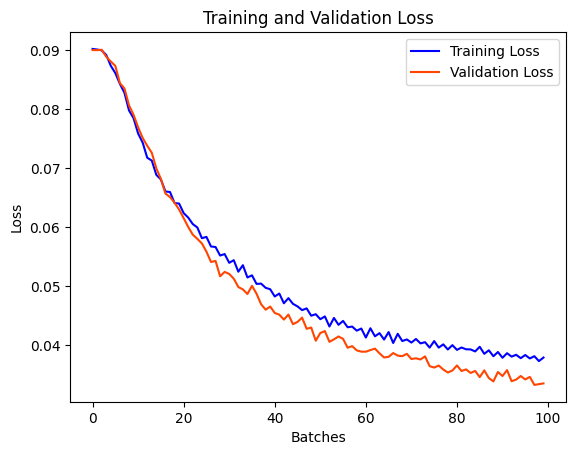

In [235]:
# Plot the losses

plt.plot(MLP_Multi_l2_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_Multi_l1_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [236]:
MLP_Multi_l2_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_l2_reg.pkl')

###### **Testing**

In [237]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_Multi_l2_reg.pkl')

In [238]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 25
  Output Shape: 128
  Trainable Parameters: 3328
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense
  Input Shape: 64
  Output Shape: 32
  Trainable Parameters: 2080
Layer 6: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 7: Dense
  Input Shape: 32
  Output Shape: 10
  Trainable Parameters: 330
Total Trainable Parameters: 13994


In [239]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in X_train_Multiclass:
    y_pred_train.append(MLP_loaded.predict(im))

In [240]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in X_test_Multiclass:
    y_pred_test.append(MLP_loaded.predict(im))

In [241]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L2 Regularized MLP on Multi-Class Classification : {accuracy(y_pred_train, Y_train_Multiclass)*100:.2f} %')
print(f'Training F1 Score of L2 Regularized MLP on Multi-Class Classification : {f1_score(y_pred_train, Y_train_Multiclass):.3f}')

print(f'Testing Accuracy of L2 Regularized MLP on Multi-Class Classification : {accuracy(y_pred_test, Y_test_Multiclass)*100:.2f} %')
print(f'Testing F1 Score of L2 Regularized MLP on Multi-Class Classification : {f1_score(y_pred_test, Y_test_Multiclass):.3f}')

Training Accuracy of L2 Regularized MLP on Multi-Class Classification : 79.85 %
Training F1 Score of L2 Regularized MLP on Multi-Class Classification : 0.799
Testing Accuracy of L2 Regularized MLP on Multi-Class Classification : 74.87 %
Testing F1 Score of L2 Regularized MLP on Multi-Class Classification : 0.748


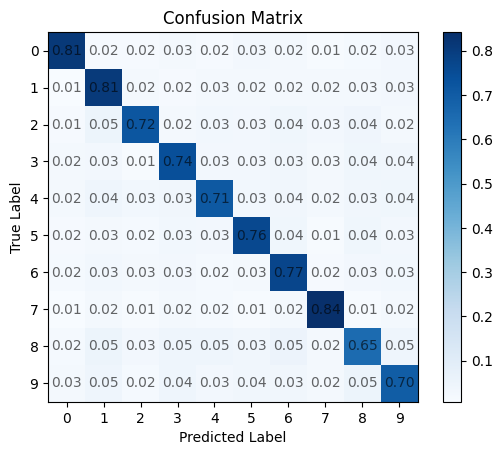

In [242]:
confusion_matrix_heatmap(confusion_matrix(y_pred_test, Y_test_Multiclass))

##### **Results**

**Performance of MLP with different Regularizations**

| Model Type                            | Training Accuracy | Training F1 Score | Testing Accuracy | Testing F1 Score |
|---------------------------------------|-------------------|-------------------|------------------|------------------|
| MLP                                   | 81.39%            | 0.814             | 76.76%           | 0.768            |
| L1 Regularized MLP                    | 80.58%            | 0.806             | 75.79%           | 0.758            |
| L2 Regularized MLP                    | 79.85%            | 0.799             | 74.87%           | 0.748            |
| MLP (Cross Entropy)                   | 77.72%            | 0.777             | 71.27%           | 0.712            |


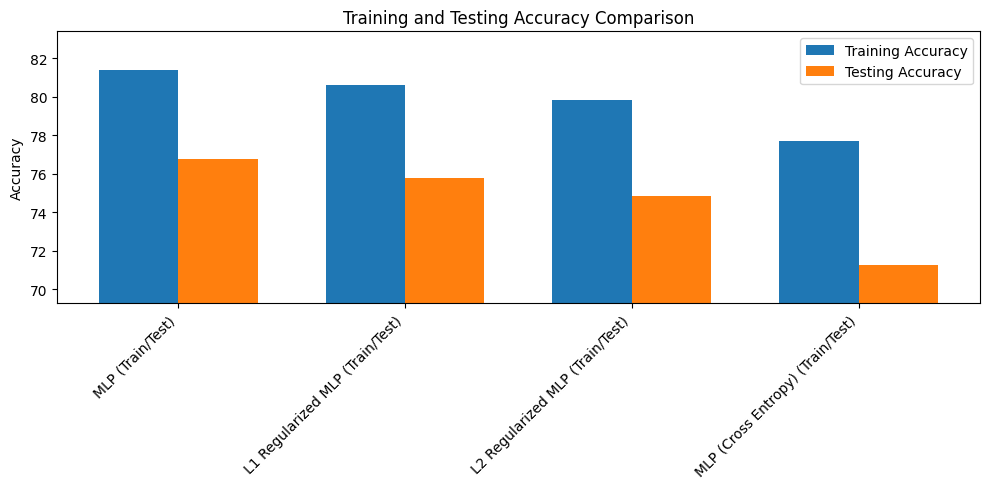

In [271]:
# Data
model_types = ['MLP', 'L1 Regularized MLP', 'L2 Regularized MLP', 'MLP (Cross Entropy)']
training_accuracy = [81.39, 80.58, 79.85, 77.72]
testing_accuracy = [76.76, 75.79, 74.87, 71.27]

# Calculate max and min values for y-limits
y_min = min(min(training_accuracy), min(testing_accuracy))
y_max = max(max(training_accuracy), max(testing_accuracy))

# Set the bar width
bar_width = 0.35

# Set the index for the bars
indices = np.arange(len(model_types))

# Plotting
plt.figure(figsize=(10, 5))

plt.bar(indices - bar_width/2, training_accuracy, bar_width, label='Training Accuracy')
plt.bar(indices + bar_width/2, testing_accuracy, bar_width, label='Testing Accuracy')

plt.title('Training and Testing Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(indices, [model + ' (Train/Test)' for model in model_types], rotation=45, ha='right')
plt.legend()
plt.ylim(y_min - 2, y_max + 2)  # Add a small margin for better visualization
plt.tight_layout()
plt.show()


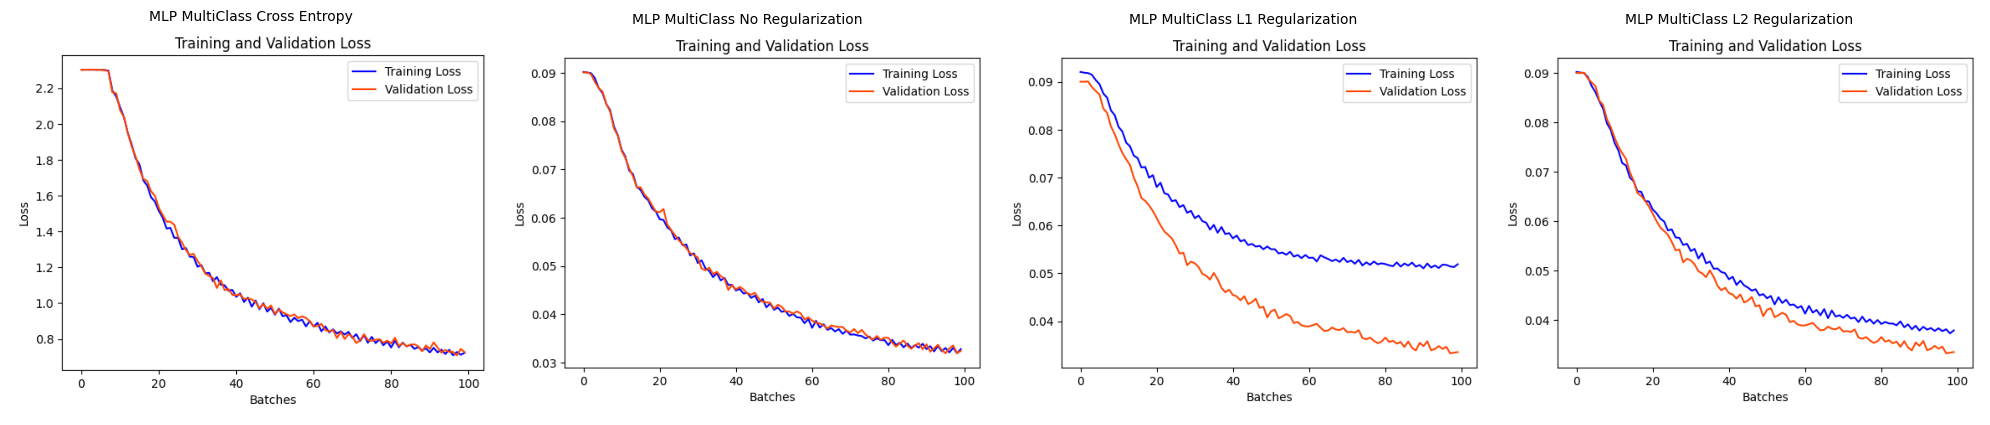

In [272]:
# Load images
MLP_MultiClass_cross_entropy = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP_MultiClass/MLP_MultiClass_cross_entropy.png')
MLP_MultiClass_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP_MultiClass/MLP_MultiClass_no_reg.png')
MLP_MultiClass_l1_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP_MultiClass/MLP_MultiClass_l1_reg.png')
MLP_MultiClass_l2_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP_MultiClass/MLP_MultiClass_l2_reg.png')

# Plotting
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(MLP_MultiClass_cross_entropy)
plt.axis('off')
plt.title('MLP MultiClass Cross Entropy', fontsize=10)

plt.subplot(1, 4, 2)
plt.imshow(MLP_MultiClass_no_reg)
plt.axis('off')
plt.title('MLP MultiClass No Regularization', fontsize=10)

plt.subplot(1, 4, 3)
plt.imshow(MLP_MultiClass_l1_reg)
plt.axis('off')
plt.title('MLP MultiClass L1 Regularization', fontsize=10)

plt.subplot(1, 4, 4)
plt.imshow(MLP_MultiClass_l2_reg)
plt.axis('off')
plt.title('MLP MultiClass L2 Regularization', fontsize=10)

plt.tight_layout()
plt.show()


### **MLP and CNN K-MNIST**

#### **MLP**

In [87]:
# Train
TRAIN_SIZE = 10000

train_x = X_train[:TRAIN_SIZE].copy()
train_y = y_train[:TRAIN_SIZE].copy()

# Validation
VALIDATION_SIZE = 1000

validation_x = X_test[:VALIDATION_SIZE].copy()
validation_y = y_test[:VALIDATION_SIZE].copy()

# Test

TEST_SIZE = 10000

test_x = X_test[:TEST_SIZE].copy()
test_y = y_test[:TEST_SIZE].copy()

##### **No Regularization**

###### **Training**

In [94]:
network_MLP  = [
    Dense(28*28*1,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense_Softmax(64,10)
]

# Instantiate the Model object
MLP = Model(network_MLP)

MLP.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [95]:
# Train the model
MLP.fit(train_x, train_y, validation_x, validation_y, epochs=2, batch_size = 64, learning_rate = 0.005, loss_type = 'cross_entropy')

----EPOCH 1 ---
[Step 64] Training Loss 2.266 | Training Accuracy: 10.94% | Validation Accuracy : 10.50%
[Step 128] Training Loss 2.303 | Training Accuracy: 12.50% | Validation Accuracy : 11.10%
[Step 192] Training Loss 2.303 | Training Accuracy: 10.94% | Validation Accuracy : 11.10%
[Step 256] Training Loss 2.304 | Training Accuracy: 10.94% | Validation Accuracy : 11.10%
[Step 320] Training Loss 2.305 | Training Accuracy: 15.62% | Validation Accuracy : 11.10%
[Step 384] Training Loss 2.303 | Training Accuracy: 7.81% | Validation Accuracy : 10.60%
[Step 448] Training Loss 2.303 | Training Accuracy: 14.06% | Validation Accuracy : 10.60%
[Step 512] Training Loss 2.301 | Training Accuracy: 14.06% | Validation Accuracy : 10.60%
[Step 576] Training Loss 2.292 | Training Accuracy: 21.88% | Validation Accuracy : 10.60%
[Step 640] Training Loss 2.295 | Training Accuracy: 14.06% | Validation Accuracy : 10.60%
[Step 704] Training Loss 2.311 | Training Accuracy: 7.81% | Validation Accuracy : 10.6

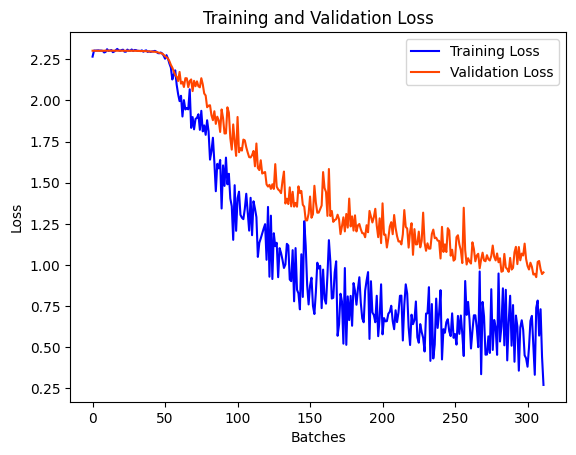

In [96]:
# Plot the losses

plt.plot(MLP.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [97]:
MLP.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_no_reg_109k.pkl')

###### **Testing**

In [98]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_no_reg_109k.pkl')

In [99]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [100]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(MLP_loaded.predict(im))

In [101]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(MLP_loaded.predict(im))

In [102]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of MLP on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of MLP on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of MLP on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of MLP on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of MLP on K-MNIST : 86.35 %
Training F1 Score of MLP on K-MNIST : 0.864
Testing Accuracy of MLP on K-MNIST : 71.02 %
Testing F1 Score of MLP on K-MNIST : 0.712


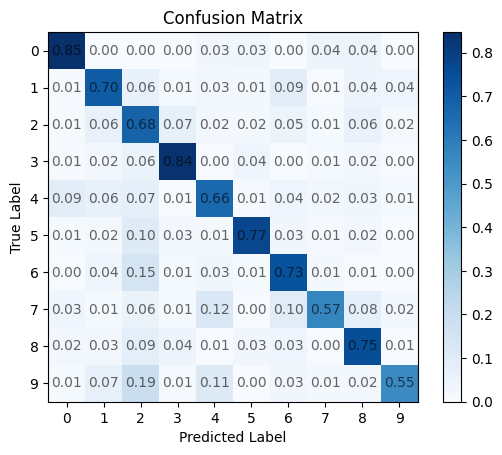

In [103]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

###### **MSE Loss**

In [ ]:
network_MLP_MSE  = [
    Dense(28*28*1,128),
    LeakyReLU(),
    Dense(128,10)
]

# Instantiate the Model object
MLP_MSE = Model(network_MLP_MSE)

MLP_MSE.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 10
  Trainable Parameters: 1290
Total Trainable Parameters: 101770


In [ ]:
# Train the model
MLP_MSE.fit(train_x, train_y, validation_x, validation_y, epochs=2, batch_size = 64, learning_rate = 0.005, loss_type = 'mse')

----EPOCH 1 ---
[Step 64] Training Loss 0.093 | Training Accuracy: 10.94% | Validation Accuracy : 10.70%
[Step 128] Training Loss 0.089 | Training Accuracy: 14.06% | Validation Accuracy : 18.90%
[Step 192] Training Loss 0.088 | Training Accuracy: 20.31% | Validation Accuracy : 18.90%
[Step 256] Training Loss 0.081 | Training Accuracy: 28.12% | Validation Accuracy : 23.90%
[Step 320] Training Loss 0.079 | Training Accuracy: 43.75% | Validation Accuracy : 31.00%
[Step 384] Training Loss 0.078 | Training Accuracy: 39.06% | Validation Accuracy : 30.90%
[Step 448] Training Loss 0.076 | Training Accuracy: 35.94% | Validation Accuracy : 25.00%
[Step 512] Training Loss 0.072 | Training Accuracy: 43.75% | Validation Accuracy : 37.30%
[Step 576] Training Loss 0.070 | Training Accuracy: 50.00% | Validation Accuracy : 36.40%
[Step 640] Training Loss 0.066 | Training Accuracy: 59.38% | Validation Accuracy : 31.10%
[Step 704] Training Loss 0.064 | Training Accuracy: 54.69% | Validation Accuracy : 44

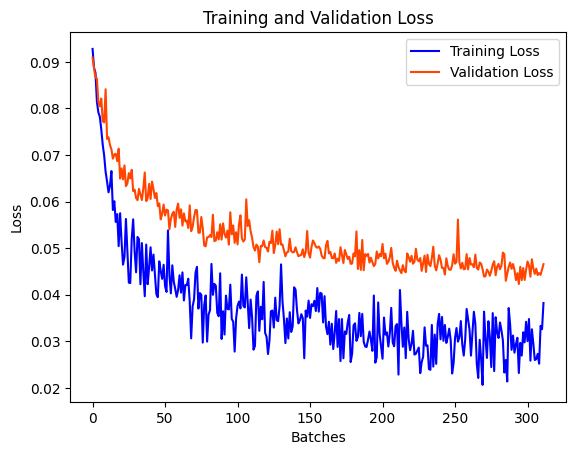

In [ ]:
# Plot the losses

plt.plot(MLP_MSE.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_MSE.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MLP_MSE.save_model('MLP_MSE.pkl')

In [ ]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('MLP_MSE.pkl')

In [ ]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 10
  Trainable Parameters: 1290
Total Trainable Parameters: 101770


In [ ]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(MLP_loaded.predict(im))

In [ ]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(MLP_loaded.predict(im))

In [ ]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of CNN on K-MNIST : 88.61 %
Training F1 Score of CNN on K-MNIST : 0.886
Testing Accuracy of CNN on K-MNIST : 72.78 %
Testing F1 Score of CNN on K-MNIST : 0.729


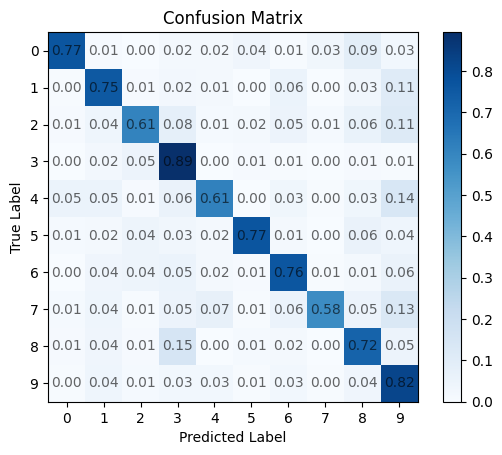

In [ ]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **$L_1$ Regularization**

###### **Training**

In [ ]:
network_MLP_l1  = [
    Dense(28*28*1,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense_Softmax(64,10)
]

# Instantiate the Model object
MLP_l1 = Model(network_MLP_l1)

MLP_l1.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [ ]:
# Train the model
MLP_l1.fit(train_x, train_y, validation_x, validation_y, epochs=5, batch_size = 128, learning_rate = 0.005, loss_type = 'cross_entropy', reg_type = 'l1', reg_strength = 0.0001)

----EPOCH 1 ---
[Step 128] Training Loss 2.299 | Training Accuracy: 14.06% | Validation Accuracy : 10.60%
[Step 256] Training Loss 2.317 | Training Accuracy: 11.72% | Validation Accuracy : 9.50%
[Step 384] Training Loss 2.321 | Training Accuracy: 7.03% | Validation Accuracy : 9.80%
[Step 512] Training Loss 2.311 | Training Accuracy: 11.72% | Validation Accuracy : 9.50%
[Step 640] Training Loss 2.316 | Training Accuracy: 10.16% | Validation Accuracy : 9.50%
[Step 768] Training Loss 2.315 | Training Accuracy: 8.59% | Validation Accuracy : 9.50%
[Step 896] Training Loss 2.315 | Training Accuracy: 10.16% | Validation Accuracy : 9.50%
[Step 1024] Training Loss 2.315 | Training Accuracy: 12.50% | Validation Accuracy : 9.50%
[Step 1152] Training Loss 2.311 | Training Accuracy: 14.06% | Validation Accuracy : 9.50%
[Step 1280] Training Loss 2.305 | Training Accuracy: 15.62% | Validation Accuracy : 9.50%
[Step 1408] Training Loss 2.320 | Training Accuracy: 9.38% | Validation Accuracy : 9.50%
[St

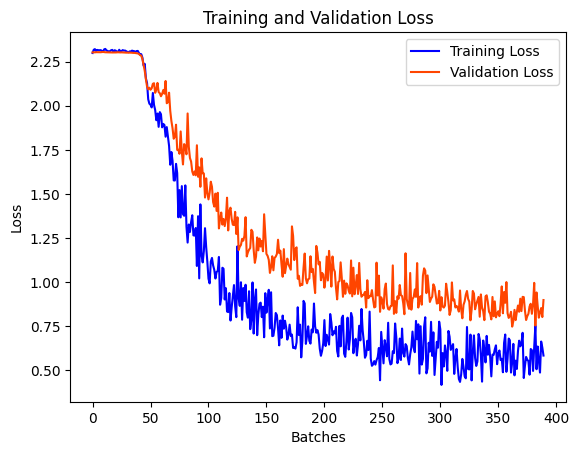

In [ ]:
# Plot the losses

plt.plot(MLP_l1.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_l1.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MLP_l1.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_l1.pkl')

###### **Testing**

In [104]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_l1.pkl')

In [105]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [106]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(MLP_loaded.predict(im))

In [107]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(MLP_loaded.predict(im))

In [108]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L1 Regularized MLP on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of L1 Regularized MLP on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of L1 Regularized MLP on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of L1 Regularized MLP on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of L1 Regularized MLP on K-MNIST : 90.33 %
Training F1 Score of L1 Regularized MLP on K-MNIST : 0.904
Testing Accuracy of L1 Regularized MLP on K-MNIST : 74.14 %
Testing F1 Score of L1 Regularized MLP on K-MNIST : 0.744


In [109]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L1 Regularized MLP on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of L1 Regularized MLP on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of L1 Regularized MLP on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of L1 Regularized MLP on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of L1 Regularized MLP on K-MNIST : 90.33 %
Training F1 Score of L1 Regularized MLP on K-MNIST : 0.904
Testing Accuracy of L1 Regularized MLP on K-MNIST : 74.14 %
Testing F1 Score of L1 Regularized MLP on K-MNIST : 0.744


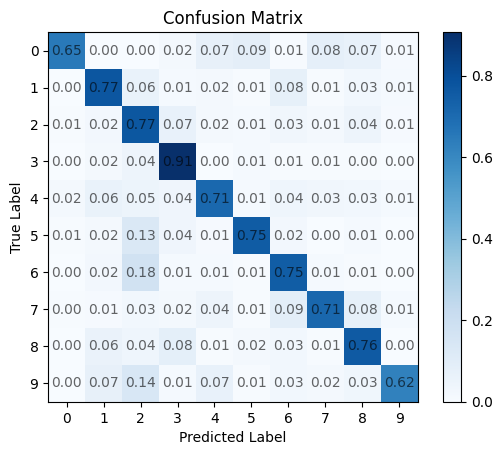

In [110]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **$L_2$ Regularization**

###### **Training**

In [ ]:
network_MLP_l2  = [
    Dense(28*28*1,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense_Softmax(64,10)
]

# Instantiate the Model object
MLP_l2 = Model(network_MLP_l2)

MLP_l2.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [ ]:
# Train the model
MLP_l2.fit(train_x, train_y, validation_x, validation_y, epochs=5, batch_size = 128, learning_rate = 0.005, loss_type = 'cross_entropy', reg_type = 'l2', reg_strength = 0.0001)

----EPOCH 1 ---
[Step 128] Training Loss 2.284 | Training Accuracy: 10.94% | Validation Accuracy : 9.80%
[Step 256] Training Loss 2.299 | Training Accuracy: 13.28% | Validation Accuracy : 9.50%
[Step 384] Training Loss 2.303 | Training Accuracy: 12.50% | Validation Accuracy : 9.50%
[Step 512] Training Loss 2.308 | Training Accuracy: 5.47% | Validation Accuracy : 9.50%
[Step 640] Training Loss 2.303 | Training Accuracy: 9.38% | Validation Accuracy : 9.50%
[Step 768] Training Loss 2.300 | Training Accuracy: 11.72% | Validation Accuracy : 9.80%
[Step 896] Training Loss 2.302 | Training Accuracy: 12.50% | Validation Accuracy : 9.80%
[Step 1024] Training Loss 2.297 | Training Accuracy: 13.28% | Validation Accuracy : 9.80%
[Step 1152] Training Loss 2.306 | Training Accuracy: 8.59% | Validation Accuracy : 9.80%
[Step 1280] Training Loss 2.304 | Training Accuracy: 8.59% | Validation Accuracy : 9.80%
[Step 1408] Training Loss 2.300 | Training Accuracy: 12.50% | Validation Accuracy : 9.80%
[Step

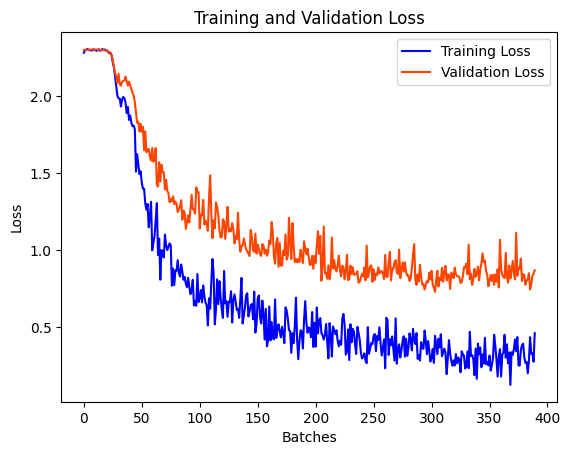

In [ ]:
# Plot the losses

plt.plot(MLP_l2.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_l2.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MLP_l2.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_l2.pkl')

###### **Testing**

In [111]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_l2.pkl')

In [112]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [113]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(MLP_loaded.predict(im))

In [114]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(MLP_loaded.predict(im))

In [115]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L2 Regularized MLP on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of L2 Regularized MLP on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of L2 Regularized MLP on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of L2 Regularized MLP on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of L2 Regularized MLP on K-MNIST : 91.90 %
Training F1 Score of L2 Regularized MLP on K-MNIST : 0.920
Testing Accuracy of L2 Regularized MLP on K-MNIST : 74.51 %
Testing F1 Score of L2 Regularized MLP on K-MNIST : 0.751


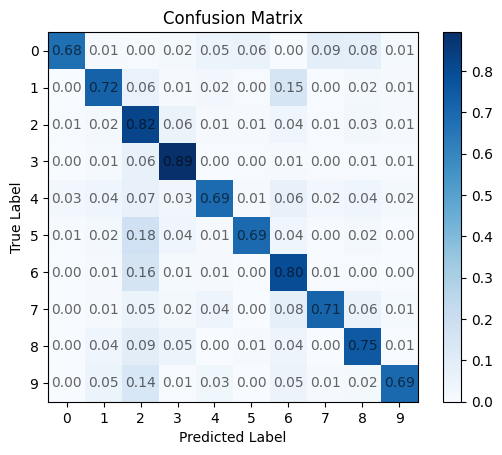

In [116]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **$ElasticNet$ Regularization**

###### **Training**

In [ ]:
network_MLP_elasticnet  = [
    Dense(28*28*1,128),
    LeakyReLU(),
    Dense(128,64),
    LeakyReLU(),
    Dense_Softmax(64,10)
]

# Instantiate the Model object
MLP_elasticnet = Model(network_MLP_elasticnet)

MLP_elasticnet.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [ ]:
# Train the model
MLP_elasticnet.fit(train_x, train_y, validation_x, validation_y, epochs=5, batch_size = 128, learning_rate = 0.005, loss_type = 'cross_entropy', reg_type = 'elastic_net', reg_strength = 0.0001)

----EPOCH 1 ---
[Step 128] Training Loss 2.293 | Training Accuracy: 13.28% | Validation Accuracy : 10.60%
[Step 256] Training Loss 2.309 | Training Accuracy: 10.16% | Validation Accuracy : 10.60%
[Step 384] Training Loss 2.310 | Training Accuracy: 14.06% | Validation Accuracy : 10.60%
[Step 512] Training Loss 2.313 | Training Accuracy: 7.81% | Validation Accuracy : 10.60%
[Step 640] Training Loss 2.311 | Training Accuracy: 10.16% | Validation Accuracy : 10.60%
[Step 768] Training Loss 2.311 | Training Accuracy: 10.16% | Validation Accuracy : 10.60%
[Step 896] Training Loss 2.308 | Training Accuracy: 10.94% | Validation Accuracy : 9.80%
[Step 1024] Training Loss 2.307 | Training Accuracy: 14.84% | Validation Accuracy : 9.80%
[Step 1152] Training Loss 2.311 | Training Accuracy: 10.16% | Validation Accuracy : 9.80%
[Step 1280] Training Loss 2.309 | Training Accuracy: 10.16% | Validation Accuracy : 9.80%
[Step 1408] Training Loss 2.307 | Training Accuracy: 13.28% | Validation Accuracy : 9.

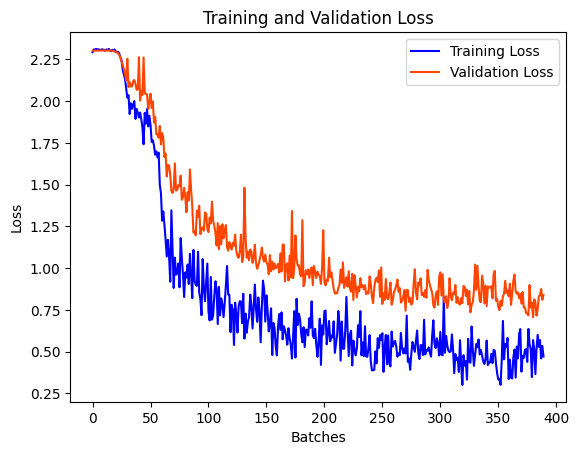

In [ ]:
# Plot the losses

plt.plot(MLP_elasticnet.Training_loss_list, 'b', label='Training Loss')
plt.plot(MLP_elasticnet.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
MLP_elasticnet.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_elastic_net.pkl')

###### **Testing**

In [123]:
network = []

# Instantiate the Model object
MLP_loaded = Model(network)
MLP_loaded = MLP_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/MLP/MLP_elastic_net.pkl')

In [124]:
MLP_loaded.summary()

Model Summary:
Layer 1: Dense
  Input Shape: 784
  Output Shape: 128
  Trainable Parameters: 100480
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 128
  Output Shape: 64
  Trainable Parameters: 8256
Layer 4: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 5: Dense_Softmax
  Input Shape: 64
  Output Shape: 10
  Trainable Parameters: 650
Total Trainable Parameters: 109386


In [125]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(MLP_loaded.predict(im))

In [126]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(MLP_loaded.predict(im))

In [127]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of Elastinet Regularized MLP on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of Elastinet Regularized MLP on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of Elastinet Regularized MLP on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of Elastinet Regularized MLP on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of Elastinet Regularized MLP on K-MNIST : 92.05 %
Training F1 Score of Elastinet Regularized MLP on K-MNIST : 0.922
Testing Accuracy of Elastinet Regularized MLP on K-MNIST : 74.12 %
Testing F1 Score of Elastinet Regularized MLP on K-MNIST : 0.748


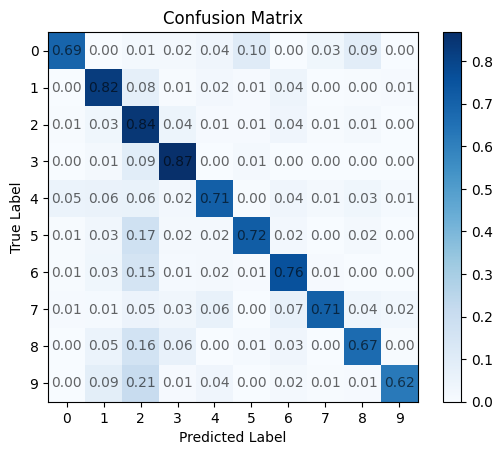

In [128]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **Results**


**Performance of MLP with varying Model Parameters**

| Parameters | Train Accuracy | Train F1 Score | Test Accuracy | Test F1 Score |
|------------|----------------|----------------|---------------|---------------|
| 468k       | 81.88%         | 0.819          | 65.07%        | 0.655         |
| 337k       | 80.55%         | 0.804          | 63.28%        | 0.634         |
| 235k       | 82.56%         | 0.825          | 64.89%        | 0.646         |
| 109k       | 86.73%         | 0.864          | 71.47%        | 0.712         |


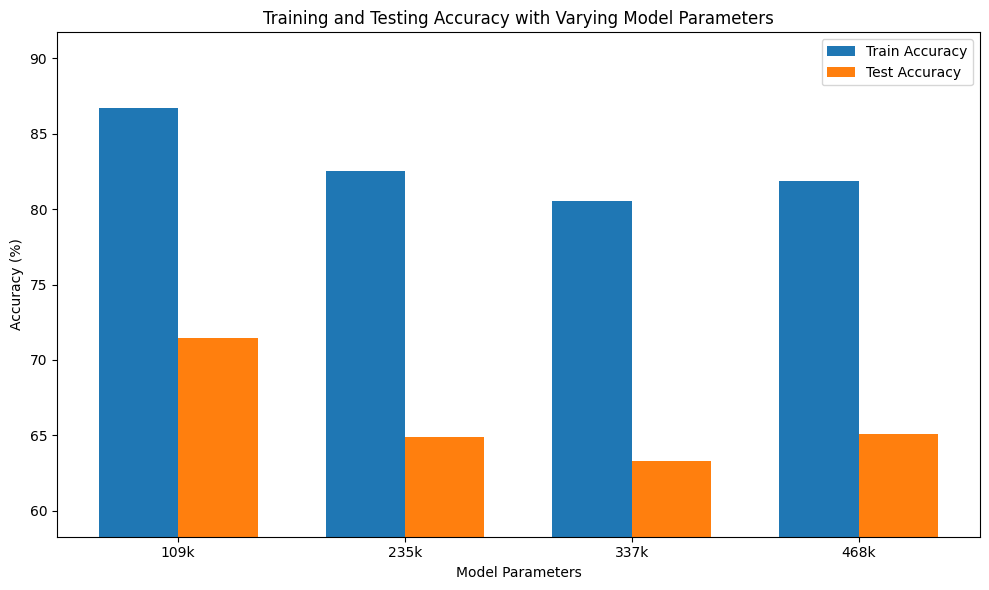

In [187]:
# Define model parameters
model_parameters = ['109k', '235k', '337k', '468k']

# Define training and testing accuracy
train_accuracy = [86.73, 82.56, 80.55, 81.88]
test_accuracy = [71.47, 64.89, 63.28, 65.07]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(model_parameters))

plt.bar(index, train_accuracy, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_accuracy, bar_width,label='Test Accuracy')

plt.xlabel('Model Parameters')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy with Varying Model Parameters')
plt.xticks(index + bar_width / 2, model_parameters)
plt.legend()

plt.ylim(min(min(train_accuracy), min(test_accuracy)) - 5, max(max(train_accuracy), max(test_accuracy)) + 5)

plt.tight_layout()
plt.show()


**Comparison of Different Types of Regularization on MLP**

| Model Type                      | Training Accuracy | Training F1 Score | Testing Accuracy | Testing F1 Score |
|---------------------------------|-------------------|-------------------|------------------|------------------|
| MLP                             | 86.35%            | 0.864             | 71.02%           | 0.712            |
| *L1 Regularized MLP*            | **90.33%**        | 0.904             | **74.14%**       | 0.744            |
| **L2 Regularized MLP**          | **91.90%**        | 0.920             | **74.51%**       | **0.751**        |
| Elastinet Regularized MLP       | **92.05%**        | **0.922**         | 74.12%           | 0.748            |


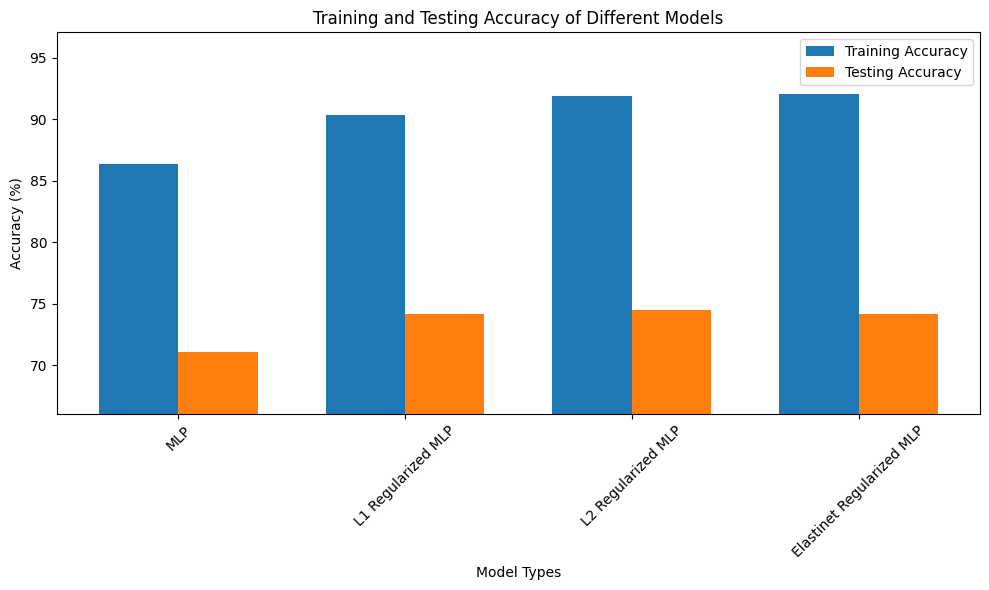

In [190]:
model_types = ['MLP', 'L1 Regularized MLP', 'L2 Regularized MLP', 'Elastinet Regularized MLP']

# Define training and testing accuracy
training_accuracy = [86.35, 90.33, 91.90, 92.05]
testing_accuracy = [71.02, 74.14, 74.51, 74.12]

# Plotting
plt.figure(figsize=(10, 6))

bar_width = 0.35
index = range(len(model_types))

plt.bar(index, training_accuracy, bar_width, label='Training Accuracy')
plt.bar([i + bar_width for i in index], testing_accuracy, bar_width,label='Testing Accuracy')

plt.xlabel('Model Types')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracy of Different Models')
plt.xticks([i + bar_width / 2 for i in index], model_types, rotation=45)
plt.legend()
plt.ylim(min(min(training_accuracy), min(testing_accuracy)) - 5, max(max(training_accuracy), max(testing_accuracy)) + 5)

plt.tight_layout()
plt.show()


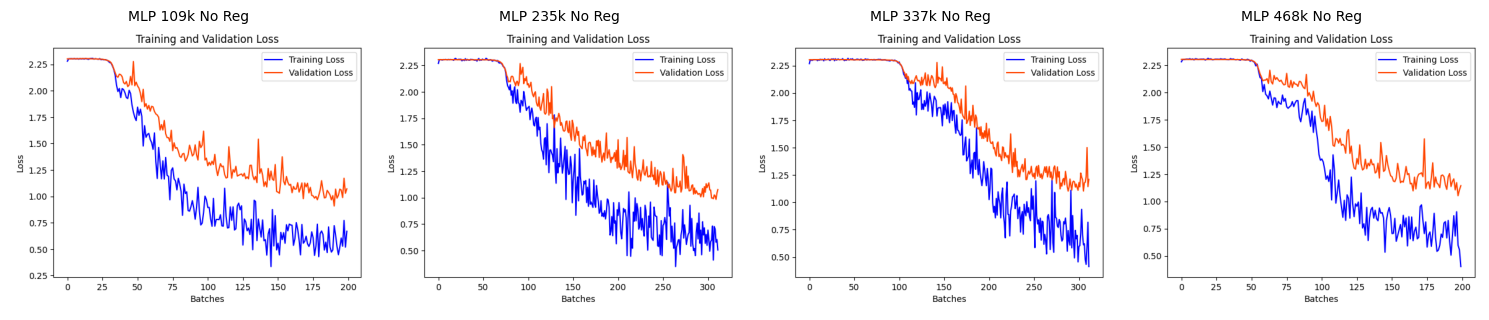

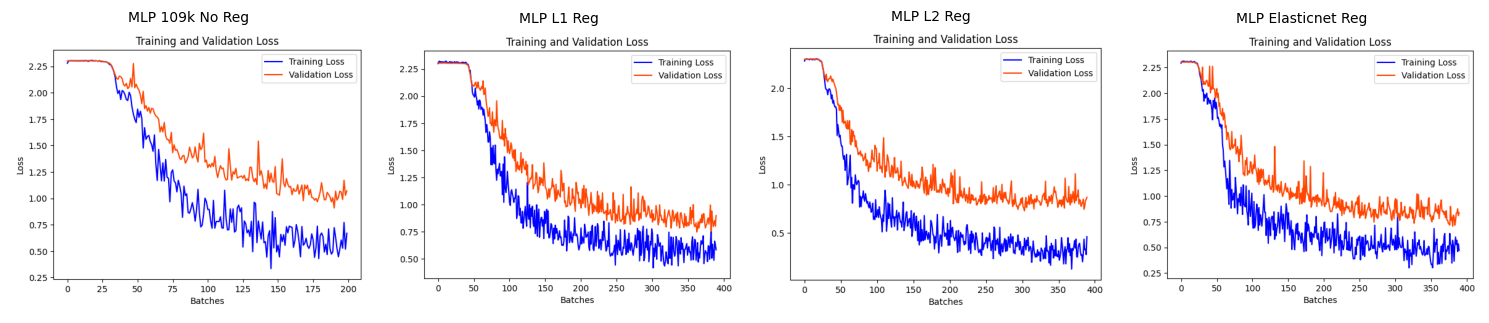

In [274]:
MLP_109k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/109k MLP no reg.png')
MLP_235k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/235k MLP no reg.png')
MLP_337k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/337k MLP no reg.png')
MLP_468k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/468k MLP no reg.png')

MLP_l1_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/MLP l1 reg.png')
MLP_l2_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/MLP l2 reg.png')
MLP_elasticnet_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/MLP/MLP elasticnet reg.png')

# Plot images
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(MLP_109k_no_reg)
plt.axis('off')
plt.title('MLP 109k No Reg', fontsize=10)

plt.subplot(1, 4, 2)
plt.imshow(MLP_235k_no_reg)
plt.axis('off')
plt.title('MLP 235k No Reg', fontsize=10)

plt.subplot(1, 4, 3)
plt.imshow(MLP_337k_no_reg)
plt.axis('off')
plt.title('MLP 337k No Reg', fontsize=10)

plt.subplot(1, 4, 4)
plt.imshow(MLP_468k_no_reg)
plt.axis('off')
plt.title('MLP 468k No Reg', fontsize=10)

plt.tight_layout()
plt.show()

# Plot images
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(MLP_109k_no_reg)
plt.axis('off')
plt.title('MLP 109k No Reg', fontsize=10)

plt.subplot(1, 4, 2)
plt.imshow(MLP_l1_reg)
plt.axis('off')
plt.title('MLP L1 Reg', fontsize=10)

plt.subplot(1, 4, 3)
plt.imshow(MLP_l2_reg)
plt.axis('off')
plt.title('MLP L2 Reg', fontsize=10)

plt.subplot(1, 4, 4)
plt.imshow(MLP_elasticnet_reg)
plt.axis('off')
plt.title('MLP Elasticnet Reg', fontsize=10)

plt.tight_layout()
plt.show()


#### **CNN**

##### **No Regularization**

In [210]:
# Train
TRAIN_SIZE = 5000

train_x = X_train[:TRAIN_SIZE].copy()
train_y = y_train[:TRAIN_SIZE].copy()

# Validation
VALIDATION_SIZE = 64

validation_x = X_test[:VALIDATION_SIZE].copy()
validation_y = y_test[:VALIDATION_SIZE].copy()

# Test

TEST_SIZE = 1000

test_x = X_test[:TEST_SIZE].copy()
test_y = y_test[:TEST_SIZE].copy()

###### **Training**

In [ ]:
network_no_reg  = [
    Conv(input_shape = (28,28), num_filters = 8, kernel_size = 5, padding = 'valid', stride = 1),
    LeakyReLU()
    Dense(24*24*8,16),
    LeakyReLU()
    Dense_Softmax(16,10)
]

# Instantiate the Model object
CNN_no_reg = Model(network_no_reg)

CNN_no_reg.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (24, 24)
  Number of Filters: 8
  Filter Shape : (5, 5)
  Trainable Parameters: 200
Layer 2: Dense
  Input Shape: 4608
  Output Shape: 16
  Trainable Parameters: 73744
Layer 3: Dense_Softmax
  Input Shape: 16
  Output Shape: 10
  Trainable Parameters: 170
Total Trainable Parameters: 74114


In [ ]:
# Train the model
CNN_no_reg.fit(train_x, train_y, validation_x, validation_y, epochs=2, batch_size = 64, learning_rate = 0.005, loss_type = 'cross_entropy')

----EPOCH 1 ---
[Step 64] Training Loss 2.266 | Training Accuracy: 6.00% | Validation Accuracy : 18.75%
[Step 128] Training Loss 2.287 | Training Accuracy: 13.00% | Validation Accuracy : 28.12%
[Step 192] Training Loss 2.272 | Training Accuracy: 17.00% | Validation Accuracy : 23.44%
[Step 256] Training Loss 2.227 | Training Accuracy: 20.00% | Validation Accuracy : 39.06%
[Step 320] Training Loss 2.144 | Training Accuracy: 20.00% | Validation Accuracy : 12.50%
[Step 384] Training Loss 1.989 | Training Accuracy: 21.00% | Validation Accuracy : 39.06%
[Step 448] Training Loss 1.661 | Training Accuracy: 25.00% | Validation Accuracy : 48.44%
[Step 512] Training Loss 1.448 | Training Accuracy: 32.00% | Validation Accuracy : 37.50%
[Step 576] Training Loss 1.379 | Training Accuracy: 34.00% | Validation Accuracy : 39.06%
[Step 640] Training Loss 1.015 | Training Accuracy: 43.00% | Validation Accuracy : 37.50%
[Step 704] Training Loss 1.230 | Training Accuracy: 34.00% | Validation Accuracy : 45.

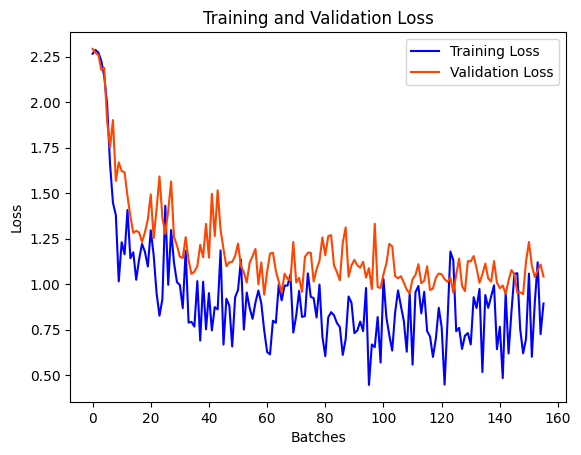

In [ ]:
# Plot the losses

plt.plot(CNN_no_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(CNN_no_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
CNN_no_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_no_reg_74k.pkl')

###### **Testing**

In [133]:
network = []

# Instantiate the Model object
CNN_loaded = Model(network)
CNN_loaded = CNN_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_no_reg_54k.pkl')

In [134]:
CNN_loaded.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [135]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(CNN_loaded.predict(im))

In [136]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(CNN_loaded.predict(im))

In [137]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of CNN on K-MNIST : 79.00 %
Training F1 Score of CNN on K-MNIST : 0.792
Testing Accuracy of CNN on K-MNIST : 62.90 %
Testing F1 Score of CNN on K-MNIST : 0.630


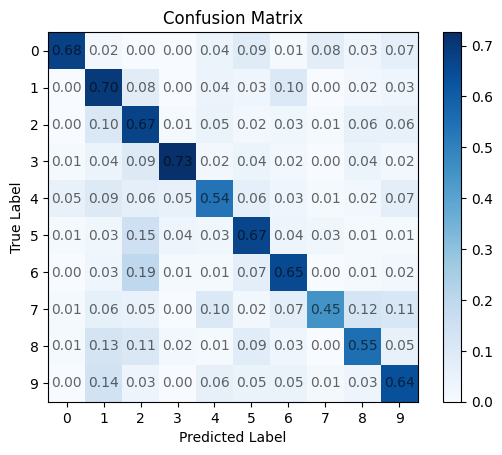

In [138]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

###### **MSE Loss**

In [211]:
network_no_reg  = [
    Conv(input_shape = (28,28), num_filters = 8, kernel_size = 3, padding = 'valid', stride = 1),
    LeakyReLU(),
    Dense(26*26*8,10)
]

# Instantiate the Model object
CNN_no_reg = Model(network_no_reg)

CNN_no_reg.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [212]:
# Train the model
CNN_no_reg.fit(train_x, train_y, validation_x, validation_y, epochs=2, batch_size = 64, learning_rate = 0.005, loss_type = 'mse')

----EPOCH 1 ---
[Step 64] Training Loss 0.095 | Training Accuracy: 28.12% | Validation Accuracy : 25.00%
[Step 128] Training Loss 0.079 | Training Accuracy: 42.19% | Validation Accuracy : 25.00%
[Step 192] Training Loss 0.070 | Training Accuracy: 54.69% | Validation Accuracy : 46.88%
[Step 256] Training Loss 0.070 | Training Accuracy: 50.00% | Validation Accuracy : 43.75%
[Step 320] Training Loss 0.065 | Training Accuracy: 62.50% | Validation Accuracy : 57.81%
[Step 384] Training Loss 0.061 | Training Accuracy: 65.62% | Validation Accuracy : 48.44%
[Step 448] Training Loss 0.062 | Training Accuracy: 67.19% | Validation Accuracy : 53.12%
[Step 512] Training Loss 0.062 | Training Accuracy: 64.06% | Validation Accuracy : 57.81%
[Step 576] Training Loss 0.053 | Training Accuracy: 78.12% | Validation Accuracy : 59.38%
[Step 640] Training Loss 0.055 | Training Accuracy: 75.00% | Validation Accuracy : 64.06%
[Step 704] Training Loss 0.056 | Training Accuracy: 71.88% | Validation Accuracy : 65

In [213]:
CNN_mse = CNN_no_reg

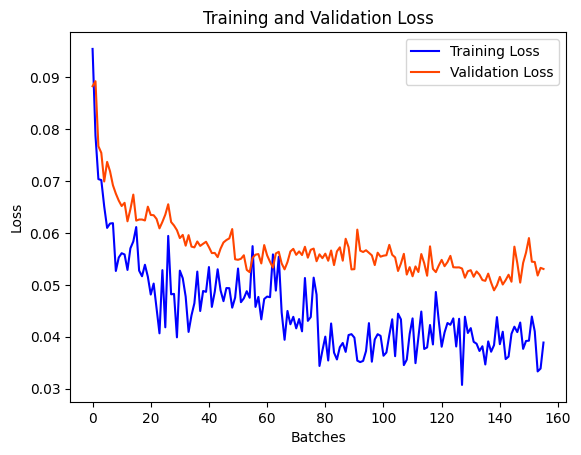

In [214]:
# Plot the losses

plt.plot(CNN_mse.Training_loss_list, 'b', label='Training Loss')
plt.plot(CNN_mse.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [215]:
CNN_mse.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_mse.pkl')

In [216]:
network = []

# Instantiate the Model object
CNN_loaded = Model(network)
CNN_loaded = CNN_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_mse.pkl')

In [217]:
CNN_loaded.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [218]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(CNN_loaded.predict(im))

In [219]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(CNN_loaded.predict(im))

In [220]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of CNN on K-MNIST : 91.98 %
Training F1 Score of CNN on K-MNIST : 0.920
Testing Accuracy of CNN on K-MNIST : 68.90 %
Testing F1 Score of CNN on K-MNIST : 0.689


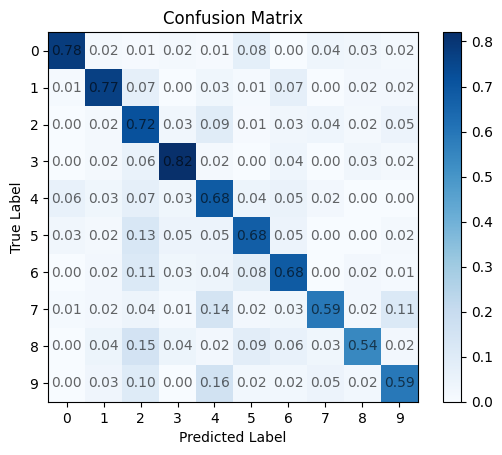

In [221]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **With Regularization**

In [ ]:
# Train
TRAIN_SIZE = 5000

train_x = X_train[:TRAIN_SIZE].copy()
train_y = y_train[:TRAIN_SIZE].copy()

# Validation
VALIDATION_SIZE = 64

validation_x = X_test[:VALIDATION_SIZE].copy()
validation_y = y_test[:VALIDATION_SIZE].copy()

# Test

TEST_SIZE = 5000

test_x = X_test[:TEST_SIZE].copy()
test_y = y_test[:TEST_SIZE].copy()

##### **$L_1$ Regularization**

###### **Training**

In [ ]:
network_l1_reg  = [
    	Conv(input_shape = (28,28), num_filters = 8, kernel_size = 3, padding = 'valid', stride = 1),
	    LeakyReLU(),
    	Dense_Softmax(26 * 26 * 8,10)
]
# Instantiate the Model object
CNN_l1_reg = Model(network_l1_reg)

CNN_l1_reg.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [ ]:
# Train the model
CNN_l1_reg.fit(train_x, train_y, validation_x, validation_y,epochs=3, batch_size = 64, learning_rate = 0.005, loss_type = 'cross_entropy', reg_type = 'l1', reg_strength = 0.001)

----EPOCH 1 ---
[Step 64] Training Loss 2.257 | Training Accuracy: 19.00% | Validation Accuracy : 31.25%
[Step 128] Training Loss 2.240 | Training Accuracy: 25.00% | Validation Accuracy : 23.44%
[Step 192] Training Loss 2.215 | Training Accuracy: 25.00% | Validation Accuracy : 21.88%
[Step 256] Training Loss 2.158 | Training Accuracy: 25.00% | Validation Accuracy : 32.81%
[Step 320] Training Loss 1.984 | Training Accuracy: 35.00% | Validation Accuracy : 40.62%
[Step 384] Training Loss 1.848 | Training Accuracy: 38.00% | Validation Accuracy : 45.31%
[Step 448] Training Loss 1.799 | Training Accuracy: 31.00% | Validation Accuracy : 34.38%
[Step 512] Training Loss 1.726 | Training Accuracy: 34.00% | Validation Accuracy : 37.50%
[Step 576] Training Loss 1.525 | Training Accuracy: 40.00% | Validation Accuracy : 39.06%
[Step 640] Training Loss 1.404 | Training Accuracy: 42.00% | Validation Accuracy : 42.19%
[Step 704] Training Loss 1.437 | Training Accuracy: 39.00% | Validation Accuracy : 42

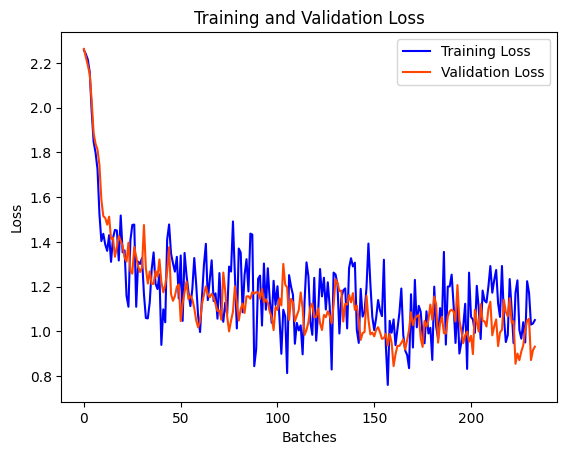

In [ ]:
# Plot the losses

plt.plot(CNN_l1_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(CNN_l1_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Save Model

CNN_l1_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_l1_reg.pkl')

###### **Testing**

In [140]:
network = []

# Instantiate the Model object
CNN_loaded = Model(network)
CNN_loaded = CNN_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_l1_reg.pkl')

In [141]:
CNN_loaded.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [142]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(CNN_loaded.predict(im))

In [143]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(CNN_loaded.predict(im))

In [144]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L1 Regularized CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of L1 Regularized CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of L1 Regularized CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of L1 Regularized CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of L1 Regularized CNN on K-MNIST : 83.20 %
Training F1 Score of L1 Regularized CNN on K-MNIST : 0.833
Testing Accuracy of L1 Regularized CNN on K-MNIST : 63.40 %
Testing F1 Score of L1 Regularized CNN on K-MNIST : 0.633


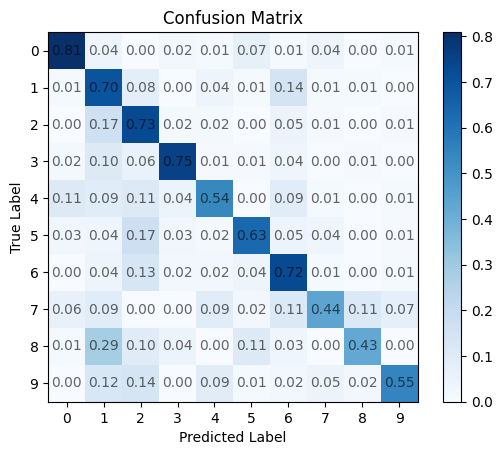

In [145]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **$L_2$ Regularization**

###### **Training**

In [147]:
network_l2_reg  = [
    Conv(input_shape = (28,28), num_filters = 8, kernel_size = 3, padding = 'valid', stride = 1),
    Dense_Softmax(26 * 26 * 8,10)
]

# Instantiate the Model object
CNN_l2_reg = Model(network_l2_reg)

CNN_l2_reg.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [148]:
# Train the model
CNN_l2_reg.fit(train_x, train_y, validation_x, validation_y,epochs=3, batch_size = 64, learning_rate = 0.005, loss_type = 'cross_entropy', reg_type = 'l2', reg_strength = 0.001)

----EPOCH 1 ---
[Step 64] Training Loss 2.211 | Training Accuracy: 15.62% | Validation Accuracy : 15.62%
[Step 128] Training Loss 2.107 | Training Accuracy: 25.00% | Validation Accuracy : 40.62%
[Step 192] Training Loss 1.830 | Training Accuracy: 43.75% | Validation Accuracy : 31.25%
[Step 256] Training Loss 1.596 | Training Accuracy: 50.00% | Validation Accuracy : 45.31%
[Step 320] Training Loss 1.216 | Training Accuracy: 60.94% | Validation Accuracy : 34.38%
[Step 384] Training Loss 1.274 | Training Accuracy: 62.50% | Validation Accuracy : 48.44%
[Step 448] Training Loss 1.078 | Training Accuracy: 67.19% | Validation Accuracy : 45.31%
[Step 512] Training Loss 1.124 | Training Accuracy: 70.31% | Validation Accuracy : 56.25%
[Step 576] Training Loss 1.239 | Training Accuracy: 59.38% | Validation Accuracy : 40.62%
[Step 640] Training Loss 0.871 | Training Accuracy: 70.31% | Validation Accuracy : 60.94%
[Step 704] Training Loss 1.163 | Training Accuracy: 65.62% | Validation Accuracy : 45

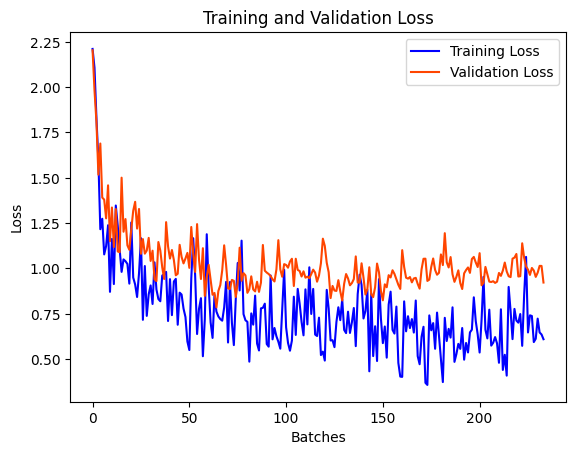

In [149]:
# Plot the losses

plt.plot(CNN_l2_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(CNN_l2_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [150]:
# Save Model

CNN_l2_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_l2_reg.pkl')

###### **Testing**

In [151]:
network = []

# Instantiate the Model object
CNN_loaded = Model(network)
CNN_loaded = CNN_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_l2_reg.pkl')

In [152]:
CNN_loaded.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [153]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(CNN_loaded.predict(im))

In [154]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(CNN_loaded.predict(im))

In [155]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of L2 Regularized CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of L2 Regularized CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of L2 Regularized CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of L2 Regularized CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of L2 Regularized CNN on K-MNIST : 84.90 %
Training F1 Score of L2 Regularized CNN on K-MNIST : 0.849
Testing Accuracy of L2 Regularized CNN on K-MNIST : 63.70 %
Testing F1 Score of L2 Regularized CNN on K-MNIST : 0.634


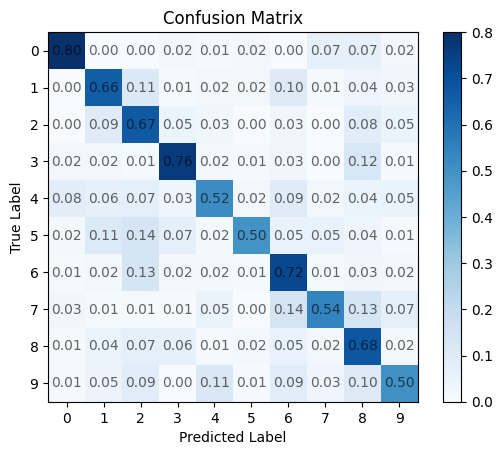

In [156]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **$Elasti Net$ Regularization**

###### **Training**

In [157]:
network_elastinet_reg  = [
    	Conv(input_shape = (28,28), num_filters = 8, kernel_size = 3, padding = 'valid', stride = 1),
	    LeakyReLU(),
    	Dense_Softmax(26 * 26 * 8,10)
]

# Instantiate the Model object
CNN_elastinet_reg = Model(network_elastinet_reg)

CNN_elastinet_reg.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [158]:
# Train the model
CNN_elastinet_reg.fit(train_x, train_y, validation_x, validation_y,epochs=3, batch_size = 64, learning_rate = 0.005, loss_type = 'cross_entropy')

----EPOCH 1 ---
[Step 64] Training Loss 2.256 | Training Accuracy: 14.06% | Validation Accuracy : 21.88%
[Step 128] Training Loss 2.190 | Training Accuracy: 25.00% | Validation Accuracy : 17.19%
[Step 192] Training Loss 1.956 | Training Accuracy: 35.94% | Validation Accuracy : 7.81%
[Step 256] Training Loss 1.900 | Training Accuracy: 34.38% | Validation Accuracy : 21.88%
[Step 320] Training Loss 1.609 | Training Accuracy: 46.88% | Validation Accuracy : 43.75%
[Step 384] Training Loss 1.692 | Training Accuracy: 51.56% | Validation Accuracy : 35.94%
[Step 448] Training Loss 1.523 | Training Accuracy: 54.69% | Validation Accuracy : 50.00%
[Step 512] Training Loss 1.294 | Training Accuracy: 59.38% | Validation Accuracy : 32.81%
[Step 576] Training Loss 1.108 | Training Accuracy: 64.06% | Validation Accuracy : 45.31%
[Step 704] Training Loss 1.212 | Training Accuracy: 53.12% | Validation Accuracy : 53.12%
[Step 768] Training Loss 1.079 | Training Accuracy: 64.06% | Validation Accuracy : 50.

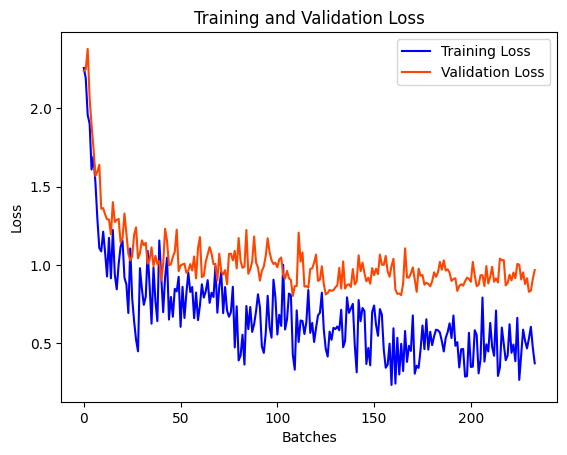

In [159]:
# Plot the losses

plt.plot(CNN_elastinet_reg.Training_loss_list, 'b', label='Training Loss')
plt.plot(CNN_elastinet_reg.Validation_loss_list, 'orangered', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Batches')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [160]:
# Save Model

CNN_elastinet_reg.save_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_elastinet_reg.pkl')

###### **Testing**

In [161]:
network = []

# Instantiate the Model object
CNN_loaded = Model(network)
CNN_loaded = CNN_loaded.load_model('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/CNN/CNN_elastinet_reg.pkl')

In [162]:
CNN_loaded.summary()

Model Summary:
Layer 1: Conv
  Input Shape: (28, 28)
  Output Shape: (26, 26)
  Number of Filters: 8
  Filter Shape : (3, 3)
  Trainable Parameters: 72
Layer 2: LeakyReLU
  Input Shape: None
  Output Shape: None
Layer 3: Dense_Softmax
  Input Shape: 5408
  Output Shape: 10
  Trainable Parameters: 54090
Total Trainable Parameters: 54162


In [163]:
# Training Accuracy

loss = 0
num_correct = 0
y_pred_train = []
for im in train_x:
    y_pred_train.append(CNN_loaded.predict(im))

In [164]:
# Testing Accuracy

loss = 0
num_correct = 0
y_pred_test = []
for im in test_x:
    y_pred_test.append(CNN_loaded.predict(im))

In [165]:
y_pred_train = np.array(y_pred_train)
y_pred_test = np.array(y_pred_test)

print(f'Training Accuracy of Elasicnet Regularized CNN on K-MNIST : {accuracy(y_pred_train, train_y)*100:.2f} %')
print(f'Training F1 Score of Elasicnet Regularized CNN on K-MNIST : {f1_score(y_pred_train, train_y):.3f}')

print(f'Testing Accuracy of Elasicnet Regularized CNN on K-MNIST : {accuracy(y_pred_test, test_y)*100:.2f} %')
print(f'Testing F1 Score of Elasicnet Regularized CNN on K-MNIST : {f1_score(y_pred_test, test_y):.3f}')

Training Accuracy of Elasicnet Regularized CNN on K-MNIST : 88.02 %
Training F1 Score of Elasicnet Regularized CNN on K-MNIST : 0.885
Testing Accuracy of Elasicnet Regularized CNN on K-MNIST : 66.20 %
Testing F1 Score of Elasicnet Regularized CNN on K-MNIST : 0.671


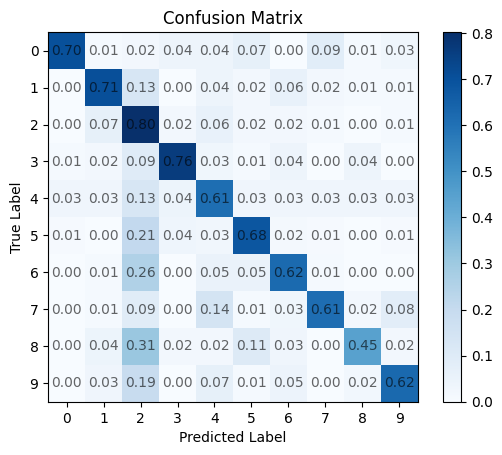

In [166]:
confusion_matrix_heatmap(confusion_matrix(test_y, y_pred_test))

##### **Results**

**Performance of CNN with Varying Parameters**

| Parameters | Train Accuracy | Train F1 Score | Test Accuracy | Test F1 Score |
|------------|----------------|----------------|---------------|---------------|
| 74k        | 78.70%         | 0.790          | 60.48%        | 0.612         |
| _**54k**_        | **79.30%**     | 0.799          | **62.90%**    | 0.639         |
| 46k        | 76.00%         | 0.765          | 60.30%        | 0.606         |
| 23k        | 71.98%         | 0.722          | 53.94%        | 0.539         |


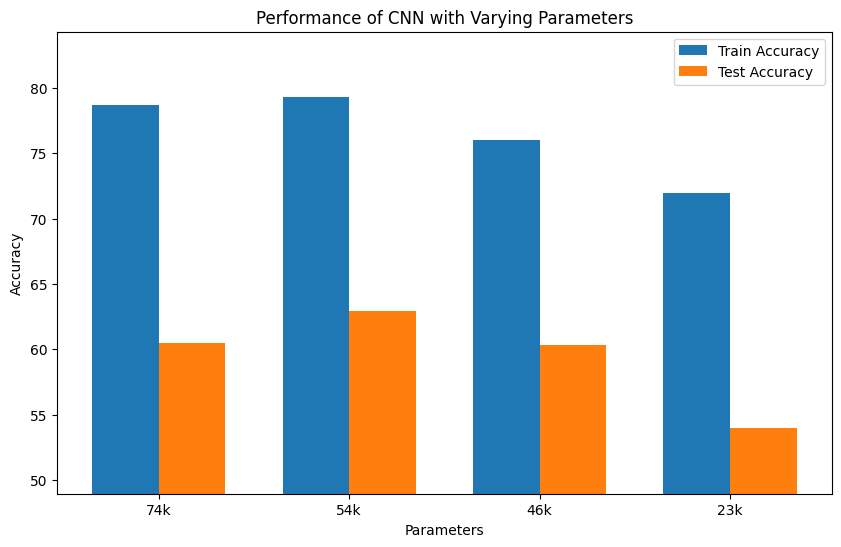

In [185]:
parameters = ['74k', '54k', '46k', '23k']
train_accuracy = [78.70, 79.30, 76.00, 71.98]
test_accuracy = [60.48, 62.90, 60.30, 53.94]

bar_width = 0.35
index = np.arange(len(parameters))

plt.figure(figsize=(10, 6))

plt.bar(index, train_accuracy, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy')

plt.xlabel('Parameters')
plt.ylabel('Accuracy')
plt.title('Performance of CNN with Varying Parameters')
plt.xticks(index + bar_width / 2, parameters)
plt.legend()

plt.ylim(min(min(train_accuracy), min(test_accuracy)) - 5, max(max(train_accuracy), max(test_accuracy)) + 5)

plt.show()


**Performance of CNN with Different Regularizations**

| Model                           | Train Accuracy | Train F1 Score | Test Accuracy | Test F1 Score |
|---------------------------------|----------------|----------------|---------------|---------------|
| CNN                             | 79.00%         | 0.792          | 62.90%        | 0.630         |
| *L1 Regularized CNN*            | *83.20%*       | *0.833*        | 63.40%        | 0.633         |
| **L2 Regularized CNN**          | **84.90%**     | **0.849**      | 63.70%        | 0.634         |
| ***ElasticNet Regularized CNN***| ***88.02%***   | ***0.885***    | ***66.20%***  | ***0.671***   |


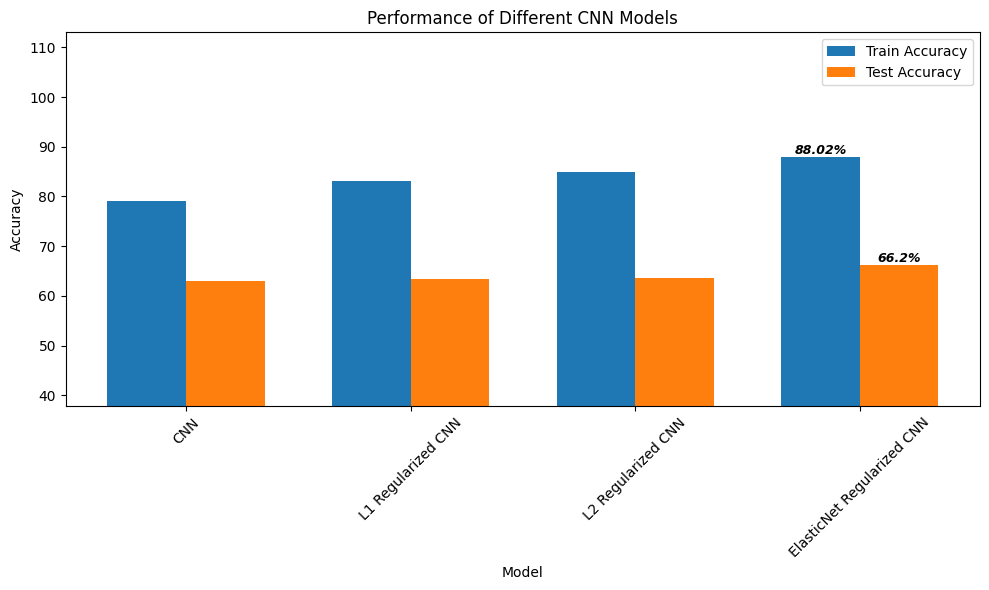

In [181]:
models = ['CNN', 'L1 Regularized CNN', 'L2 Regularized CNN', 'ElasticNet Regularized CNN']
train_accuracy = [79.00, 83.20, 84.90, 88.02]
test_accuracy = [62.90, 63.40, 63.70, 66.20]

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(models))

plt.bar(index, train_accuracy, bar_width, label='Train Accuracy')
plt.bar(index + bar_width, test_accuracy, bar_width, label='Test Accuracy')

for i, (train_acc, test_acc) in enumerate(zip(train_accuracy, test_accuracy)):
    if train_acc == max(train_accuracy):
        plt.text(i, train_acc, f'{train_acc}%', fontsize=9, ha='center', va='bottom', fontweight='bold', fontstyle='italic')
    if test_acc == max(test_accuracy):
        plt.text(i + bar_width, test_acc, f'{test_acc}%', fontsize=9, ha='center', va='bottom', fontweight='bold', fontstyle='italic')

plt.title('Performance of Different CNN Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(index + bar_width / 2, models, rotation=45)
plt.legend()

# Adjusting y-axis limits
plt.ylim(min(min(train_accuracy), min(test_accuracy)) - 25, max(max(train_accuracy), max(test_accuracy)) + 25)

plt.tight_layout()
plt.show()


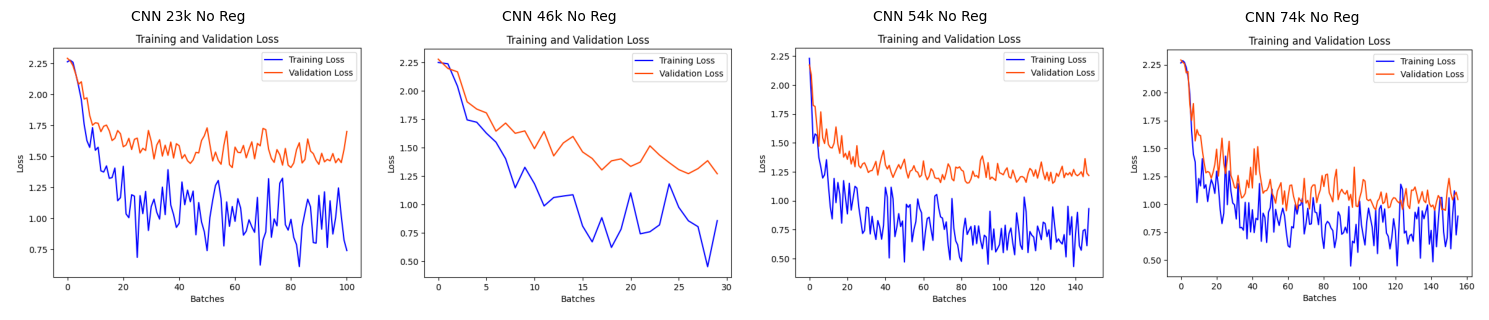

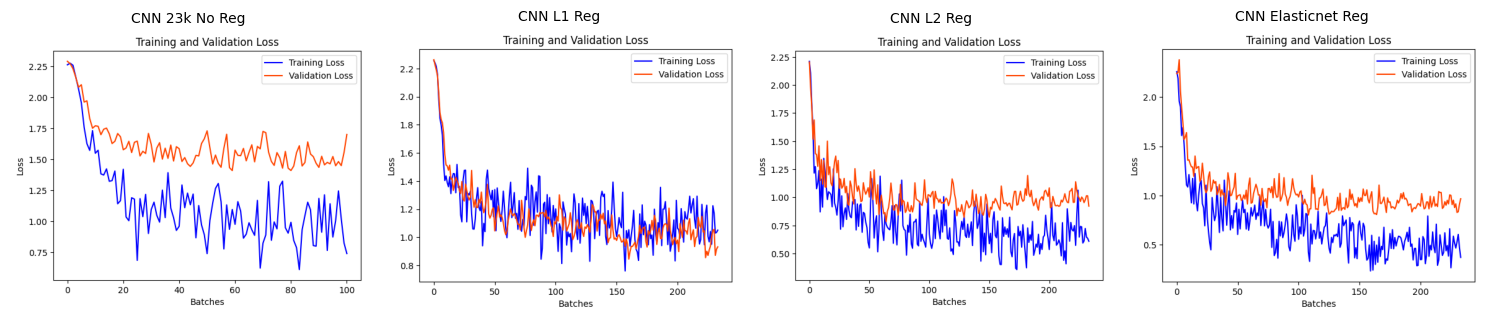

In [275]:
CNN_23k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/23k no reg CNN.png')
CNN_46k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/46k no reg CNN.png')
CNN_54k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/54k no reg CNN.png')
CNN_74k_no_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/74k no reg CNN.png')

CNN_l1_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/l1 reg CNN.png')
CNN_l2_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/l2 reg CNN.png')
CNN_elasticnet_reg = mpimg.imread('/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Images/CNN/elasticnet reg CNN.png')

# Plot images
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(CNN_23k_no_reg)
plt.axis('off')
plt.title('CNN 23k No Reg', fontsize=10)

plt.subplot(1, 4, 2)
plt.imshow(CNN_46k_no_reg)
plt.axis('off')
plt.title('CNN 46k No Reg', fontsize=10)

plt.subplot(1, 4, 3)
plt.imshow(CNN_54k_no_reg)
plt.axis('off')
plt.title('CNN 54k No Reg', fontsize=10)

plt.subplot(1, 4, 4)
plt.imshow(CNN_74k_no_reg)
plt.axis('off')
plt.title('CNN 74k No Reg', fontsize=10)

plt.tight_layout()
plt.show()

# Plot images
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.imshow(CNN_23k_no_reg)
plt.axis('off')
plt.title('CNN 23k No Reg', fontsize=10)

plt.subplot(1, 4, 2)
plt.imshow(CNN_l1_reg)
plt.axis('off')
plt.title('CNN L1 Reg', fontsize=10)

plt.subplot(1, 4, 3)
plt.imshow(CNN_l2_reg)
plt.axis('off')
plt.title('CNN L2 Reg', fontsize=10)

plt.subplot(1, 4, 4)
plt.imshow(CNN_elasticnet_reg)
plt.axis('off')
plt.title('CNN Elasticnet Reg', fontsize=10)

plt.tight_layout()
plt.show()


# **SVM Using QP Solver**

## Binary DataSet

### Dataset:

In [ ]:
Binary_classification_path = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_01/Data/binary_classification/multi_class_classification_data_group_24_train.txt'

Binary_classification_Dataset = generate_dataset(Binary_classification_path)

# Shuffle the dataset
np.random.shuffle(Binary_classification_Dataset)

In [ ]:
Binary_classification_X = Binary_classification_Dataset[:,:10]
Binary_classification_y = Binary_classification_Dataset[:,-1].astype(int)

print(f'Dataset : number of samples = {Binary_classification_X.shape[0]}, number of features = {Binary_classification_X.shape[1]}')
print(f'Dataset : number of labels = {len(Binary_classification_y)}')

Dataset : number of samples = 14000, number of features = 10
Dataset : number of labels = 14000


#### **Option 1 : Normalized and Standardized Dataset**:

In [ ]:
def normalize(X):
    col_max = np.max(X, axis=0)
    col_min = np.min(X, axis=0)
    col_range = col_max - col_min
    X_norm = (2 * ((X - col_min) / col_range)) - 1
    return X_norm, col_min, col_range

def inverse_normalize(X_norm, col_min, col_range):
    X = (X_norm + 1) / 2 * col_range + col_min
    return X

def standardize(X):
    # Calculate the mean and standard deviation for each feature (column)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Replace zero standard deviations with a small value to avoid division by zero
    stds[stds == 0] = 1e-8

    # Subtract the mean and divide by the standard deviation
    X_standardized = (X - means) / stds

    return X_standardized

In [ ]:
# Standardization
Binary_classification_X_norm = standardize(Binary_classification_X)



# Spliting into training, validation and testing data :

# Defining Ratio
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

n = Binary_classification_X_norm.shape[0]

# Defining size
train_size = int(train_ratio*n)
validation_size = int(validation_ratio*n)

# Features:
X_train_Binary = Binary_classification_X_norm[:train_size,:].copy()
X_validation_Binary = Binary_classification_X_norm[train_size : train_size + validation_size,:].copy()
X_test_Binary = Binary_classification_X_norm[train_size + validation_size:, :].copy()

# Labels:
Y_train_Binary = Binary_classification_y[:train_size].copy()#.ravel()
Y_validation_Binary = Binary_classification_y[train_size : train_size + validation_size].copy()
Y_test_Binary = Binary_classification_y[train_size + validation_size:].copy()


Y_train_Binary = np.where(Y_train_Binary==0, -1, Y_train_Binary)
Y_validation_Binary = np.where(Y_validation_Binary==0, -1, Y_validation_Binary)
Y_test_Binary = np.where(Y_test_Binary==0, -1, Y_test_Binary)

print(X_train_Binary.shape)
print(X_test_Binary.shape)
print(X_validation_Binary.shape)
print(Y_validation_Binary.shape)
print(Y_train_Binary.shape)
print(Y_test_Binary.shape)

(8400, 10)
(2800, 10)
(2800, 10)
(2800,)
(8400,)
(2800,)


#### **Option 2 : Normal Dataset**:

In [ ]:
# Spliting into training, validation and testing data :

# Defining Ratio
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

n = Binary_classification_X.shape[0]

# Defining size
train_size = int(0.7*n)
validation_size = int(0.15*n)

# Features:
X_train_Binary = Binary_classification_X[:train_size,:].copy()
X_validation_Binary = Binary_classification_X[train_size : train_size + validation_size,:].copy()
X_test_Binary = Binary_classification_X[train_size + validation_size:, :].copy()

# Labels:
Y_train_Binary = Binary_classification_y[:train_size].copy()#.ravel()
Y_validation_Binary = Binary_classification_y[train_size : train_size + validation_size].copy()
Y_test_Binary = Binary_classification_y[train_size + validation_size:].copy()


Y_train_Binary = np.where(Y_train_Binary==0, -1, Y_train_Binary)
Y_validation_Binary = np.where(Y_validation_Binary==0, -1, Y_validation_Binary)
Y_test_Binary = np.where(Y_test_Binary==0, -1, Y_test_Binary)

print(X_train_Binary.shape)
print(X_test_Binary.shape)
print(X_validation_Binary.shape)
print(Y_validation_Binary.shape)
print(Y_train_Binary.shape)
print(Y_test_Binary.shape)

### Kernels and auxillary functions:

#### **Kernels**:

In [ ]:
def kernel(X, Y, kernel_type='rbf',gamma = None,degree = None,kappa = None):
  if kernel_type == 'linear':
      return np.dot(X, Y.T)

  elif kernel_type == 'rbf':
    if gamma == None:
      gamma = 1 / X.shape[1]  # Default value for gamma
    sq_dists = -gamma * np.sum((X[:, np.newaxis] - Y[np.newaxis, :]) ** 2, axis=-1)
    return np.exp(sq_dists)

  elif kernel_type == 'poly':
    if degree == None:
      degree = 3  # Default value
    coef_poly = 1 # Default value
    return (np.dot(X, Y.T) + coef_poly) ** degree

  elif kernel_type == 'sigmoid':
    if kappa == None:
      kappa = 1 / X.shape[1]  # Default value
    coef_sig = 0  # Default value
    return np.tanh(kappa * np.dot(X, Y.T) + coef_sig)

In [ ]:
def predict(X_new, weight, bias):
    return np.sign(np.dot(X_new, weight) + bias).astype('int')
# def accuracy(y_pred,y_test):
#   return (np.sum(y_pred == y_test))/(len(y_test))

### Hard Margin SVM (Binary Dataset):

#### **Hard Margin SVM (Binary Dataset)**:

In [ ]:
def hard_svm_binary(X, y, kernel_type='rbf',gamma = None,degree = None,kappa = None):
    n_samples, n_features = X.shape

    K = kernel(X, X, kernel_type,gamma,degree,kappa)
    # Objective Function
    P = np.outer(y, y) * K
    q = -1 * np.ones(n_samples)

    # Inequality Constraints
    G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h = np.hstack((np.zeros(n_samples), np.ones(n_samples) * 1e4))

    # Equality Constraints
    A = y.astype('d').reshape(1,-1)
    b = np.array([0]).astype('d')

    alphas = solve_qp(P, q, G, h,A,b,solver='cvxopt') # Other options: 'cvxopt','ecos','osqp','scs'

    support_vectors = X[(alphas > 1e-5).flatten()]
    support_vector_labels = y[(alphas > 1e-5).flatten()]
    weight = np.sum((alphas[alphas > 1e-5] * support_vector_labels)[:, np.newaxis] * support_vectors, axis=0)
    bias = np.mean([y_k - np.dot(weight, x_k) for x_k, y_k in zip(support_vectors, support_vector_labels)])


    return alphas, weight, bias

#### **Finding Hyperparameters:**:

In [ ]:
# Applying Validation Check
limit = 500

x_train = X_train_Binary[:limit]
y_train = Y_train_Binary[:limit]

x_validate = X_validation_Binary[:limit]
y_validate = Y_validation_Binary[:limit]

# RBF Kernel
gamma_values = [0.001,0.02,0.04,0.1,1, 5]
#gamma_values = np.logspace(-7, 5, 12)
opt_gamma = 1
opt_accuracy = float('-inf')
for gamma_val in gamma_values:
  alphas, weight, bias = hard_svm_binary(x_train,y_train, kernel_type='rbf',gamma = gamma_val)
  y_pred = predict(x_validate,weight,bias)
  acc = accuracy(y_pred,y_validate)
  #print(f"For gamma: {gamma_val} , accuracy is {acc}")

  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_gamma = gamma_val

print(f"Optimal gamma is {opt_gamma}")

# Polynomial kernel
degree_values = np.linspace(1,5,5).astype('int')

opt_degree = 1
opt_accuracy = float('-inf')
for degree_val in degree_values:
  alphas, weight, bias = hard_svm_binary(x_train,y_train, kernel_type='poly',degree = degree_val)
  y_pred = predict(x_validate,weight,bias)
  acc = accuracy(y_pred,y_validate)
  #print(f"For gamma: {degree_val} , accuracy is {acc}")

  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_degree = degree_val
print(f"Optimal degree is {opt_degree}")


Optimal gamma is 1
Optimal degree is 2


#### **Evaluation:**

In [ ]:
# Linear kernel
limit = 4000
alphas_linear, weight_linear, bias_linear = hard_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], kernel_type='linear')
y_pred_linear = predict(X_test_Binary[:limit],weight_linear,bias_linear)
acc_linear = accuracy(y_pred_linear,Y_test_Binary[:limit])

print("Accuracy of data for linear kernel (without slack variables): ",acc_linear)

Accuracy of data for linear kernel (without slack variables):  0.7221428571428572


In [ ]:
# RBF kernel
limit = 4000
alphas_rbf, weight_rbf, bias_rbf = hard_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], kernel_type='rbf',gamma = opt_gamma)
y_pred_rbf = predict(X_test_Binary[:limit],weight_rbf,bias_rbf)
acc_rbf = accuracy(y_pred_rbf,Y_test_Binary[:limit])

print("Accuracy of data for RBF kernel (without slack variables): ",acc_rbf)


Accuracy of data for RBF kernel (without slack variables):  0.7207142857142858


In [ ]:
# Poly kernel
limit = 4000
alphas_poly, weight_poly, bias_poly = hard_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], kernel_type='poly',degree = opt_degree)
y_pred_poly = predict(X_test_Binary[:limit],weight_poly,bias_poly)
acc_poly = accuracy(y_pred_poly,Y_test_Binary[:limit])

print("Accuracy of data for Poly kernel (without slack variables): ",acc_poly)


Accuracy of data for Poly kernel (without slack variables):  0.7242857142857143


#### **Saved Models**

In [ ]:
# Define the common address
Address = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/'

# Save the linear model
model_params_linear = {
    'alphas': alphas_linear,
    'weight': weight_linear,
    'bias': bias_linear
}
np.save(Address + 'linear_hard_svm_binary_model.npy', model_params_linear)

# Save the RBF model
model_params_rbf = {
    'alphas': alphas_rbf,
    'weight': weight_rbf,
    'bias': bias_rbf
}
np.save(Address + 'rbf_hard_svm_binary_model.npy', model_params_rbf)

# Save the polynomial model
model_params_poly = {
    'alphas': alphas_poly,
    'weight': weight_poly,
    'bias': bias_poly
}
np.save(Address + 'poly_hard_svm_binary_model.npy', model_params_poly)

print("Models saved successfully!")

Models saved successfully!


#### **Load Models and Evaluate:**

In [ ]:
# Common address
Address = '/content/drive/MyDrive/E1 213 Pattern Recognition and Neural Networks Assignments/Assignment - 02/Models/SVM/'
limit = 4000
# Load the linear SVM model
linear_model = np.load(Address + 'linear_hard_svm_binary_model.npy', allow_pickle=True).item()
alphas_linear, weight_linear, bias_linear = linear_model['alphas'], linear_model['weight'], linear_model['bias']

# Load the RBF SVM model
rbf_model = np.load(Address + 'rbf_hard_svm_binary_model.npy', allow_pickle=True).item()
alphas_rbf, weight_rbf, bias_rbf = rbf_model['alphas'], rbf_model['weight'], rbf_model['bias']

# Load the polynomial SVM model
poly_model = np.load(Address + 'poly_hard_svm_binary_model.npy', allow_pickle=True).item()
alphas_poly, weight_poly, bias_poly = poly_model['alphas'], poly_model['weight'], poly_model['bias']


# Predictions:
y_pred_linear = predict(X_test_Binary[:limit],weight_linear,bias_linear)
y_pred_rbf = predict(X_test_Binary[:limit],weight_rbf,bias_rbf)
y_pred_poly = predict(X_test_Binary[:limit],weight_poly,bias_poly)

acc_linear = accuracy(y_pred_linear,Y_test_Binary[:limit])
acc_rbf = accuracy(y_pred_rbf,Y_test_Binary[:limit])
acc_poly = accuracy(y_pred_poly,Y_test_Binary[:limit])

print("Accuracy of data for linear kernel (without slack variables): ",acc_linear)
print("Accuracy of data for RBF kernel (without slack variables): ",acc_rbf)
print("Accuracy of data for Poly kernel (without slack variables): ",acc_poly)

print("\n")
print(f'F1 Score (linear) : {f1_score(Y_test_Binary[:limit], y_pred_linear):.4f}')
print(f'F1 Score (rbf) : {f1_score(Y_test_Binary[:limit], y_pred_rbf):.4f}')
print(f'F1 Score (poly) : {f1_score(Y_test_Binary[:limit], y_pred_poly):.4f}')


Accuracy of data for linear kernel (without slack variables):  0.7121428571428572
Accuracy of data for RBF kernel (without slack variables):  0.7089285714285715
Accuracy of data for Poly kernel (without slack variables):  0.7096428571428571
F1 Score (linear) : 0.7142
F1 Score (rbf) : 0.7086
F1 Score (poly) : 0.7136


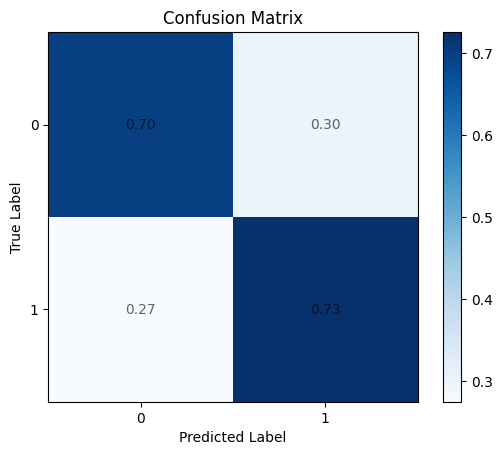

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_linear))

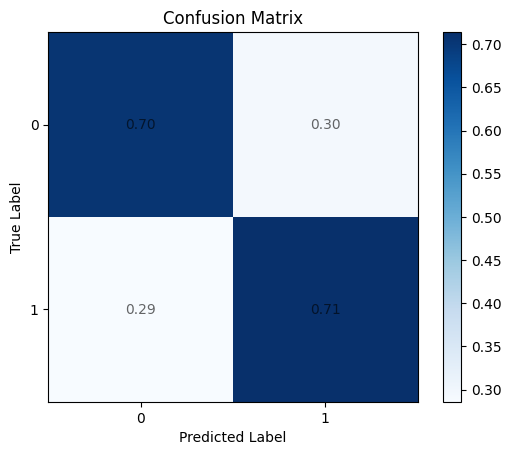

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_rbf))

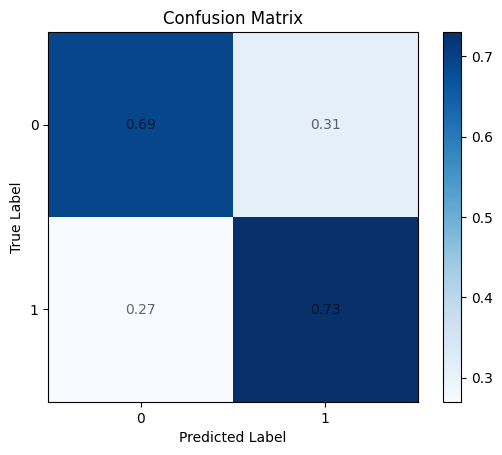

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_poly))

### Soft Margin SVM (Binary Dataset):

#### **Soft Margin SVM (Binary Dataset):**

In [ ]:
def soft_svm_binary(X, y, C = 1, kernel_type='rbf',gamma = None,degree = None,kappa = None):
    n_samples, n_features = X.shape
    K = kernel(X, X, kernel_type,gamma,degree,kappa)

    # Objective Function
    P = np.outer(y, y) * K
    q = -1 * np.ones(n_samples)
    # Inequality Constraint
    G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C))
    # Equality Constraint
    A = y.astype('d').reshape(1,-1)
    b = np.array([0]).astype('d')

    alphas = solve_qp(P, q, G, h,A,b,solver='cvxopt') # Other options: 'cvxopt','ecos','osqp','scs'

    # Calculate weight and bias
    support_vectors = X[(alphas > 1e-5).flatten()]
    support_vector_labels = y[(alphas > 1e-5).flatten()]
    weight = np.sum((alphas[alphas > 1e-5] * support_vector_labels)[:, np.newaxis] * support_vectors, axis=0)
    bias = np.mean([y_k - np.dot(weight, x_k) for x_k, y_k in zip(support_vectors, support_vector_labels)])

    return alphas, weight, bias

#### **Finding Hyperparameters:**

In [ ]:
# Applying Validation Check
limit = 500

x_train = X_train_Binary[:limit]
y_train = Y_train_Binary[:limit]

x_validate = X_validation_Binary[:limit]
y_validate = Y_validation_Binary[:limit]

C_values = [0.01,0.15, 0.5, 1, 1.5, 2.5,40]

# For Linear kernel
opt_C = 1
opt_accuracy = float('-inf')
for C_val in C_values:
  alphas, weight, bias = soft_svm_binary(x_train, y_train, C=C_val, kernel_type='linear')
  y_pred = predict(x_validate, weight, bias)
  acc = accuracy(y_pred, y_validate)
  #print(f" C value is {C_val}, corresponding accuracy is {acc}")
  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_C = C_val
opt_C_linear = opt_C
print(f"Optimal C is {opt_C} for Linear kernel")

# For RBF kernel
gamma_values = [0.001,0.02,0.04,0.1,1, 5]
#gamma_values = np.logspace(-7, 5, 12)
opt_C = 1
opt_gamma = 1/x_train.shape[1]
opt_accuracy = float('-inf')
for C_val in C_values:
  for gamma_val in gamma_values:
    alphas, weight, bias = soft_svm_binary(x_train, y_train, C=C_val, kernel_type='rbf', gamma=gamma_val)
    y_pred = predict(x_validate, weight, bias)
    acc = accuracy(y_pred, y_validate)
    #print(f" C value is {C_val},gamma value is {gamma_val}, corresponding accuracy is {acc}")
    if acc > opt_accuracy:
      opt_accuracy = acc
      opt_gamma = gamma_val
      opt_C = C_val
opt_C_rbf = opt_C
print(f"Optimal C is {opt_C_rbf} and optimal gamma is {opt_gamma} for RBF kernel")

# For Poly kernel
degree_values = np.linspace(1,5,5).astype('int')

opt_C = 1
opt_degree = 1
opt_accuracy = float('-inf')
for C_val in C_values:
  for degree_val in degree_values:
    alphas, weight, bias = soft_svm_binary(x_train, y_train, C=C_val, kernel_type='poly', degree=degree_val)
    y_pred = predict(x_validate, weight, bias)
    acc = accuracy(y_pred, y_validate)
    #print(f"C value is {C_val},degree value is {degree_val}, corresponding accuracy is {acc}")
    if acc > opt_accuracy:
      opt_accuracy = acc
      opt_degree = degree_val
      opt_C = C_val
opt_C_poly = opt_C
print(f"Optimal C is {opt_C_poly} and optimal degree is {opt_degree} for Poly kernel")


Optimal C is 0.01 for Linear kernel
Optimal C is 0.01 and optimal gamma is 0.1 for RBF kernel
Optimal C is 0.01 and optimal degree is 2 for Poly kernel


#### **Evaluation:**

In [ ]:
# Linear kernel
limit = 4000
alphas_linear, weight_linear, bias_linear = soft_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], C = opt_C_linear, kernel_type='linear')
y_pred_linear = predict(X_test_Binary[:limit],weight_linear,bias_linear)
acc_linear = accuracy(y_pred_linear,Y_test_Binary[:limit])

print("Accuracy of data for linear kernel (with slack variables): ",acc_linear)

Accuracy of data for linear kernel (with slack variables):  0.7225


In [ ]:
# RBF kernel
limit = 4000
alphas_rbf, weight_rbf, bias_rbf = soft_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], C = opt_C_rbf, kernel_type='rbf',gamma = opt_gamma)
y_pred_rbf = predict(X_test_Binary[:limit],weight_rbf,bias_rbf)
acc_rbf = accuracy(y_pred_rbf,Y_test_Binary[:limit])

print("Accuracy of data for RBF kernel (with slack variables): ",acc_rbf)

Accuracy of data for RBF kernel (with slack variables):  0.7271428571428571


In [ ]:
# Poly kernel
limit = 4000
alphas_poly, weight_poly, bias_poly = soft_svm_binary(X_train_Binary[:limit],Y_train_Binary[:limit], C = opt_C_poly, kernel_type='poly',degree = opt_degree)
y_pred_poly = predict(X_test_Binary[:limit],weight_poly,bias_poly)
acc_poly = accuracy(y_pred_poly,Y_test_Binary[:limit])

print("Accuracy of data for Poly kernel (with slack variables): ",acc_poly)

Accuracy of data for Poly kernel (with slack variables):  0.7239285714285715


#### **Saved Models**:

In [ ]:
# Define the common address
Address = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/'

# Save the linear model
model_params_linear = {
    'alphas': alphas_linear,
    'weight': weight_linear,
    'bias': bias_linear
}
np.save(Address + 'linear_soft_svm_binary_model.npy', model_params_linear)

# Save the RBF model
model_params_rbf = {
    'alphas': alphas_rbf,
    'weight': weight_rbf,
    'bias': bias_rbf
}
np.save(Address + 'rbf_soft_svm_binary_model.npy', model_params_rbf)

# Save the polynomial model
model_params_poly = {
    'alphas': alphas_poly,
    'weight': weight_poly,
    'bias': bias_poly
}
np.save(Address + 'poly_soft_svm_binary_model.npy', model_params_poly)

print("Models saved successfully!")

Models saved successfully!


#### **Load Models and Evaluate:**

In [ ]:
# Load the linear SVM model
linear_model = np.load(Address + 'linear_soft_svm_binary_model.npy', allow_pickle=True).item()
alphas_linear, weight_linear, bias_linear = linear_model['alphas'], linear_model['weight'], linear_model['bias']

# Load the RBF SVM model
rbf_model = np.load(Address + 'rbf_soft_svm_binary_model.npy', allow_pickle=True).item()
alphas_rbf, weight_rbf, bias_rbf = rbf_model['alphas'], rbf_model['weight'], rbf_model['bias']

# Load the polynomial SVM model
poly_model = np.load(Address + 'poly_soft_svm_binary_model.npy', allow_pickle=True).item()
alphas_poly, weight_poly, bias_poly = poly_model['alphas'], poly_model['weight'], poly_model['bias']


y_pred_linear = predict(X_test_Binary[:limit],weight_linear,bias_linear)
y_pred_rbf = predict(X_test_Binary[:limit],weight_rbf,bias_rbf)
y_pred_poly = predict(X_test_Binary[:limit],weight_poly,bias_poly)


acc_linear = accuracy(y_pred_linear,Y_test_Binary[:limit])
acc_rbf = accuracy(y_pred_rbf,Y_test_Binary[:limit])
acc_poly = accuracy(y_pred_poly,Y_test_Binary[:limit])

print("Accuracy of data for linear kernel (with slack variables): ",acc_linear)
print("Accuracy of data for RBF kernel (with slack variables): ",acc_rbf)
print("Accuracy of data for Poly kernel (with slack variables): ",acc_poly)
print("\n")
print(f'F1 Score (linear) : {f1_score(Y_test_Binary[:limit], y_pred_linear):.4f}')
print(f'F1 Score (rbf) : {f1_score(Y_test_Binary[:limit], y_pred_rbf):.4f}')
print(f'F1 Score (poly) : {f1_score(Y_test_Binary[:limit], y_pred_poly):.4f}')


Accuracy of data for linear kernel (with slack variables):  0.7114285714285714
Accuracy of data for RBF kernel (with slack variables):  0.7117857142857142
Accuracy of data for Poly kernel (with slack variables):  0.7125


F1 Score (linear) : 0.7096
F1 Score (rbf) : 0.7115
F1 Score (poly) : 0.7103


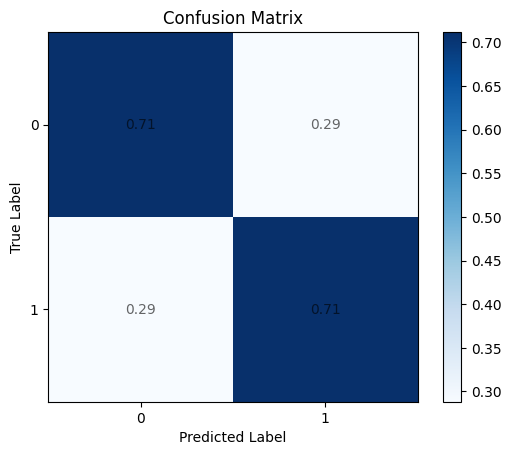

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_linear))

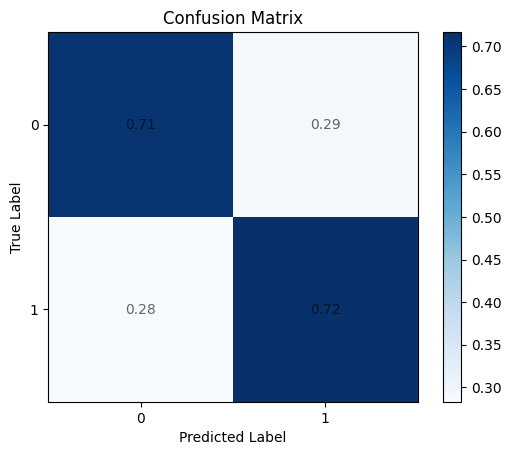

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_rbf))

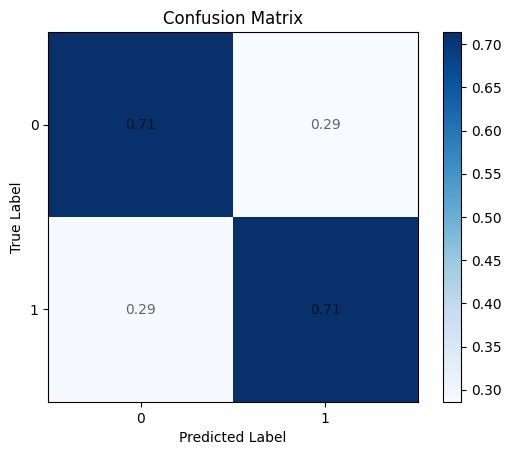

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Binary[:limit], y_pred_poly))

## Multiclass dataset:

### Dataset:

In [ ]:
# Create Dataset (Example Usage)

Classification_Multiclass_path = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_01/Data/multi_class_classification/multi_class_classification_data_group_24_train.txt'

Classification_Multiclass_Dataset = generate_dataset(Classification_Multiclass_path)

In [ ]:
n_features = 25 # Given

Multiclass_classification_X = Classification_Multiclass_Dataset[:,:n_features]
Multiclass_classification_y = Classification_Multiclass_Dataset[:,n_features:]
N_Classes = np.unique(Multiclass_classification_y).shape[0]

print(f'Dataset : number of samples = {Multiclass_classification_X.shape[0]}, number of features = {Multiclass_classification_X.shape[1]}')
print(f'Dataset : number of samples = {Multiclass_classification_y.shape[0]}, Number of Classes = {N_Classes}')

Dataset : number of samples = 70000, number of features = 25
Dataset : number of samples = 70000, Number of Classes = 10


#### **Option 1: Normalized or standardized dataset:**

In [ ]:
def normalize(X):
    col_max = np.max(X, axis=0)
    col_min = np.min(X, axis=0)
    col_range = col_max - col_min
    X_norm = (2 * ((X - col_min) / col_range)) - 1
    return X_norm, col_min, col_range

def inverse_normalize(X_norm, col_min, col_range):
    X = (X_norm + 1) / 2 * col_range + col_min
    return X

def standardize(X):
    # Calculate the mean and standard deviation for each feature (column)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Replace zero standard deviations with a small value to avoid division by zero
    stds[stds == 0] = 1e-8

    # Subtract the mean and divide by the standard deviation
    X_standardized = (X - means) / stds

    return X_standardized

In [ ]:
# Normalization
Multiclass_classification_X_norm = standardize(Multiclass_classification_X)

# Spliting into training, validation and testing data :

# Defining Ratio
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

n = Multiclass_classification_X_norm.shape[0]

# Defining size
train_size = int(train_ratio*n)
validation_size = int(validation_ratio*n)

# Features:
X_train_Multiclass = Multiclass_classification_X_norm[:train_size,:].copy()
X_validation_Multiclass = Multiclass_classification_X_norm[train_size : train_size + validation_size,:].copy()
X_test_Multiclass = Multiclass_classification_X_norm[train_size + validation_size:, :].copy()

# Labels:
Y_train_Multiclass = Multiclass_classification_y[:train_size].ravel().copy()#.ravel()
Y_validation_Multiclass = Multiclass_classification_y[train_size : train_size + validation_size].ravel().copy()
Y_test_Multiclass = Multiclass_classification_y[train_size + validation_size:].ravel().copy()

print(X_train_Multiclass.shape)
print(X_test_Multiclass.shape)
print(X_validation_Multiclass.shape)
print(Y_train_Multiclass.shape)
print(Y_validation_Multiclass.shape)
print(Y_test_Multiclass.shape)

(42000, 25)
(14000, 25)
(14000, 25)
(42000,)
(14000,)
(14000,)


#### **Option 2: Normal dataset:**

In [ ]:
# Spliting into training, validation and testing data :

# Defining Ratio
train_ratio = 0.6
validation_ratio = 0.2
test_ratio = 0.2

n = Multiclass_classification_X.shape[0]

# Defining size
train_size = int(train_ratio*n)
validation_size = int(validation_ratio*n)

# Features:
X_train_Multiclass = Multiclass_classification_X[:train_size,:].copy()
X_validation_Multiclass = Multiclass_classification_X[train_size : train_size + validation_size,:].copy()
X_test_Multiclass = Multiclass_classification_X[train_size + validation_size:, :].copy()

# Labels:
Y_train_Multiclass = Multiclass_classification_y[:train_size].astype('int').ravel().copy()
Y_validation_Multiclass = Multiclass_classification_y[train_size : train_size + validation_size].astype('int').ravel().copy()
Y_test_Multiclass = Multiclass_classification_y[train_size + validation_size:].astype('int').ravel().copy()

print(X_train_Multiclass.shape)
print(X_test_Multiclass.shape)
print(X_validation_Multiclass.shape)
print(Y_train_Multiclass.shape)
print(Y_validation_Multiclass.shape)
print(Y_test_Multiclass.shape)


### Hard Margin SVM (Multiclass Dataset):

#### **Hard Margin SVM (Multiclass Dataset):**

In [ ]:
def hard_svm_binary(X, y, kernel_type='rbf',gamma = None,degree = None,kappa = None):
    n_samples, n_features = X.shape

    K = kernel(X, X, kernel_type,gamma,degree,kappa)

    # Objective Function
    #P = np.outer(y, y) * K
    P = np.outer(y, y) * K + 0.1 * np.eye(n_samples)
    q = -1 * np.ones(n_samples)

    # Inequality Constraints
    G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h = np.hstack((np.zeros(n_samples), np.ones(n_samples) * 1e4))

    # Equality Constraints
    A = y.astype('d').reshape(1,-1)
    b = np.array([0]).astype('d')

    alphas = solve_qp(P, q, G, h,A,b,solver='cvxopt') # Other options: 'cvxopt','ecos','osqp','scs'

    support_vectors = X[(alphas > 1e-5).flatten()]
    support_vector_labels = y[(alphas > 1e-5).flatten()]
    support_alphas = alphas[alphas > 1e-5]
    weight = np.sum((support_alphas * support_vector_labels)[:, np.newaxis] * support_vectors, axis=0)
    bias = np.mean([y_k - np.dot(weight, x_k) for x_k, y_k in zip(support_vectors, support_vector_labels)])

    return support_alphas, weight, bias,support_vectors,support_vector_labels

In [ ]:
def hard_svm_Multiclass(X, y, kernel_type='rbf',gamma = None,degree = None,kappa = None):
    classes = np.unique(y)
    support_alpha_list = []
    weight_list = []
    bias_list = []
    sv_list = []
    svl_list = []
    for i,label in enumerate(classes):
      temp_binary = ((y.copy() == classes[i]).astype(int) * 2) - 1
      support_alpha_temp, weight_temp, bias_temp, sv_temp,svl_temp = hard_svm_binary(X,temp_binary,kernel_type = kernel_type,gamma = gamma,degree = degree,kappa = kappa)
      support_alpha_list.append(support_alpha_temp)
      weight_list.append(weight_temp)
      bias_list.append(bias_temp)
      sv_list.append(sv_temp)
      svl_list.append(svl_temp)

    return support_alpha_list,weight_list,bias_list,sv_list,svl_list

In [ ]:
def predict_multiclass(X_test,support_alpha_list,weight_list,bias_list,sv_list,svl_list, kernel_type='rbf', gamma=None, degree=None, kappa=None):
  n_classes = len(support_alpha_list)
  n_samples = X_test.shape[0]
  score_dataset = []

  for cls in range(n_classes):
    support_alpha = np.array(support_alpha_list[cls])
    weight = np.array(weight_list[cls])
    bias = np.array(bias_list[cls])
    support_vector = np.array(sv_list[cls])
    support_vector_label = np.array(svl_list[cls])

    k = kernel(support_vector,X_test, kernel_type = kernel_type, gamma = gamma, degree = degree, kappa = kappa)
    score = np.dot(support_alpha * support_vector_label,k) + bias
    score_dataset.append(score)

  score_dataset =  np.array(score_dataset)
  prediction = np.argmax(score_dataset, axis=0)
  return prediction


#### **Finding Hyperparameters:**

In [ ]:
# Applying Validation Check
limit = 500

x_train = X_train_Multiclass[:limit]
y_train = Y_train_Multiclass[:limit]

x_validate = X_validation_Multiclass[:limit]
y_validate = Y_validation_Multiclass[:limit]

# RBF kernel
gamma_values = [0.001,0.02,0.04,0.1,1, 5]
#gamma_values = [0.052310993080562605,0.07934096665797492,0.07401959996915641,0.08504489341802678,0.05607169938205458]
#gamma_values = np.logspace(-3, 2, 12)
opt_gamma = 1/x_train.shape[1]
opt_accuracy = float('-inf')
for gamma_val in gamma_values:
  support_alpha_list,weight_list,bias_list,sv_list,svl_list = hard_svm_Multiclass(x_train,y_train, kernel_type='rbf',gamma = gamma_val)
  y_pred = predict_multiclass(x_validate,support_alpha_list,weight_list,bias_list,sv_list,svl_list, kernel_type='rbf', gamma=gamma_val)
  acc = accuracy(y_pred,y_validate)
  #print(f" Gamma value is {gamma_val} corresponding accuracy is {acc}")
  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_gamma = gamma_val

print(f"Optimal gamma is {opt_gamma}")

# Polynomial kernel
degree_values = np.linspace(1,5,5).astype('int')

opt_degree = 1
opt_accuracy = float('-inf')
for degree_val in degree_values:
  support_alpha_list,weight_list,bias_list,sv_list,svl_list = hard_svm_Multiclass(x_train,y_train, kernel_type='poly',degree = degree_val)
  y_pred = predict_multiclass(x_validate,support_alpha_list,weight_list,bias_list,sv_list,svl_list, kernel_type='poly',degree = degree_val)
  acc = accuracy(y_pred,y_validate)
  #print(f" Degree value is {degree_val} corresponding accuracy is {acc}")
  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_degree = degree_val

print(f"Optimal degree is {opt_degree}")

Optimal gamma is 0.052310993080562605


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimal degree is 3


#### **Evaluation:**

In [ ]:
# Linear kernel
limit = 4000
support_alpha_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear = hard_svm_Multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], kernel_type='linear')
y_pred_linear = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear, kernel_type='linear')
acc_linear = accuracy(y_pred_linear, Y_test_Multiclass[:limit])
print("Accuracy of data for linear kernel (without slack variables):", acc_linear)


Accuracy of data for linear kernel (without slack variables): 0.2875


In [ ]:
# RBF kernel
limit = 4000
support_alpha_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf = hard_svm_Multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], kernel_type='rbf')
y_pred_rbf = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf, kernel_type='rbf')
acc_rbf = accuracy(y_pred_rbf, Y_test_Multiclass[:limit])
print("Accuracy of data for RBF kernel (without slack variables):", acc_rbf)


Accuracy of data for RBF kernel (without slack variables): 0.10325


In [ ]:
# Polynomial kernel
limit = 4000
support_alpha_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly = hard_svm_Multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], kernel_type='poly')
y_pred_poly = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly, kernel_type='poly')
acc_poly = accuracy(y_pred_poly, Y_test_Multiclass[:limit])
print("Accuracy of data for Polynomial kernel (without slack variables):", acc_poly)


Accuracy of data for Polynomial kernel (without slack variables): 0.34325


#### **Saved Model:**

In [ ]:
# Define the common address
Address = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/'

# Save the linear model
model_params_linear = {
    'support_alpha_list': support_alpha_list_linear,
    'weight_list': weight_list_linear,
    'bias_list': bias_list_linear,
    'sv_list': sv_list_linear,
    'svl_list': svl_list_linear
}
np.save(Address + 'linear_hard_svm_multiclass_model.npy', model_params_linear)

# Save the RBF model
model_params_rbf = {
    'support_alpha_list': support_alpha_list_rbf,
    'weight_list': weight_list_rbf,
    'bias_list': bias_list_rbf,
    'sv_list': sv_list_rbf,
    'svl_list': svl_list_rbf
}
np.save(Address + 'rbf_hard_svm_multiclass_model.npy', model_params_rbf)

# Save the polynomial model
model_params_poly = {
    'support_alpha_list': support_alpha_list_poly,
    'weight_list': weight_list_poly,
    'bias_list': bias_list_poly,
    'sv_list': sv_list_poly,
    'svl_list': svl_list_poly
}
np.save(Address + 'poly_hard_svm_multiclass_model.npy', model_params_poly)

#### **Load Models and Evaluate:**

In [ ]:
# Load the linear SVM model
linear_model = np.load(Address + 'linear_hard_svm_multiclass_model.npy', allow_pickle=True).item()
support_alpha_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear = linear_model['support_alpha_list'], linear_model['weight_list'], linear_model['bias_list'], linear_model['sv_list'], linear_model['svl_list']

# Load the RBF SVM model
rbf_model = np.load(Address + 'rbf_hard_svm_multiclass_model.npy', allow_pickle=True).item()
support_alpha_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf = rbf_model['support_alpha_list'], rbf_model['weight_list'], rbf_model['bias_list'], rbf_model['sv_list'], rbf_model['svl_list']

# Load the polynomial SVM model
poly_model = np.load(Address + 'poly_hard_svm_multiclass_model.npy', allow_pickle=True).item()
support_alpha_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly = poly_model['support_alpha_list'], poly_model['weight_list'], poly_model['bias_list'], poly_model['sv_list'], poly_model['svl_list']


y_pred_linear = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear, kernel_type='linear')
y_pred_rbf = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf, kernel_type='rbf')
y_pred_poly = predict_multiclass(X_test_Multiclass[:limit], support_alpha_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly, kernel_type='poly')



acc_linear = accuracy(y_pred_linear, Y_test_Multiclass[:limit])
acc_rbf = accuracy(y_pred_rbf, Y_test_Multiclass[:limit])
acc_poly = accuracy(y_pred_poly, Y_test_Multiclass[:limit])


print("Accuracy of data for linear kernel (without slack variables):", acc_linear)
print("Accuracy of data for RBF kernel (without slack variables):", acc_rbf)
print("Accuracy of data for Polynomial kernel (without slack variables):", acc_poly)
print("\n")
print(f'F1 Score (linear) : {f1_score(Y_test_Multiclass[:limit], y_pred_linear):.4f}')
print(f'F1 Score (poly) : {f1_score(Y_test_Multiclass[:limit], y_pred_poly):.4f}')


Accuracy of data for linear kernel (without slack variables): 0.2875
Accuracy of data for RBF kernel (without slack variables): 0.10325
Accuracy of data for Polynomial kernel (without slack variables): 0.34325


F1 Score (linear) : 0.2774
F1 Score (rbf) : 0.0187
F1 Score (poly) : 0.3434


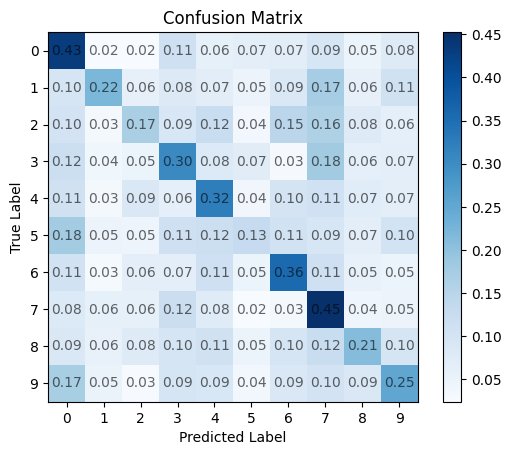

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:limit], y_pred_linear))

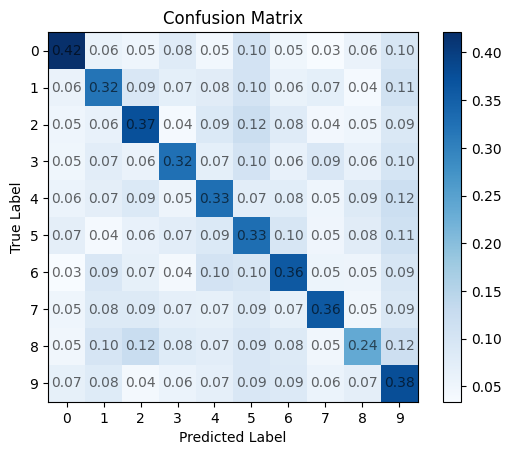

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:limit], y_pred_poly))

### Soft Margin SVM (Multiclass Dataset):

#### **Soft Margin SVM (Multiclass Dataset):**

In [ ]:
def soft_svm_binary(X, y, C=1, kernel_type='rbf', gamma=None, degree=None, kappa=None):
    n_samples, n_features = X.shape
    K = kernel(X, X, kernel_type, gamma, degree, kappa)

    # Objective Function
    P = np.outer(y, y) * K + 0.1 * np.eye(n_samples)
    q = -1 * np.ones(n_samples)

    # Inequality Constraints
    G = np.vstack((-np.eye(n_samples), np.eye(n_samples)))
    h = np.hstack((np.zeros(n_samples), np.ones(n_samples) * C))

    # Equality Constraints
    A = y.astype('d').reshape(1, -1)
    b = np.array([0]).astype('d')

    alphas = solve_qp(P, q, G, h, A, b, solver='cvxopt')

    # Other options: 'cvxopt', 'ecos', 'osqp', 'scs'
    support_vectors = X[(alphas > 1e-5).flatten()]
    support_vector_labels = y[(alphas > 1e-5).flatten()]
    support_alphas = alphas[alphas > 1e-5]
    weight = np.sum((support_alphas * support_vector_labels)[:, np.newaxis] * support_vectors, axis=0)
    bias = np.mean([y_k - np.dot(weight, x_k) for x_k, y_k in zip(support_vectors, support_vector_labels)])

    return support_alphas, weight, bias, support_vectors, support_vector_labels

In [ ]:
def soft_svm_multiclass(X, y, C=1, kernel_type='rbf', gamma=None, degree=None, kappa=None):
    classes = np.unique(y)
    alpha_list = []
    weight_list = []
    bias_list = []
    sv_list = []
    svl_list = []

    for i, label in enumerate(classes):
        temp_binary = ((y.copy() == classes[i]).astype(int) * 2) - 1
        alpha_temp, weight_temp, bias_temp, sv_temp, svl_temp = soft_svm_binary(X, temp_binary, C=C, kernel_type=kernel_type, gamma=gamma, degree=degree, kappa=kappa)
        alpha_list.append(alpha_temp)
        weight_list.append(weight_temp)
        bias_list.append(bias_temp)
        sv_list.append(sv_temp)
        svl_list.append(svl_temp)

    return alpha_list, weight_list, bias_list, sv_list, svl_list

#### **Finding Hyperparameters:**

In [ ]:
# Applying Validation Check
limit = 500
x_train = X_train_Multiclass[:limit]
y_train = Y_train_Multiclass[:limit]
x_validate = X_validation_Multiclass[:limit]
y_validate = Y_validation_Multiclass[:limit]

C_values = [0.01,0.15, 0.5, 1, 1.5, 2.5,40]

# For Linear kernel
opt_C = 1
opt_accuracy = float('-inf')
for C_val in C_values:
    alpha_list, weight_list, bias_list, sv_list, svl_list = soft_svm_multiclass(x_train, y_train, C=C_val, kernel_type='linear')
    y_pred = predict_multiclass(x_validate, alpha_list, weight_list, bias_list, sv_list, svl_list, kernel_type='linear')
    acc = accuracy(y_pred, y_validate)
    #print(f"C: {C_val} Accuracy: {acc}")
    if acc > opt_accuracy:
        opt_accuracy = acc
        opt_C = C_val
opt_C_linear = opt_C
print(f"Optimal C is {opt_C} for Linear kernel")

# For RBF kernel
gamma_values = [0.001,0.005,0.01,0.04,0.1,0.5, 1,2.5]

opt_C = 1
opt_gamma = 1/x_train.shape[1]
opt_accuracy = float('-inf')
for C_val in C_values:
    for gamma_val in gamma_values:
        alpha_list, weight_list, bias_list, sv_list, svl_list = soft_svm_multiclass(x_train, y_train, C=C_val, kernel_type='rbf', gamma=gamma_val)
        y_pred = predict_multiclass(x_validate, alpha_list, weight_list, bias_list, sv_list, svl_list, kernel_type='rbf', gamma=gamma_val)
        acc = accuracy(y_pred, y_validate)
        #print(f"C: {C_val}, Gamma: {gamma_val} Accuracy: {acc}")
        if acc > opt_accuracy:
            opt_accuracy = acc
            opt_gamma = gamma_val
            opt_C = C_val
opt_C_rbf = opt_C
print(f"Optimal C is {opt_C_rbf} and optimal gamma is {opt_gamma} for RBF kernel")

# For Poly kernel
degree_values = np.linspace(1, 5, 5).astype('int')
opt_C = 1
opt_degree = 1
opt_accuracy = float('-inf')
for C_val in C_values:
    for degree_val in degree_values:
        alpha_list, weight_list, bias_list, sv_list, svl_list = soft_svm_multiclass(x_train, y_train, C=C_val, kernel_type='poly', degree=degree_val)
        y_pred = predict_multiclass(x_validate, alpha_list, weight_list, bias_list, sv_list, svl_list, kernel_type='poly', degree=degree_val)
        acc = accuracy(y_pred, y_validate)
        #print(f"C: {C_val}, Degree: {degree_val} Accuracy: {acc}")
        if acc > opt_accuracy:
            opt_accuracy = acc
            opt_degree = degree_val
            opt_C = C_val
opt_C_poly = opt_C
print(f"Optimal C is {opt_C_poly} and optimal degree is {opt_degree} for Poly kernel")

Optimal C is 40 for Linear kernel
Optimal C is 0.15 and optimal gamma is 0.005 for RBF kernel


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Optimal C is 0.01 and optimal degree is 3 for Poly kernel


#### **Evaluation:**

In [ ]:
# Linear kernel
limit = 4000
alphas_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear = soft_svm_multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], C=opt_C_linear, kernel_type='linear')
y_pred_linear = predict_multiclass(X_test_Multiclass[:limit], alphas_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear, kernel_type='linear')
acc_linear = accuracy(y_pred_linear, Y_test_Multiclass[:limit])
print("Accuracy of data for linear kernel (without slack variables): ", acc_linear)

Accuracy of data for linear kernel (without slack variables):  0.288


In [ ]:
# RBF kernel
limit = 4000
alphas_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf = soft_svm_multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], C=opt_C_rbf, kernel_type='rbf')
y_pred_rbf = predict_multiclass(X_test_Multiclass[:limit], alphas_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf, kernel_type='rbf')
acc_rbf = accuracy(y_pred_rbf, Y_test_Multiclass[:limit])
print("Accuracy of data for RBF kernel (without slack variables): ", acc_rbf)


Accuracy of data for RBF kernel (without slack variables):  0.10325


In [ ]:
# Polynomial kernel
limit = 4000
alphas_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly = soft_svm_multiclass(X_train_Multiclass[:limit], Y_train_Multiclass[:limit], C=opt_C_poly, kernel_type='poly')
y_pred_poly = predict_multiclass(X_test_Multiclass[:limit], alphas_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly, kernel_type='poly')
acc_poly = accuracy(y_pred_poly, Y_test_Multiclass[:limit])
print("Accuracy of data for Polynomial kernel (without slack variables): ", acc_poly)


Accuracy of data for Polynomial kernel (without slack variables):  0.34275


#### **Saved Models:**

In [ ]:
# Define the common address
Address = '/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/'

# Save the linear model
model_params_linear = {
    'alphas_list': alphas_list_linear,
    'weight_list': weight_list_linear,
    'bias_list': bias_list_linear,
    'sv_list': sv_list_linear,
    'svl_list': svl_list_linear
}
np.save(Address + 'linear_soft_svm_multiclass_model.npy', model_params_linear)

# Save the RBF model
model_params_rbf = {
    'alphas_list': alphas_list_rbf,
    'weight_list': weight_list_rbf,
    'bias_list': bias_list_rbf,
    'sv_list': sv_list_rbf,
    'svl_list': svl_list_rbf
}
np.save(Address + 'rbf_soft_svm_multiclass_model.npy', model_params_rbf)

# Save the polynomial model
model_params_poly = {
    'alphas_list': alphas_list_poly,
    'weight_list': weight_list_poly,
    'bias_list': bias_list_poly,
    'sv_list': sv_list_poly,
    'svl_list': svl_list_poly
}
np.save(Address + 'poly_soft_svm_multiclass_model.npy', model_params_poly)



#### **Load Models and Evaluate:**

In [ ]:
# Load the linear SVM model
linear_model = np.load(Address + 'linear_soft_svm_multiclass_model.npy', allow_pickle=True).item()
alphas_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear = linear_model['alphas_list'], linear_model['weight_list'], linear_model['bias_list'], linear_model['sv_list'], linear_model['svl_list']

# Load the RBF SVM model
rbf_model = np.load(Address + 'rbf_soft_svm_multiclass_model.npy', allow_pickle=True).item()
alphas_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf = rbf_model['alphas_list'], rbf_model['weight_list'], rbf_model['bias_list'], rbf_model['sv_list'], rbf_model['svl_list']

# Load the polynomial SVM model
poly_model = np.load(Address + 'poly_soft_svm_multiclass_model.npy', allow_pickle=True).item()
alphas_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly = poly_model['alphas_list'], poly_model['weight_list'], poly_model['bias_list'], poly_model['sv_list'], poly_model['svl_list']



y_pred_linear = predict_multiclass(X_test_Multiclass[:limit], alphas_list_linear, weight_list_linear, bias_list_linear, sv_list_linear, svl_list_linear, kernel_type='linear')
y_pred_rbf = predict_multiclass(X_test_Multiclass[:limit], alphas_list_rbf, weight_list_rbf, bias_list_rbf, sv_list_rbf, svl_list_rbf, kernel_type='rbf')
y_pred_poly = predict_multiclass(X_test_Multiclass[:limit], alphas_list_poly, weight_list_poly, bias_list_poly, sv_list_poly, svl_list_poly, kernel_type='poly')



acc_linear = accuracy(y_pred_linear, Y_test_Multiclass[:limit])
acc_rbf = accuracy(y_pred_rbf, Y_test_Multiclass[:limit])
acc_poly = accuracy(y_pred_poly, Y_test_Multiclass[:limit])


print("Accuracy of data for linear kernel (without slack variables): ", acc_linear)
print("Accuracy of data for RBF kernel (without slack variables): ", acc_rbf)
print("Accuracy of data for Polynomial kernel (without slack variables): ", acc_poly)
print("\n")
print(f'F1 Score (linear) : {f1_score(Y_test_Multiclass[:limit], y_pred_linear):.4f}')
print(f'F1 Score (poly) : {f1_score(Y_test_Multiclass[:limit], y_pred_poly):.4f}')

Accuracy of data for linear kernel (without slack variables):  0.288
Accuracy of data for RBF kernel (without slack variables):  0.10325
Accuracy of data for Polynomial kernel (without slack variables):  0.34275


F1 Score (linear) : 0.2777
F1 Score (rbf) : 0.0187
F1 Score (poly) : 0.3434


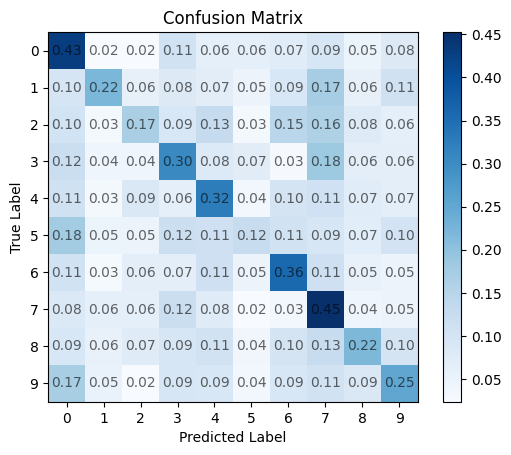

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:limit], y_pred_linear))

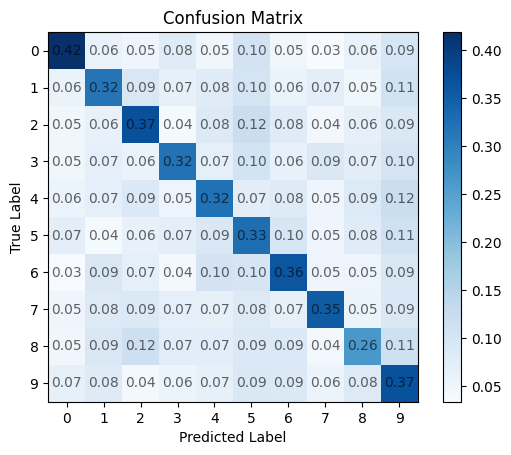

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_Multiclass[:limit], y_pred_poly))

# **SVM Using LibSVM**

## Binary Dataset:

### Soft Margin SVM:

In [ ]:
class soft_SVM_binary:
  def __init__(self):
    self.sv_coef = None # Coefficients
    self.spt_vectors = None # Support Vectors
    self.intercept = None

    self.reg_parameter = None
    self.gamma_value = None
    self.coef0 = None
    self.degree = None

    self.model = None

  def linear_kernel(self, prob, C_values):
    optimal_C = None
    optimal_cv_acc = 0
    for C in C_values:
      param = svm_parameter('-t 0 -c {} -b 1 -v 5'.format(C))
      cv_acc = svm_train(prob,param) # returns cross-validation accuracy
      if cv_acc > optimal_cv_acc:
        optimal_cv_acc = cv_acc # Update Value
        optimal_C = C

    self.reg_parameter = optimal_C
    self.param = svm_parameter('-t 0 -c {} -b 1'.format(self.reg_parameter))

  def rbf_kernel(self, prob, C_values, gamma_values):
    optimal_C = None
    optimal_gamma = None
    optimal_cv_acc = 0
    for C in C_values:
      for gamma in gamma_values:
        param = svm_parameter('-t 2 -c {} -g {} -b 1 -v 5'.format(C, gamma))
        cv_acc = svm_train(prob,param) # returns cross-validation accuracy
        if cv_acc > optimal_cv_acc:
          optimal_cv_acc = cv_acc # Update Value
          optimal_C = C
          optimal_gamma = gamma

    self.reg_parameter = optimal_C
    self.gamma_value = optimal_gamma
    self.param = svm_parameter('-t 2 -c {} -g {} -b 1'.format(self.reg_parameter, self.gamma_value))

  def poly_kernel(self, prob, C_values, coef0_values, degree_values):
    optimal_C = None
    optimal_coef0 = None
    optimal_degree = None
    optimal_cv_acc = 0
    for C in C_values:
      for coef0 in coef0_values:
        for degree in degree_values:
          param = svm_parameter('-t 1 -c {} -r {} -d {} -b 1 -v 5'.format(C, coef0, degree))
          cv_acc = svm_train(prob,param) # returns cross-validation accuracy
          if cv_acc > optimal_cv_acc:
            optimal_cv_acc = cv_acc # Update Value
            optimal_C = C
            optimal_coef0 = coef0
            optimal_degree = degree

    self.reg_parameter = optimal_C
    self.coef0 = optimal_coef0
    self.degree = optimal_degree
    self.param = svm_parameter('-t 1 -c {} -r {} -d {} -b 1'.format(self.reg_parameter, self.coef0, self.degree))

  def sigmoid_kernel(self, prob, C_values, gamma_values, coef0_values):
    optimal_C = None
    optimal_gamma = None
    optimal_coef0 = None
    optimal_cv_acc = 0
    for C in C_values:
      for gamma in gamma_values:
        for coef0 in coef0_values:
          param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1 -v 5'.format(C, gamma, coef0))
          cv_acc = svm_train(prob,param) # returns cross-validation accuracy
          if cv_acc > optimal_cv_acc:
            optimal_cv_acc = cv_acc # Update Value
            optimal_C = C
            optimal_gamma = gamma
            optimal_coef0 = coef0

    self.reg_parameter = optimal_C
    self.gamma_value = optimal_gamma
    self.coef0 = optimal_coef0
    self.param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1'.format(self.reg_parameter, self.gamma_value, self.coef0))

  def fit(self,X_train,Y_train,svm_kernel):

    C_values = [0.01,0.15, 0.5, 1, 1.5, 2.5,40]
    gamma_values = [0.001,0.02,0.04,0.1,1, 5]
    coef0_values = [1]
    degree_values = np.linspace(1, 5, 5).astype('int')

    prob = svm_problem(Y_train[:500], X_train[:500].tolist())

    if svm_kernel == 'linear':
      self.linear_kernel(prob, C_values)
    elif svm_kernel == 'rbf':
      self.rbf_kernel(prob, C_values, gamma_values)
    elif svm_kernel == 'poly':
      self.poly_kernel(prob, C_values, coef0_values, degree_values)
    elif svm_kernel == 'sigmoid':
      self.sigmoid_kernel(prob, C_values, gamma_values, coef0_values)

    # Training the model
    prob_final = svm_problem(Y_train[:4000], X_train[:4000].tolist())
    model = svm_train(prob_final, self.param)
    self.model = model

    # Get the separating hyperplane
    self.sv_coef = np.array(model.get_sv_coef())
    self.spt_vectors = np.array(model.get_SV())
    self.intercept = -model.rho.contents.value


  def predict(self, X_test , Y_test):
    # Use the svm_predict function from libsvm
    p_label, p_acc, p_val = svm_predict(Y_test, X_test, self.model,'-b 1')
    return p_label,p_acc,p_val

In [ ]:
 def calculate_accuracy(y_pred, y_test):
    correct_predictions = sum(p == t for p, t in zip(y_pred, y_test))
    total_predictions = len(y_test)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [ ]:
svm_linear = soft_SVM_binary()
svm_linear.fit(X_train_Binary,Y_train_Binary,'linear')
pred_labels_linear , accuracy_linear, probabilities_linear = svm_linear.predict(X_test_Binary,Y_test_Binary)
print("Accuracy of data for linear kernel (with slack variables): ",accuracy_linear[0])
print("Mean squared error of data for linear kernel (with slack variables): ",accuracy_linear[1])
print("Squared correlation coefficient of data for linear kernel (with slack variables): ",accuracy_linear[2])


In [ ]:
svm_rbf = soft_SVM_binary()
svm_rbf.fit(X_train_Binary,Y_train_Binary,'rbf')
pred_labels_rbf , accuracy_rbf, probabilities_rbf = svm_rbf.predict(X_test_Binary,Y_test_Binary)
print("Accuracy of data for RBF kernel (with slack variables): ",accuracy_rbf[0])
print("Mean squared error of data for RBF kernel (with slack variables): ",accuracy_rbf[1])
print("Squared correlation coefficient of data for RBF kernel (with slack variables): ",accuracy_rbf[2])


In [ ]:
svm_poly = soft_SVM_binary()
svm_poly.fit(X_train_Binary,Y_train_Binary,'poly')
pred_labels_poly , accuracy_poly, probabilities_poly = svm_poly.predict(X_test_Binary,Y_test_Binary)
print("Accuracy of data for polynomial kernel (with slack variables): ",accuracy_poly[0])
print("Mean squared error of data for polynomial kernel (with slack variables): ",accuracy_poly[1])
print("Squared correlation coefficient of data for polynomial kernel (with slack variables): ",accuracy_poly[2])


### Hard Margin SVM:

In [ ]:
class hard_SVM_binary:
  def __init__(self):
    self.sv_coef = None # Coefficients
    self.spt_vectors = None # Support Vectors
    self.intercept = None

    self.reg_parameter = 1000 # Large value for C
    self.gamma_value = None
    self.coef0 = None
    self.degree = None

    self.model = None

  def linear_kernel(self, prob):
    self.param = svm_parameter('-t 0 -c {} -b 1'.format(self.reg_parameter))

  def rbf_kernel(self, prob, gamma_values):
    optimal_gamma = None
    optimal_cv_acc = 0
    for gamma in gamma_values:
      param = svm_parameter('-t 2 -c {} -g {} -b 1 -v 5'.format(self.reg_parameter, gamma))
      cv_acc = svm_train(prob,param) # returns cross-validation accuracy
      if cv_acc > optimal_cv_acc:
        optimal_cv_acc = cv_acc # Update Value
        optimal_gamma = gamma

    self.gamma_value = optimal_gamma
    self.param = svm_parameter('-t 2 -c {} -g {} -b 1'.format(self.reg_parameter, self.gamma_value))

  def poly_kernel(self, prob, coef0_values, degree_values):
    optimal_coef0 = None
    optimal_degree = None
    optimal_cv_acc = 0
    for coef0 in coef0_values:
      for degree in degree_values:
        param = svm_parameter('-t 1 -c {} -r {} -d {} -b 1 -v 5'.format(self.reg_parameter, coef0, degree))
        cv_acc = svm_train(prob,param) # returns cross-validation accuracy
        if cv_acc > optimal_cv_acc:
          optimal_cv_acc = cv_acc # Update Value
          optimal_coef0 = coef0
          optimal_degree = degree

    self.coef0 = optimal_coef0
    self.degree = optimal_degree
    self.param = svm_parameter('-t 1 -c {} -r {} -d {} -b 1'.format(self.reg_parameter, self.coef0, self.degree))

  def sigmoid_kernel(self, prob, gamma_values, coef0_values):
    optimal_gamma = None
    optimal_coef0 = None
    optimal_cv_acc = 0
    for gamma in gamma_values:
      for coef0 in coef0_values:
        param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1 -v 5'.format(self.reg_parameter, gamma, coef0))
        cv_acc = svm_train(prob,param) # returns cross-validation accuracy
        if cv_acc > optimal_cv_acc:
          optimal_cv_acc = cv_acc # Update Value
          optimal_gamma = gamma
          optimal_coef0 = coef0

    self.gamma_value = optimal_gamma
    self.coef0 = optimal_coef0
    self.param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1'.format(self.reg_parameter, self.gamma_value, self.coef0))

  def fit(self,X_train,Y_train,svm_kernel):

    #gamma_values = np.logspace(-3,2,5)
    gamma_values = [0.001,0.02,0.04,0.1,1, 5]
    #coef0_values = np.linspace(-1, 1, 3)
    coef0_values = [1]
    #degree_values = np.arange(1,4)
    degree_values = np.linspace(1,5,5).astype('int')

    prob = svm_problem(Y_train[:500], X_train[:500].tolist())

    if svm_kernel == 'linear':
      self.linear_kernel(prob)
    elif svm_kernel == 'rbf':
      self.rbf_kernel(prob, gamma_values)
    elif svm_kernel == 'poly':
      self.poly_kernel(prob, coef0_values, degree_values)
    elif svm_kernel == 'sigmoid':
      self.sigmoid_kernel(prob, gamma_values, coef0_values)

    # Training the model
    prob_final = svm_problem(Y_train[:4000], X_train[:4000].tolist())
    model = svm_train(prob_final, self.param)
    self.model = model

    # Get the separating hyperplane
    self.sv_coef = np.array(model.get_sv_coef())
    self.spt_vectors = np.array(model.get_SV())
    self.intercept = -model.rho.contents.value

  def predict(self, X_test , Y_test):
    # Use the svm_predict function from libsvm
    p_label, p_acc, p_val = svm_predict(Y_test, X_test, self.model,'-b 1')
    return p_label,p_acc,p_val


In [ ]:
'''In a hard-margin SVM, a large C value means that the SVM will try to classify all the examples correctly. This can lead to long training times,
especially if the data is not linearly separable, as the algorithm will keep trying to find a hyperplane that perfectly separates the classes.
For other kernels, if they are able to map the data into a higher-dimensional space where it is linearly separable, the training might complete faster. '''

Hardsvm_linear = hard_SVM_binary()
Hardsvm_linear.fit(X_train_Multiclass,Y_train_Multiclass,'linear')
pred_labels_linear , accuracy_linear, probabilities_linear = Hardsvm_linear.predict(X_test_Multiclass,Y_test_Multiclass)
print("Accuracy of data for linear kernel (with slack variables): ",accuracy_linear[0])
print("Mean squared error of data for linear kernel (with slack variables): ",accuracy_linear[1])
#print("Squared correlation coefficient of data for linear kernel (with slack variables): ",accuracy_linear[2])

In [ ]:
Hardsvm_rbf = hard_SVM_binary()
Hardsvm_rbf.fit(X_train_Multiclass,Y_train_Multiclass,'rbf')
pred_labels_rbf , accuracy_rbf, probabilities_rbf = Hardsvm_rbf.predict(X_test_Multiclass,Y_test_Multiclass)
print("Accuracy of data for rbf kernel (with slack variables): ",accuracy_rbf[0])
print("Mean squared error of data for rbf kernel (with slack variables): ",accuracy_rbf[1])
print("Squared correlation coefficient of data for rbf kernel (with slack variables): ",accuracy_rbf[2])

In [ ]:
Hardsvm_poly = hard_SVM_binary()
Hardsvm_poly.fit(X_train_Multiclass,Y_train_Multiclass,'poly')
pred_labels_poly , accuracy_poly, probabilities_poly = Hardsvm_poly.predict(X_test_Multiclass,Y_test_Multiclass)
print("Accuracy of data for poly kernel (with slack variables): ",accuracy_poly[0])
print("Mean squared error of data for poly kernel (with slack variables): ",accuracy_poly[1])
print("Squared correlation coefficient of data for poly kernel (with slack variables): ",accuracy_poly[2])

## Multiclass Dataset:

### Soft Margin SVM:

In [ ]:
class soft_SVM_multi:
  def __init__(self):
    self.sv_coef = None # Coefficients
    self.spt_vectors = None # Support Vectors
    self.intercept = None

    self.reg_parameter = None
    self.gamma_value = None
    self.coef0 = None
    self.degree = None

    self.model = None
    self.model_list = None
    self.no_of_features = None

  def linear_kernel(self, prob, C_values):
    optimal_C = None
    optimal_cv_acc = 0
    for C in C_values:
      param = svm_parameter('-t 0 -c {} -b 1 -v 3'.format(C))
      cv_acc = svm_train(prob,param) # returns cross-validation accuracy
      if cv_acc > optimal_cv_acc:
        optimal_cv_acc = cv_acc # Update Value
        optimal_C = C
    self.reg_parameter = optimal_C
    return svm_parameter('-t 0 -c {} -b 1'.format(self.reg_parameter))

  def rbf_kernel(self, prob, C_values, gamma_values):
    optimal_C = None
    optimal_gamma = None
    optimal_cv_acc = 0
    for C in C_values:
      for gamma in gamma_values:
        param = svm_parameter('-t 2 -c {} -g {} -b 1 -v 3'.format(C, gamma))
        cv_acc = svm_train(prob,param) # returns cross-validation accuracy
        if cv_acc > optimal_cv_acc:
          optimal_cv_acc = cv_acc # Update Value
          optimal_C = C
          optimal_gamma = gamma
    self.reg_parameter = optimal_C
    self.gamma_value = optimal_gamma
    return svm_parameter('-t 2 -c {} -g {} -b 1'.format(self.reg_parameter, self.gamma_value))

  def poly_kernel(self, prob, C_values, coef0_values, degree_values):
    optimal_C = None
    optimal_coef0 = None
    optimal_degree = None
    optimal_cv_acc = 0
    for C in C_values:
      for coef0 in coef0_values:
        for degree in degree_values:
          param = svm_parameter('-t 1 -c {} -d {} -r {} -b 1 -v 3'.format(C, degree,coef0))
          cv_acc = svm_train(prob,param) # returns cross-validation accuracy
          if cv_acc > optimal_cv_acc:
            optimal_cv_acc = cv_acc # Update Value
            optimal_C = C
            optimal_coef0 = coef0
            optimal_degree = degree
    self.reg_parameter = optimal_C
    self.coef0 = optimal_coef0
    self.degree = optimal_degree
    return svm_parameter('-t 1 -c {} -d {} -r {} -b 1'.format(self.reg_parameter,self.degree,self.coef0))

  def sigmoid_kernel(self, prob, C_values, gamma_values, coef0_values):
    optimal_C = None
    optimal_gamma = None
    optimal_coef0 = None
    optimal_cv_acc = 0
    for C in C_values:
      for gamma in gamma_values:
        for coef0 in coef0_values:
          param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1 -v 3'.format(C, gamma, coef0))
          cv_acc = svm_train(prob,param) # returns cross-validation accuracy
          if cv_acc > optimal_cv_acc:
            optimal_cv_acc = cv_acc # Update Value
            optimal_C = C
            optimal_gamma = gamma
            optimal_coef0 = coef0
    self.reg_parameter = optimal_C
    self.gamma_value = optimal_gamma
    self.coef0 = optimal_coef0
    return svm_parameter('-t 3 -c {} -g {} -r {} -b 1'.format(self.reg_parameter, self.gamma_value, self.coef0))

  def single_fit(self, X_train, Y_train, svm_kernel):
    no_of_features = X_train.shape[0]
    self.no_of_features = X_train.shape[1]
    ##########################################################
    C_values = [0.01,0.15, 0.5, 1, 1.5, 2.5,40]
    gamma_values = [0.001,0.005,0.01,0.04,0.1,0.5, 1,2.5]
    degree_values = np.linspace(1, 5, 5).astype('int')
    coef0_values = [1]
    ##########################################################
    prob = svm_problem(Y_train[:500].ravel(), X_train[:500].tolist())
    if svm_kernel == 'linear':
      param = self.linear_kernel(prob, C_values)
    elif svm_kernel == 'rbf':
      param = self.rbf_kernel(prob, C_values, gamma_values)
    elif svm_kernel == 'poly':
      param = self.poly_kernel(prob, C_values, coef0_values, degree_values)
    elif svm_kernel == 'sigmoid':
      param = self.sigmoid_kernel(prob, C_values, gamma_values, coef0_values)

    print("######################Training########################")
    prob_final = svm_problem(Y_train[:4000].ravel(), X_train[:4000].tolist())
    model = svm_train(prob_final, param)
    return model

  def fit(self, X_train, Y_train, svm_kernel):
    classes = np.unique(Y_train)
    model_list = []
    for i, label in enumerate(classes):
      temp_binary = (Y_train.copy() == classes[i]).astype(int)
      model_list.append(self.single_fit(X_train, temp_binary, svm_kernel))
    self.model_list = model_list

  def predict(self, X_test):
    probability_matrix = []
    for model in self.model_list:
      _, _, p_val = svm_predict([0]*len(X_test), X_test, model, '-b 1')
      probability_matrix.append(p_val)
    predicted_labels = np.argmax(np.array(probability_matrix)[:,:,1], axis=0)
    return predicted_labels


In [ ]:
multi_svm_rbf = soft_SVM_multi()
multi_svm_rbf.fit(X_train_Multiclass,Y_train_Multiclass,'rbf')
print("###########Prediction##############")
pred_y_rbf = multi_svm_rbf.predict(X_test_Multiclass)
print('############Accuracy###############')
calculate_accuracy(pred_y_rbf, Y_test_Multiclass.astype('int'))

In [ ]:
multi_svm_linear = soft_SVM_multi()
multi_svm_linear.fit(X_train_Multiclass,Y_train_Multiclass,'linear')
print("###########Prediction##############")
pred_y_linear = multi_svm_linear.predict(X_test_Multiclass)
print('############Accuracy###############')
calculate_accuracy(pred_y_linear, Y_test_Multiclass.astype('int'))

In [ ]:
multi_svm_poly = soft_SVM_multi()
multi_svm_poly.fit(X_train_Multiclass,Y_train_Multiclass,'poly')
print("###########Prediction##############")
pred_y_poly = multi_svm_poly.predict(X_test_Multiclass)
print('############Accuracy###############')
calculate_accuracy(pred_y_poly, Y_test_Multiclass.astype('int'))

### Hard margin SVM :

In [ ]:
class hard_SVM_multi:
    def __init__(self):
        self.sv_coef = None  # Coefficients
        self.spt_vectors = None  # Support Vectors
        self.intercept = None

        self.reg_parameter = None
        self.gamma_value = None
        self.coef0 = None
        self.degree = None

        self.model = None
        self.model_list = None
        self.no_of_features = None

    def linear_kernel(self, prob):
        self.reg_parameter = 1000  # Set a large value for C
        return svm_parameter('-t 0 -c {} -b 1'.format(self.reg_parameter))

    def rbf_kernel(self, prob, gamma_values):
        self.reg_parameter = 1000  # Set a large value for C
        optimal_gamma = None
        optimal_cv_acc = 0
        for gamma in gamma_values:
            param = svm_parameter('-t 2 -c {} -g {} -b 1 -v 2'.format(self.reg_parameter, gamma))
            cv_acc = svm_train(prob, param)  # returns cross-validation accuracy
            if cv_acc > optimal_cv_acc:
                optimal_cv_acc = cv_acc  # Update Value
                optimal_gamma = gamma
        self.gamma_value = optimal_gamma
        return svm_parameter('-t 2 -c {} -g {} -b 1'.format(self.reg_parameter, self.gamma_value))

    def poly_kernel(self, prob, coef0_values, degree_values):
        self.reg_parameter = 1000  # Set a large value for C
        optimal_coef0 = None
        optimal_degree = None
        optimal_cv_acc = 0
        for coef0 in coef0_values:
            for degree in degree_values:
                param = svm_parameter('-t 1 -c {} -d {} -r {} -b 1 -v 2'.format(self.reg_parameter, degree, coef0))
                cv_acc = svm_train(prob, param)  # returns cross-validation accuracy
                if cv_acc > optimal_cv_acc:
                    optimal_cv_acc = cv_acc  # Update Value
                    optimal_coef0 = coef0
                    optimal_degree = degree
        self.coef0 = optimal_coef0
        self.degree = optimal_degree
        return svm_parameter('-t 1 -c {} -d {} -r {} -b 1'.format(self.reg_parameter, self.degree, self.coef0))

    def sigmoid_kernel(self, prob, gamma_values, coef0_values):
        self.reg_parameter = 1000  # Set a large value for C
        optimal_gamma = None
        optimal_coef0 = None
        optimal_cv_acc = 0
        for gamma in gamma_values:
            for coef0 in coef0_values:
                param = svm_parameter('-t 3 -c {} -g {} -r {} -b 1 -v 2'.format(self.reg_parameter, gamma, coef0))
                cv_acc = svm_train(prob, param)  # returns cross-validation accuracy
                if cv_acc > optimal_cv_acc:
                    optimal_cv_acc = cv_acc  # Update Value
                    optimal_gamma = gamma
                    optimal_coef0 = coef0
        self.gamma_value = optimal_gamma
        self.coef0 = optimal_coef0
        return svm_parameter('-t 3 -c {} -g {} -r {} -b 1'.format(self.reg_parameter, self.gamma_value, self.coef0))

    def single_fit(self, X_train, Y_train, svm_kernel):
        no_of_features = X_train.shape[0]
        self.no_of_features = X_train.shape[1]
        gamma_values = [0.001,0.02,0.04,0.1,1, 5]
        coef0_values = [1]
        degree_values = np.linspace(1,5,5).astype('int')
        prob = svm_problem(Y_train[:100].ravel(), X_train[:100].tolist())
        if svm_kernel == 'linear':
            param = self.linear_kernel(prob)
        elif svm_kernel == 'rbf':
            param = self.rbf_kernel(prob, gamma_values)
        elif svm_kernel == 'poly':
            param = self.poly_kernel(prob, coef0_values, degree_values)
        elif svm_kernel == 'sigmoid':
            param = self.sigmoid_kernel(prob, gamma_values, coef0_values)
        prob_final = svm_problem(Y_train[:1000].ravel(), X_train[:1000].tolist())
        model = svm_train(prob_final, param)
        return model

    def fit(self, X_train, Y_train, svm_kernel):
        classes = np.unique(Y_train)
        model_list = []
        for i, label in enumerate(classes):
            temp_binary = (Y_train.copy() == classes[i]).astype(int)
            model_list.append(self.single_fit(X_train, temp_binary, svm_kernel))
        self.model_list = model_list

    def predict(self, X_test):
        probability_matrix = []
        for model in self.model_list:
            _, _, p_val = svm_predict([0] * len(X_test), X_test, model, '-b 1')
            probability_matrix.append(p_val)
        predicted_labels = np.argmax(np.array(probability_matrix)[:, :, 1], axis=0)
        return predicted_labels

In [ ]:
multi_svm_rbf = hard_SVM_multi()
multi_svm_rbf.fit(X_train_Multiclass,Y_train_Multiclass,'rbf')
print('############# Prediction ##############')
pred_y_rbf = multi_svm_rbf.predict(X_test_Multiclass)
print('############# Accuracy ##############')
calculate_accuracy(pred_y_rbf, Y_test_Multiclass.astype('int'))

In [ ]:
multi_svm_linear = hard_SVM_multi()
multi_svm_linear.fit(X_train_Multiclass,Y_train_Multiclass,'linear')
print('############# Prediction ##############')
pred_y_linear = multi_svm_linear.predict(X_test_Multiclass)
print('############# Accuracy ##############')
calculate_accuracy(pred_y_linear, Y_test_Multiclass.astype('int'))

In [ ]:
multi_svm_poly = hard_SVM_multi()
multi_svm_poly.fit(X_train_Multiclass,Y_train_Multiclass,'poly')
print('############# Prediction ##############')
pred_y_poly = multi_svm_poly.predict(X_test_Multiclass)
print('############# Accuracy ##############')
calculate_accuracy(pred_y_poly, Y_test_Multiclass.astype('int'))

| Kernel Type | Soft LibSVM (Binary) | Hard LibSVM (Binary) | Soft Margin SVM (Multiclass) | Hard Margin SVM (Multiclass) |
|:-----------:|:--------------------:|:--------------------:|:----------------------------:|:----------------------------:|
|   Linear    |   72.0%              |   51.5%              |   12.3%                      |  10.12%                      |
|     RBF     | 75.4286%             | 75.0714%             |  13.16%                      |  11.03%                      |
|  Polynomial | 76.1429%             | 71.9643%             |  12.59%                      |  14.13%                      |


**Note**:
In multiclass case, small number of data points were used because the code was taking a lot of time to run. This is why the accuracy values in the multiclass cases are less.

# **SVM and Logistic Regression on MNIST Dataset**

#### **Loading Data:**

In [ ]:
X_train = np.load('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/Data/kmnist-train-imgs.npz',allow_pickle=True)['arr_0']
X_test = np.load('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/Data/kmnist-test-imgs.npz',allow_pickle=True)['arr_0']
Y_train = np.load('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/Data/kmnist-train-labels.npz',allow_pickle=True)['arr_0']
Y_test = np.load('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/Data/kmnist-test-labels.npz',allow_pickle=True)['arr_0']

X_train = X_train.reshape(X_train.shape[0],-1)
X_test = X_test.reshape(X_test.shape[0],-1)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {Y_train.shape}')
print(f'y_test shape: {Y_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)
y_train shape: (60000,)
y_test shape: (10000,)


In [ ]:
def standardize(X):
    # Calculate the mean and standard deviation for each feature (column)
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)

    # Replace zero standard deviations with a small value to avoid division by zero
    stds[stds == 0] = 1e-8

    # Subtract the mean and divide by the standard deviation
    X_standardized = (X - means) / stds

    return X_standardized

X_train_std = standardize(X_train.copy())
X_test_std = standardize(X_test.copy())

In [ ]:
# Spliting into training, validation:

# Defining Ratio
ratio = 0.7

n = X_train_std.shape[0]

# Defining size
train_size = int(ratio*n)

# Features:
X_train_MNIST = X_train_std[:train_size,:].copy()
X_validation_MNIST = X_train_std[train_size :,:].copy()
X_test_MNIST = X_test_std.copy()

# Labels:
Y_train_MNIST = Y_train[:train_size].copy()
Y_validation_MNIST = Y_train[train_size :].copy()
Y_test_MNIST = Y_test.copy()

# For linear classifier
X_train_MNIST_original = X_train_MNIST.copy()
X_validation_MNIST_original = X_validation_MNIST.copy()
X_test_MNIST_original = X_test_MNIST.copy()

# Labels:
Y_train_MNIST_original = Y_train_MNIST.copy()
Y_validation_MNIST_original = Y_validation_MNIST.copy()
Y_test_MNIST_original = Y_test_MNIST.copy()

print("X_train_MNIST shape:", X_train_MNIST.shape)
print("X_validation_MNIST shape:", X_validation_MNIST.shape)
print("X_test_MNIST shape:", X_test_MNIST.shape)
print("Y_train_MNIST shape:", Y_train_MNIST.shape)
print("Y_validation_MNIST shape:", Y_validation_MNIST.shape)
print("Y_test_MNIST shape:", Y_test_MNIST.shape)

X_train_MNIST shape: (42000, 784)
X_validation_MNIST shape: (18000, 784)
X_test_MNIST shape: (10000, 784)
Y_train_MNIST shape: (42000,)
Y_validation_MNIST shape: (18000,)
Y_test_MNIST shape: (10000,)


## SVM:

#### **Implementing PCA:**

In [ ]:
def PCA(data, n):
    # Compute the covariance matrix
    covariance_matrix = np.cov(data, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues and corresponding eigenvectors
    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    # Select the first n eigenvectors
    eigenvector_subset = sorted_eigenvectors[:, 0:n]

    # Transform the data
    data_reduced = np.dot(eigenvector_subset.transpose(), data.transpose()).transpose()

    # Calculate the total variance
    total_variance = sum(eigenvalues)

    # Calculate the variance explained by n principal components
    explained_variance = sum(sorted_eigenvalues[:n])

    return data_reduced, explained_variance, total_variance


def determine_best_dimension(data, threshold=0.80):
    # Compute the covariance matrix
    covariance_matrix = np.cov(data, rowvar=False)

    # Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # Sort the eigenvalues in descending order
    sorted_eigenvalues = np.sort(eigenvalues)[::-1]

    # Calculate the explained variance ratio for each PC
    explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    # Calculate the cumulative explained variance ratio
    cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    # Find the number of PCs required to meet the threshold
    n_components = np.argmax(cumulative_explained_variance_ratio >= threshold) + 1

    print(f"Number of principal components required to explain {threshold*100}% of the variance: {n_components}")

    return n_components


# Determine the best lower dimension
best_dimension = determine_best_dimension(X_train_MNIST_original)
# Apply PCA with the determined best dimension
data_reduced, explained_variance, total_variance = PCA(X_train_MNIST_original, best_dimension)

print(f"Explained variance ratio: {explained_variance/total_variance:.2f}")

Number of principal components required to explain 80.0% of the variance: 96
Explained variance ratio: 0.80


In [ ]:
X_train_MNIST,_,_ = PCA(X_train_MNIST_original,best_dimension)
X_validation_MNIST,_,_ = PCA(X_validation_MNIST_original,best_dimension)
X_test_MNIST,_,_ = PCA(X_test_MNIST_original,best_dimension)

print("X_train_MNIST shape:", X_train_MNIST.shape)
print("X_validation_MNIST shape:", X_validation_MNIST.shape)
print("X_test_MNIST shape:", X_test_MNIST.shape)

print("Y_train_MNIST shape:", Y_train_MNIST.shape)
print("Y_validation_MNIST shape:", Y_validation_MNIST.shape)
print("Y_test_MNIST shape:", Y_test_MNIST.shape)


X_train_MNIST shape: (42000, 96)
X_validation_MNIST shape: (18000, 96)
X_test_MNIST shape: (10000, 96)
Y_train_MNIST shape: (42000,)
Y_validation_MNIST shape: (18000,)
Y_test_MNIST shape: (10000,)


### Hard Margin SVM:

#### **Finding Hyperparameters:**

In [ ]:
# Applying Validation Check
limit = 500

x_train = X_train_MNIST[:limit]
y_train = Y_train_MNIST[:limit]

x_validate = X_validation_MNIST[:limit]
y_validate = Y_validation_MNIST[:limit]

# RBF kernel
gamma_values = [0.00018,0.001,0.002,0.0284,0.005,0.01,0.04,0.1,0.5, 1,2.5]

opt_gamma = 1/x_train.shape[1]
opt_accuracy = float('-inf')
for gamma_val in gamma_values:
  support_alpha_list,weight_list,bias_list,sv_list,svl_list = hard_svm_Multiclass(x_train,y_train, kernel_type='rbf',gamma = gamma_val)
  y_pred = predict_multiclass(x_validate,support_alpha_list,weight_list,bias_list,sv_list,svl_list, kernel_type='rbf', gamma=gamma_val)
  acc = accuracy(y_pred,y_validate)
  #print(f" Gamma value is {gamma_val} corresponding accuracy is {acc}")
  if acc > opt_accuracy:
    opt_accuracy = acc
    opt_gamma = gamma_val

print(f"Optimal gamma is {opt_gamma}")

#### **Evaluating:**

In [ ]:
# rbf kernel
limit = 1000
support_alpha_list,weight_list,bias_list,sv_list,svl_list = hard_svm_Multiclass(X_train_MNIST[:limit],Y_train_MNIST[:limit],kernel_type='rbf',gamma = opt_gamma)
y_pred_rbf = predict_multiclass(X_test_MNIST[:limit],support_alpha_list,weight_list,bias_list,sv_list,svl_list, kernel_type='rbf',gamma = opt_gamma)
acc_rbf = accuracy(y_pred_rbf,Y_test_MNIST[:limit])
print("Accuracy of data for rbf kernel (without slack variables): ",acc_rbf)

Accuracy of data for rbf kernel (without slack variables):  0.106


In [ ]:
# Saving Model
model_params_MNIST = {
  'support_alpha_list_rbf' : support_alpha_list,
  'weight_list_rbf' : weight_list,
  'bias_list_rbf' : bias_list,
  'sv_list_rbf' : sv_list,
  'svl_list_rbf' : svl_list
}

# Save model

np.save('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/my_model_hard_MNIST.npy',model_params_MNIST)

### Soft Margin SVM:

In [ ]:
# Applying Validation Check
limit = 500
x_train = X_train_MNIST[:limit]
y_train = Y_train_MNIST[:limit]
x_validate = X_validation_MNIST[:limit]
y_validate = Y_validation_MNIST[:limit]

C_values = [0.01,0.15, 0.5, 1, 1.5, 2.5,40]


# For RBF kernel
gamma_values = [0.00018,0.001,0.0284,0.005,0.01,0.04,0.1,0.5, 1,2.5]
opt_C = 1
opt_gamma = 1/x_train.shape[1]
opt_accuracy = float('-inf')
for C_val in C_values:
    for gamma_val in gamma_values:
        alpha_list, weight_list, bias_list, sv_list, svl_list = soft_svm_multiclass(x_train, y_train, C=C_val, kernel_type='rbf', gamma=gamma_val)
        y_pred = predict_multiclass(x_validate, alpha_list, weight_list, bias_list, sv_list, svl_list, kernel_type='rbf', gamma=gamma_val)
        acc = accuracy(y_pred, y_validate)
        #print(f"C: {C_val}, Gamma: {gamma_val} Accuracy: {acc}")
        if acc > opt_accuracy:
            opt_accuracy = acc
            opt_gamma = gamma_val
            opt_C = C_val
opt_C_rbf = opt_C
print(f"Optimal C is {opt_C_rbf} and optimal gamma is {opt_gamma} for RBF kernel")

In [ ]:
# RBF kernel
limit = 2000
alphas_list, weight_list, bias_list, sv_list, svl_list = soft_svm_multiclass(X_train_MNIST[:limit], Y_train_MNIST[:limit], C=opt_C_rbf, kernel_type='rbf', gamma=opt_gamma)
y_pred_rbf = predict_multiclass(X_test_MNIST[:limit], alphas_list, weight_list, bias_list, sv_list, svl_list, kernel_type='rbf', gamma=opt_gamma)
acc_rbf = accuracy(y_pred_rbf, Y_test_MNIST[:limit])
print("Accuracy of data for RBF kernel (without slack variables): ", acc_rbf)

Accuracy of data for RBF kernel (without slack variables):  0.0985


In [ ]:
# Saving Model
model_params_MNIST_soft = {
  'support_alpha_list_linear' : alphas_list,
  'weight_list_linear' : weight_list,
  'bias_list_linear' : bias_list,
  'sv_list_linear' : sv_list,
  'svl_list_linear' : svl_list
}

# Save model

np.save('/content/drive/MyDrive/Colab Notebooks/E1 213 Pattern Recognition and Neural Network/Assignment_02/my_model_soft_MNIST.npy',model_params_MNIST_soft)

## Logistic Regression

#### **Code:**

In [ ]:
class Logistic_Regression_multiclass:
  def __init__(self):
    self.coef = None

  def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

  def single_fit(self,X_train,Y_train,label,learning_rate=1, threshold=1e-6):

    self.no_of_points =  X_train.shape[0]
    self.no_of_features = X_train.shape[1]

    X_train = np.insert(X_train, self.no_of_features, 1, axis=1)

    # Initialize W:
    np.random.seed(0)
    W = np.random.rand(self.no_of_features + 1) * np.sqrt(1./(self.no_of_features + 1))
    # W = np.zeros(self.no_of_features + 1) * np.sqrt(1./(self.no_of_features + 1))
    W = W.reshape(-1,1)
    no_of_iterations = 300

    cost_list = []
    for _ in range(no_of_iterations):

      Y_hat = self.sigmoid(X_train @ W)
      Y_hat = Y_hat.reshape(-1,1)

      # cost function
      cost = -(1/self.no_of_points) * np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log((1 - Y_hat)))
      # gradient
      gradient = (1/self.no_of_points)*(X_train.T @ (Y_hat - Y_train))

      W = W - learning_rate*gradient

      #return
      cost_list.append(cost)

    #   if (_%50 == 0):
    print( f"Class {int(label)}: Iterations : {_+1} , Cost = {cost}")

    return W

  def fit(self,X_train,Y_train):
    classes = np.unique(Y_train)
    W_matrix = []
    for i,label in enumerate(classes):
      temp_binary = (Y_train.copy() == classes[i]).astype(int)
      W_matrix.append(self.single_fit(X_train,temp_binary,label))
    W_matrix = np.array(W_matrix)
    W_matrix = np.squeeze(W_matrix, axis=2)

    self.coef = W_matrix

  def predict(self,X_test):
    X_test = np.insert(X_test, self.no_of_features, 1, axis=1)  # Add bias term
    probabilities = []
    for w in self.coef:
        w = w.reshape(-1,1)
        Z = np.dot(X_test, w)
        Z = Z.reshape(-1,1)

        prob = self.sigmoid(Z)

        probabilities.append(prob)
    probabilities = np.array(probabilities)

    probabilities = np.squeeze(probabilities, axis=2)

    return probabilities.T



#### **Evaluation:**

In [ ]:
lr_over = Logistic_Regression_multiclass()
lr_over.fit(X_train_MNIST_original,Y_train_MNIST_original.copy().reshape(-1,1))
y_predicted_train = lr_over.predict(X_train_MNIST_original)
y_predicted_test = lr_over.predict(X_test_MNIST_original)

<ipython-input-54-02d5eadd4eff>:29: RuntimeWarning: divide by zero encountered in log
  cost = -(1/self.no_of_points) * np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log((1 - Y_hat)))
<ipython-input-54-02d5eadd4eff>:29: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/self.no_of_points) * np.sum(Y_train * np.log(Y_hat) + (1 - Y_train) * np.log((1 - Y_hat)))


Class 0: Iterations : 300 , Cost = 0.061129018330703784
Class 1: Iterations : 300 , Cost = 0.1415234209354008
Class 2: Iterations : 300 , Cost = 0.28295213455051227
Class 3: Iterations : 300 , Cost = 0.08678859018772132
Class 4: Iterations : 300 , Cost = 0.12035874471022774
Class 5: Iterations : 300 , Cost = 0.09228565083858424
Class 6: Iterations : 300 , Cost = 0.18955057110793685
Class 7: Iterations : 300 , Cost = 0.1000811467438518
Class 8: Iterations : 300 , Cost = 0.13643007232885385
Class 9: Iterations : 300 , Cost = 0.11124484146440593


In [ ]:
print(f'Training Accuracy : {accuracy(Y_train_MNIST_original,y_predicted_train):0.3f}')
print(f'Testing Accuracy : {accuracy(Y_test_MNIST_original,y_predicted_test):0.3f}')
print("\n")
print(f'Training F1 Score : {f1_score(Y_train_MNIST_original,y_predicted_train):0.3f}')
print(f'Testing F1 Score : {f1_score(Y_test_MNIST_original,y_predicted_test):0.3f}')

Training Accuracy : 0.813
Testing Accuracy : 0.660


Training F1 Score : 0.810
Testing F1 Score : 0.659


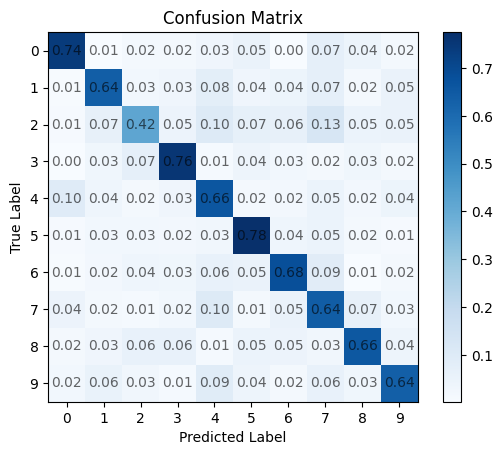

In [ ]:
confusion_matrix_heatmap(confusion_matrix(Y_test_MNIST_original,y_predicted_test))